In [547]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import os, glob
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# 1-Abrir arquivos netCDF4 (forecast and observation)

# Forecast

In [596]:
F=Dataset('forecast.nc','r')

In [597]:
F.variables.keys()#observacao das variables contidos no arquivo

odict_keys(['lat', 'lon', 'time', 't2m'])

In [598]:
lat_1=F.variables['lat'][:]
lon_1=F.variables['lon'][:]
tempo_1=F.variables['time'][:]
T_1=F.variables['t2m'][:]-273.15 #convertido para graus Celsius

/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  after removing the cwd from sys.path.


# Obsevation

In [599]:
O=Dataset('observation.nc','r')

In [600]:
O.variables.keys()

odict_keys(['time', 'lon', 'lat', 'temperatura'])

In [601]:
lat_2=O.variables['lat'][:]
lon_2=O.variables['lon'][:]
tempo_2=O.variables['time'][:]
T_2=O.variables['temperatura'][:]

# CALCULO DO INDICE RMSE A CADA 6h 

# Gerando arquivo csv (dados de Forecast)

In [378]:
tempo_12=[datetime.datetime(2018,4,14)+datetime.timedelta(i/24) for i in tempo_1[:]]
F=open('Forecasting_data.csv','w')
F.write('time_1,lat_1, lon_1,Temp_1\n') 
DATA=[]
for k, tempo in enumerate(tempo_12):
    for j,latitude in enumerate(lat_1):
        for iii, longitude in enumerate (lon_1):
            TM=T_1[k,j,iii]
            print(tempo,latitude,longitude,TM)
            F.write(str(tempo)+','+str(latitude)+','+str(longitude)+','+str(TM)+'\n') 
                    

2018-04-14 00:00:00 -25.294006 -52.9937 24.72702
2018-04-14 00:00:00 -25.294006 -52.750793 24.482635
2018-04-14 00:00:00 -25.294006 -52.507904 24.258118
2018-04-14 00:00:00 -25.294006 -52.265 23.521393
2018-04-14 00:00:00 -25.294006 -52.022095 22.88205
2018-04-14 00:00:00 -25.294006 -51.779205 22.454742
2018-04-14 00:00:00 -25.294006 -51.5363 21.967407
2018-04-14 00:00:00 -25.294006 -51.293396 21.873627
2018-04-14 00:00:00 -25.294006 -51.050507 22.216278
2018-04-14 00:00:00 -25.294006 -50.807602 21.924469
2018-04-14 00:00:00 -25.294006 -50.564697 21.27185
2018-04-14 00:00:00 -25.294006 -50.321808 20.549957
2018-04-14 00:00:00 -25.294006 -50.078903 21.19867
2018-04-14 00:00:00 -25.294006 -49.836 21.240051
2018-04-14 00:00:00 -25.294006 -49.59311 21.14508
2018-04-14 00:00:00 -25.294006 -49.350204 19.732117
2018-04-14 00:00:00 -25.294006 -49.1073 18.90332
2018-04-14 00:00:00 -25.294006 -48.864395 19.668243
2018-04-14 00:00:00 -25.294006 -48.62149 21.856354
2018-04-14 00:00:00 -25.294006 -

2018-04-14 00:00:00 -21.73175 -49.836 25.071991
2018-04-14 00:00:00 -21.73175 -49.59311 25.143036
2018-04-14 00:00:00 -21.73175 -49.350204 25.260773
2018-04-14 00:00:00 -21.73175 -49.1073 25.29071
2018-04-14 00:00:00 -21.73175 -48.864395 25.411224
2018-04-14 00:00:00 -21.73175 -48.62149 25.086945
2018-04-14 00:00:00 -21.73175 -48.3786 25.106873
2018-04-14 00:00:00 -21.73175 -48.135696 24.478851
2018-04-14 00:00:00 -21.73175 -47.89279 23.914307
2018-04-14 00:00:00 -21.73175 -47.649902 23.83136
2018-04-14 00:00:00 -21.73175 -47.406998 24.841919
2018-04-14 00:00:00 -21.73175 -47.164093 25.13736
2018-04-14 00:00:00 -21.73175 -46.921204 23.911469
2018-04-14 00:00:00 -21.73175 -46.6783 21.512604
2018-04-14 00:00:00 -21.73175 -46.435394 20.34842
2018-04-14 00:00:00 -21.73175 -46.192505 20.46576
2018-04-14 00:00:00 -21.73175 -45.9496 21.19809
2018-04-14 00:00:00 -21.73175 -45.706696 22.216003
2018-04-14 00:00:00 -21.73175 -45.463806 22.037323
2018-04-14 00:00:00 -21.73175 -45.2209 21.850311
20

2018-04-14 01:00:00 -23.524933 -48.3786 22.291351
2018-04-14 01:00:00 -23.524933 -48.135696 21.99582
2018-04-14 01:00:00 -23.524933 -47.89279 21.80426
2018-04-14 01:00:00 -23.524933 -47.649902 21.950775
2018-04-14 01:00:00 -23.524933 -47.406998 21.510193
2018-04-14 01:00:00 -23.524933 -47.164093 20.865234
2018-04-14 01:00:00 -23.524933 -46.921204 20.61084
2018-04-14 01:00:00 -23.524933 -46.6783 20.825928
2018-04-14 01:00:00 -23.524933 -46.435394 21.011322
2018-04-14 01:00:00 -23.524933 -46.192505 21.095764
2018-04-14 01:00:00 -23.524933 -45.9496 21.07071
2018-04-14 01:00:00 -23.524933 -45.706696 20.921204
2018-04-14 01:00:00 -23.524933 -45.463806 21.293823
2018-04-14 01:00:00 -23.524933 -45.2209 22.912262
2018-04-14 01:00:00 -23.524933 -44.977997 25.428864
2018-04-14 01:00:00 -23.524933 -44.735107 25.704803
2018-04-14 01:00:00 -23.524933 -44.492203 25.787323
2018-04-14 01:00:00 -23.524933 -44.2493 25.54831
2018-04-14 01:00:00 -23.302078 -52.9937 25.8107
2018-04-14 01:00:00 -23.302078 -

2018-04-14 02:00:00 -25.07425 -52.507904 23.914978
2018-04-14 02:00:00 -25.07425 -52.265 22.792267
2018-04-14 02:00:00 -25.07425 -52.022095 21.930634
2018-04-14 02:00:00 -25.07425 -51.779205 21.244904
2018-04-14 02:00:00 -25.07425 -51.5363 21.215729
2018-04-14 02:00:00 -25.07425 -51.293396 21.90561
2018-04-14 02:00:00 -25.07425 -51.050507 22.20108
2018-04-14 02:00:00 -25.07425 -50.807602 21.293365
2018-04-14 02:00:00 -25.07425 -50.564697 20.233307
2018-04-14 02:00:00 -25.07425 -50.321808 19.732727
2018-04-14 02:00:00 -25.07425 -50.078903 19.83252
2018-04-14 02:00:00 -25.07425 -49.836 20.106628
2018-04-14 02:00:00 -25.07425 -49.59311 20.752594
2018-04-14 02:00:00 -25.07425 -49.350204 19.632568
2018-04-14 02:00:00 -25.07425 -49.1073 18.629211
2018-04-14 02:00:00 -25.07425 -48.864395 18.810059
2018-04-14 02:00:00 -25.07425 -48.62149 20.076843
2018-04-14 02:00:00 -25.07425 -48.3786 21.53476
2018-04-14 02:00:00 -25.07425 -48.135696 23.293549
2018-04-14 02:00:00 -25.07425 -47.89279 25.46225


2018-04-14 02:00:00 -21.053375 -52.265 25.115417
2018-04-14 02:00:00 -21.053375 -52.022095 25.269562
2018-04-14 02:00:00 -21.053375 -51.779205 25.3331
2018-04-14 02:00:00 -21.053375 -51.5363 25.699524
2018-04-14 02:00:00 -21.053375 -51.293396 24.981384
2018-04-14 02:00:00 -21.053375 -51.050507 24.701141
2018-04-14 02:00:00 -21.053375 -50.807602 24.620758
2018-04-14 02:00:00 -21.053375 -50.564697 24.644043
2018-04-14 02:00:00 -21.053375 -50.321808 24.664612
2018-04-14 02:00:00 -21.053375 -50.078903 24.787384
2018-04-14 02:00:00 -21.053375 -49.836 24.711609
2018-04-14 02:00:00 -21.053375 -49.59311 24.769012
2018-04-14 02:00:00 -21.053375 -49.350204 24.810242
2018-04-14 02:00:00 -21.053375 -49.1073 24.708649
2018-04-14 02:00:00 -21.053375 -48.864395 24.246887
2018-04-14 02:00:00 -21.053375 -48.62149 23.706879
2018-04-14 02:00:00 -21.053375 -48.3786 23.76056
2018-04-14 02:00:00 -21.053375 -48.135696 24.323425
2018-04-14 02:00:00 -21.053375 -47.89279 24.07721
2018-04-14 02:00:00 -21.053375 

2018-04-14 03:00:00 -22.631271 -50.321808 23.346985
2018-04-14 03:00:00 -22.631271 -50.078903 23.291504
2018-04-14 03:00:00 -22.631271 -49.836 23.100586
2018-04-14 03:00:00 -22.631271 -49.59311 23.081177
2018-04-14 03:00:00 -22.631271 -49.350204 22.83493
2018-04-14 03:00:00 -22.631271 -49.1073 22.566925
2018-04-14 03:00:00 -22.631271 -48.864395 22.157745
2018-04-14 03:00:00 -22.631271 -48.62149 21.924835
2018-04-14 03:00:00 -22.631271 -48.3786 22.06369
2018-04-14 03:00:00 -22.631271 -48.135696 22.402924
2018-04-14 03:00:00 -22.631271 -47.89279 22.488373
2018-04-14 03:00:00 -22.631271 -47.649902 22.791931
2018-04-14 03:00:00 -22.631271 -47.406998 22.792725
2018-04-14 03:00:00 -22.631271 -47.164093 23.00885
2018-04-14 03:00:00 -22.631271 -46.921204 22.346771
2018-04-14 03:00:00 -22.631271 -46.6783 20.884521
2018-04-14 03:00:00 -22.631271 -46.435394 19.4758
2018-04-14 03:00:00 -22.631271 -46.192505 18.26358
2018-04-14 03:00:00 -22.631271 -45.9496 17.992584
2018-04-14 03:00:00 -22.631271 -

2018-04-14 04:00:00 -24.412567 -48.135696 21.368805
2018-04-14 04:00:00 -24.412567 -47.89279 23.024994
2018-04-14 04:00:00 -24.412567 -47.649902 23.636292
2018-04-14 04:00:00 -24.412567 -47.406998 23.684753
2018-04-14 04:00:00 -24.412567 -47.164093 24.072174
2018-04-14 04:00:00 -24.412567 -46.921204 25.147797
2018-04-14 04:00:00 -24.412567 -46.6783 25.605988
2018-04-14 04:00:00 -24.412567 -46.435394 25.818237
2018-04-14 04:00:00 -24.412567 -46.192505 25.849426
2018-04-14 04:00:00 -24.412567 -45.9496 25.805267
2018-04-14 04:00:00 -24.412567 -45.706696 25.718597
2018-04-14 04:00:00 -24.412567 -45.463806 25.669342
2018-04-14 04:00:00 -24.412567 -45.2209 25.680084
2018-04-14 04:00:00 -24.412567 -44.977997 25.764618
2018-04-14 04:00:00 -24.412567 -44.735107 25.878387
2018-04-14 04:00:00 -24.412567 -44.492203 25.990143
2018-04-14 04:00:00 -24.412567 -44.2493 26.032654
2018-04-14 04:00:00 -24.191254 -52.9937 24.772644
2018-04-14 04:00:00 -24.191254 -52.750793 23.389465
2018-04-14 04:00:00 -24

2018-04-14 04:00:00 -20.144089 -51.779205 24.299255
2018-04-14 04:00:00 -20.144089 -51.5363 24.384216
2018-04-14 04:00:00 -20.144089 -51.293396 24.518555
2018-04-14 04:00:00 -20.144089 -51.050507 24.68277
2018-04-14 04:00:00 -20.144089 -50.807602 24.375854
2018-04-14 04:00:00 -20.144089 -50.564697 24.123688
2018-04-14 04:00:00 -20.144089 -50.321808 24.036926
2018-04-14 04:00:00 -20.144089 -50.078903 24.092346
2018-04-14 04:00:00 -20.144089 -49.836 24.061981
2018-04-14 04:00:00 -20.144089 -49.59311 24.040924
2018-04-14 04:00:00 -20.144089 -49.350204 24.017822
2018-04-14 04:00:00 -20.144089 -49.1073 23.828613
2018-04-14 04:00:00 -20.144089 -48.864395 23.50946
2018-04-14 04:00:00 -20.144089 -48.62149 23.518158
2018-04-14 04:00:00 -20.144089 -48.3786 23.43866
2018-04-14 04:00:00 -20.144089 -48.135696 23.355927
2018-04-14 04:00:00 -20.144089 -47.89279 22.967072
2018-04-14 04:00:00 -20.144089 -47.649902 22.322327
2018-04-14 04:00:00 -20.144089 -47.406998 21.437042
2018-04-14 04:00:00 -20.144

2018-04-14 05:00:00 -21.957169 -47.164093 22.884491
2018-04-14 05:00:00 -21.957169 -46.921204 21.94043
2018-04-14 05:00:00 -21.957169 -46.6783 19.383759
2018-04-14 05:00:00 -21.957169 -46.435394 17.78238
2018-04-14 05:00:00 -21.957169 -46.192505 17.895905
2018-04-14 05:00:00 -21.957169 -45.9496 18.72882
2018-04-14 05:00:00 -21.957169 -45.706696 19.219574
2018-04-14 05:00:00 -21.957169 -45.463806 19.150574
2018-04-14 05:00:00 -21.957169 -45.2209 19.280151
2018-04-14 05:00:00 -21.957169 -44.977997 18.984314
2018-04-14 05:00:00 -21.957169 -44.735107 17.870636
2018-04-14 05:00:00 -21.957169 -44.492203 17.68634
2018-04-14 05:00:00 -21.957169 -44.2493 18.13559
2018-04-14 05:00:00 -21.73175 -52.9937 23.72107
2018-04-14 05:00:00 -21.73175 -52.750793 23.96051
2018-04-14 05:00:00 -21.73175 -52.507904 24.090149
2018-04-14 05:00:00 -21.73175 -52.265 24.274384
2018-04-14 05:00:00 -21.73175 -52.022095 24.601898
2018-04-14 05:00:00 -21.73175 -51.779205 24.299194
2018-04-14 05:00:00 -21.73175 -51.5363

2018-04-14 06:00:00 -23.302078 -50.564697 22.161621
2018-04-14 06:00:00 -23.302078 -50.321808 21.71997
2018-04-14 06:00:00 -23.302078 -50.078903 21.16159
2018-04-14 06:00:00 -23.302078 -49.836 20.771149
2018-04-14 06:00:00 -23.302078 -49.59311 20.380707
2018-04-14 06:00:00 -23.302078 -49.350204 20.10617
2018-04-14 06:00:00 -23.302078 -49.1073 20.647614
2018-04-14 06:00:00 -23.302078 -48.864395 19.62738
2018-04-14 06:00:00 -23.302078 -48.62149 19.27005
2018-04-14 06:00:00 -23.302078 -48.3786 19.323608
2018-04-14 06:00:00 -23.302078 -48.135696 19.641724
2018-04-14 06:00:00 -23.302078 -47.89279 20.052948
2018-04-14 06:00:00 -23.302078 -47.649902 20.261505
2018-04-14 06:00:00 -23.302078 -47.406998 20.15503
2018-04-14 06:00:00 -23.302078 -47.164093 19.514587
2018-04-14 06:00:00 -23.302078 -46.921204 18.961609
2018-04-14 06:00:00 -23.302078 -46.6783 18.918701
2018-04-14 06:00:00 -23.302078 -46.435394 19.10083
2018-04-14 06:00:00 -23.302078 -46.192505 19.403717
2018-04-14 06:00:00 -23.302078 

2018-04-14 07:00:00 -24.85408 -48.135696 22.373901
2018-04-14 07:00:00 -24.85408 -47.89279 23.797913
2018-04-14 07:00:00 -24.85408 -47.649902 24.909607
2018-04-14 07:00:00 -24.85408 -47.406998 25.204315
2018-04-14 07:00:00 -24.85408 -47.164093 25.538147
2018-04-14 07:00:00 -24.85408 -46.921204 25.677216
2018-04-14 07:00:00 -24.85408 -46.6783 25.620148
2018-04-14 07:00:00 -24.85408 -46.435394 25.527374
2018-04-14 07:00:00 -24.85408 -46.192505 25.511536
2018-04-14 07:00:00 -24.85408 -45.9496 25.543
2018-04-14 07:00:00 -24.85408 -45.706696 25.551453
2018-04-14 07:00:00 -24.85408 -45.463806 25.542542
2018-04-14 07:00:00 -24.85408 -45.2209 25.60254
2018-04-14 07:00:00 -24.85408 -44.977997 25.741608
2018-04-14 07:00:00 -24.85408 -44.735107 25.928741
2018-04-14 07:00:00 -24.85408 -44.492203 26.05069
2018-04-14 07:00:00 -24.85408 -44.2493 26.088104
2018-04-14 07:00:00 -24.633514 -52.9937 23.21762
2018-04-14 07:00:00 -24.633514 -52.750793 22.329987
2018-04-14 07:00:00 -24.633514 -52.507904 21.5

2018-04-14 07:00:00 -21.053375 -46.435394 18.97876
2018-04-14 07:00:00 -21.053375 -46.192505 19.537872
2018-04-14 07:00:00 -21.053375 -45.9496 20.33313
2018-04-14 07:00:00 -21.053375 -45.706696 20.38858
2018-04-14 07:00:00 -21.053375 -45.463806 20.113037
2018-04-14 07:00:00 -21.053375 -45.2209 19.842834
2018-04-14 07:00:00 -21.053375 -44.977997 19.42981
2018-04-14 07:00:00 -21.053375 -44.735107 18.963959
2018-04-14 07:00:00 -21.053375 -44.492203 18.748047
2018-04-14 07:00:00 -21.053375 -44.2493 18.589905
2018-04-14 07:00:00 -20.826584 -52.9937 23.485321
2018-04-14 07:00:00 -20.826584 -52.750793 23.549438
2018-04-14 07:00:00 -20.826584 -52.507904 23.769592
2018-04-14 07:00:00 -20.826584 -52.265 23.911407
2018-04-14 07:00:00 -20.826584 -52.022095 23.897766
2018-04-14 07:00:00 -20.826584 -51.779205 23.978027
2018-04-14 07:00:00 -20.826584 -51.5363 23.986908
2018-04-14 07:00:00 -20.826584 -51.293396 23.53595
2018-04-14 07:00:00 -20.826584 -51.050507 23.208618
2018-04-14 07:00:00 -20.826584

2018-04-14 08:00:00 -22.85524 -44.735107 18.206604
2018-04-14 08:00:00 -22.85524 -44.492203 19.11441
2018-04-14 08:00:00 -22.85524 -44.2493 20.986542
2018-04-14 08:00:00 -22.631271 -52.9937 23.460815
2018-04-14 08:00:00 -22.631271 -52.750793 23.282745
2018-04-14 08:00:00 -22.631271 -52.507904 22.934143
2018-04-14 08:00:00 -22.631271 -52.265 22.634521
2018-04-14 08:00:00 -22.631271 -52.022095 22.644257
2018-04-14 08:00:00 -22.631271 -51.779205 22.48877
2018-04-14 08:00:00 -22.631271 -51.5363 22.632599
2018-04-14 08:00:00 -22.631271 -51.293396 22.862976
2018-04-14 08:00:00 -22.631271 -51.050507 22.934448
2018-04-14 08:00:00 -22.631271 -50.807602 22.41504
2018-04-14 08:00:00 -22.631271 -50.564697 21.827393
2018-04-14 08:00:00 -22.631271 -50.321808 21.431
2018-04-14 08:00:00 -22.631271 -50.078903 21.133026
2018-04-14 08:00:00 -22.631271 -49.836 20.835846
2018-04-14 08:00:00 -22.631271 -49.59311 20.713867
2018-04-14 08:00:00 -22.631271 -49.350204 20.483856
2018-04-14 08:00:00 -22.631271 -49

2018-04-14 09:00:00 -24.191254 -50.807602 19.600311
2018-04-14 09:00:00 -24.191254 -50.564697 19.43341
2018-04-14 09:00:00 -24.191254 -50.321808 18.755798
2018-04-14 09:00:00 -24.191254 -50.078903 18.066376
2018-04-14 09:00:00 -24.191254 -49.836 17.74997
2018-04-14 09:00:00 -24.191254 -49.59311 18.022614
2018-04-14 09:00:00 -24.191254 -49.350204 18.408295
2018-04-14 09:00:00 -24.191254 -49.1073 18.363129
2018-04-14 09:00:00 -24.191254 -48.864395 18.542725
2018-04-14 09:00:00 -24.191254 -48.62149 18.82022
2018-04-14 09:00:00 -24.191254 -48.3786 18.803314
2018-04-14 09:00:00 -24.191254 -48.135696 19.172974
2018-04-14 09:00:00 -24.191254 -47.89279 20.05185
2018-04-14 09:00:00 -24.191254 -47.649902 20.712677
2018-04-14 09:00:00 -24.191254 -47.406998 20.798126
2018-04-14 09:00:00 -24.191254 -47.164093 21.074677
2018-04-14 09:00:00 -24.191254 -46.921204 22.250702
2018-04-14 09:00:00 -24.191254 -46.6783 24.861206
2018-04-14 09:00:00 -24.191254 -46.435394 25.30371
2018-04-14 09:00:00 -24.19125

2018-04-14 09:00:00 -20.599426 -49.59311 22.631348
2018-04-14 09:00:00 -20.599426 -49.350204 22.722137
2018-04-14 09:00:00 -20.599426 -49.1073 22.809723
2018-04-14 09:00:00 -20.599426 -48.864395 22.24237
2018-04-14 09:00:00 -20.599426 -48.62149 21.831299
2018-04-14 09:00:00 -20.599426 -48.3786 21.906647
2018-04-14 09:00:00 -20.599426 -48.135696 21.88855
2018-04-14 09:00:00 -20.599426 -47.89279 21.436432
2018-04-14 09:00:00 -20.599426 -47.649902 20.638458
2018-04-14 09:00:00 -20.599426 -47.406998 19.468597
2018-04-14 09:00:00 -20.599426 -47.164093 18.915009
2018-04-14 09:00:00 -20.599426 -46.921204 19.334045
2018-04-14 09:00:00 -20.599426 -46.6783 19.548676
2018-04-14 09:00:00 -20.599426 -46.435394 19.526764
2018-04-14 09:00:00 -20.599426 -46.192505 19.312836
2018-04-14 09:00:00 -20.599426 -45.9496 19.59024
2018-04-14 09:00:00 -20.599426 -45.706696 19.959503
2018-04-14 09:00:00 -20.599426 -45.463806 19.801605
2018-04-14 09:00:00 -20.599426 -45.2209 19.547974
2018-04-14 09:00:00 -20.5994

2018-04-14 10:00:00 -21.957169 -52.507904 22.942688
2018-04-14 10:00:00 -21.957169 -52.265 23.01715
2018-04-14 10:00:00 -21.957169 -52.022095 22.89795
2018-04-14 10:00:00 -21.957169 -51.779205 22.623566
2018-04-14 10:00:00 -21.957169 -51.5363 22.368408
2018-04-14 10:00:00 -21.957169 -51.293396 22.238922
2018-04-14 10:00:00 -21.957169 -51.050507 22.006897
2018-04-14 10:00:00 -21.957169 -50.807602 22.055542
2018-04-14 10:00:00 -21.957169 -50.564697 21.745972
2018-04-14 10:00:00 -21.957169 -50.321808 21.636627
2018-04-14 10:00:00 -21.957169 -50.078903 21.672333
2018-04-14 10:00:00 -21.957169 -49.836 21.346893
2018-04-14 10:00:00 -21.957169 -49.59311 21.513153
2018-04-14 10:00:00 -21.957169 -49.350204 21.327057
2018-04-14 10:00:00 -21.957169 -49.1073 21.448822
2018-04-14 10:00:00 -21.957169 -48.864395 21.719818
2018-04-14 10:00:00 -21.957169 -48.62149 21.58899
2018-04-14 10:00:00 -21.957169 -48.3786 21.289734
2018-04-14 10:00:00 -21.957169 -48.135696 20.818756
2018-04-14 10:00:00 -21.95716

2018-04-14 11:00:00 -23.524933 -48.62149 19.628265
2018-04-14 11:00:00 -23.524933 -48.3786 19.496277
2018-04-14 11:00:00 -23.524933 -48.135696 19.338623
2018-04-14 11:00:00 -23.524933 -47.89279 19.877686
2018-04-14 11:00:00 -23.524933 -47.649902 20.207458
2018-04-14 11:00:00 -23.524933 -47.406998 19.894135
2018-04-14 11:00:00 -23.524933 -47.164093 19.850983
2018-04-14 11:00:00 -23.524933 -46.921204 20.151367
2018-04-14 11:00:00 -23.524933 -46.6783 20.351807
2018-04-14 11:00:00 -23.524933 -46.435394 20.40445
2018-04-14 11:00:00 -23.524933 -46.192505 19.91864
2018-04-14 11:00:00 -23.524933 -45.9496 20.201355
2018-04-14 11:00:00 -23.524933 -45.706696 20.11377
2018-04-14 11:00:00 -23.524933 -45.463806 20.843842
2018-04-14 11:00:00 -23.524933 -45.2209 23.410034
2018-04-14 11:00:00 -23.524933 -44.977997 25.342163
2018-04-14 11:00:00 -23.524933 -44.735107 25.437134
2018-04-14 11:00:00 -23.524933 -44.492203 25.44696
2018-04-14 11:00:00 -23.524933 -44.2493 25.38916
2018-04-14 11:00:00 -23.30207

2018-04-14 12:00:00 -25.294006 -50.078903 20.48767
2018-04-14 12:00:00 -25.294006 -49.836 20.355011
2018-04-14 12:00:00 -25.294006 -49.59311 20.780212
2018-04-14 12:00:00 -25.294006 -49.350204 19.024017
2018-04-14 12:00:00 -25.294006 -49.1073 17.998047
2018-04-14 12:00:00 -25.294006 -48.864395 18.947418
2018-04-14 12:00:00 -25.294006 -48.62149 20.823822
2018-04-14 12:00:00 -25.294006 -48.3786 22.659119
2018-04-14 12:00:00 -25.294006 -48.135696 23.940125
2018-04-14 12:00:00 -25.294006 -47.89279 25.471558
2018-04-14 12:00:00 -25.294006 -47.649902 25.450012
2018-04-14 12:00:00 -25.294006 -47.406998 25.232452
2018-04-14 12:00:00 -25.294006 -47.164093 25.04599
2018-04-14 12:00:00 -25.294006 -46.921204 25.087952
2018-04-14 12:00:00 -25.294006 -46.6783 25.179504
2018-04-14 12:00:00 -25.294006 -46.435394 25.306091
2018-04-14 12:00:00 -25.294006 -46.192505 25.350708
2018-04-14 12:00:00 -25.294006 -45.9496 25.354828
2018-04-14 12:00:00 -25.294006 -45.706696 25.386108
2018-04-14 12:00:00 -25.2940

2018-04-14 12:00:00 -21.505981 -46.192505 21.55304
2018-04-14 12:00:00 -21.505981 -45.9496 22.322784
2018-04-14 12:00:00 -21.505981 -45.706696 22.165619
2018-04-14 12:00:00 -21.505981 -45.463806 22.128052
2018-04-14 12:00:00 -21.505981 -45.2209 22.259308
2018-04-14 12:00:00 -21.505981 -44.977997 21.474945
2018-04-14 12:00:00 -21.505981 -44.735107 21.63263
2018-04-14 12:00:00 -21.505981 -44.492203 21.507202
2018-04-14 12:00:00 -21.505981 -44.2493 20.884064
2018-04-14 12:00:00 -21.279861 -52.9937 24.936676
2018-04-14 12:00:00 -21.279861 -52.750793 24.758606
2018-04-14 12:00:00 -21.279861 -52.507904 24.903412
2018-04-14 12:00:00 -21.279861 -52.265 25.248138
2018-04-14 12:00:00 -21.279861 -52.022095 25.47409
2018-04-14 12:00:00 -21.279861 -51.779205 25.48233
2018-04-14 12:00:00 -21.279861 -51.5363 25.053436
2018-04-14 12:00:00 -21.279861 -51.293396 25.674438
2018-04-14 12:00:00 -21.279861 -51.050507 25.388824
2018-04-14 12:00:00 -21.279861 -50.807602 24.621521
2018-04-14 12:00:00 -21.27986

2018-04-14 13:00:00 -23.078842 -50.078903 23.66864
2018-04-14 13:00:00 -23.078842 -49.836 23.424774
2018-04-14 13:00:00 -23.078842 -49.59311 23.139282
2018-04-14 13:00:00 -23.078842 -49.350204 22.830444
2018-04-14 13:00:00 -23.078842 -49.1073 22.517517
2018-04-14 13:00:00 -23.078842 -48.864395 22.577087
2018-04-14 13:00:00 -23.078842 -48.62149 21.50882
2018-04-14 13:00:00 -23.078842 -48.3786 22.350067
2018-04-14 13:00:00 -23.078842 -48.135696 24.03601
2018-04-14 13:00:00 -23.078842 -47.89279 24.063385
2018-04-14 13:00:00 -23.078842 -47.649902 24.183868
2018-04-14 13:00:00 -23.078842 -47.406998 24.12741
2018-04-14 13:00:00 -23.078842 -47.164093 23.613098
2018-04-14 13:00:00 -23.078842 -46.921204 22.486603
2018-04-14 13:00:00 -23.078842 -46.6783 22.236176
2018-04-14 13:00:00 -23.078842 -46.435394 21.739532
2018-04-14 13:00:00 -23.078842 -46.192505 21.118713
2018-04-14 13:00:00 -23.078842 -45.9496 21.625488
2018-04-14 13:00:00 -23.078842 -45.706696 22.452332
2018-04-14 13:00:00 -23.078842

2018-04-14 14:00:00 -24.85408 -48.62149 20.34674
2018-04-14 14:00:00 -24.85408 -48.3786 21.027283
2018-04-14 14:00:00 -24.85408 -48.135696 22.474579
2018-04-14 14:00:00 -24.85408 -47.89279 23.981964
2018-04-14 14:00:00 -24.85408 -47.649902 25.377655
2018-04-14 14:00:00 -24.85408 -47.406998 25.187103
2018-04-14 14:00:00 -24.85408 -47.164093 25.066833
2018-04-14 14:00:00 -24.85408 -46.921204 25.218018
2018-04-14 14:00:00 -24.85408 -46.6783 25.360352
2018-04-14 14:00:00 -24.85408 -46.435394 25.391296
2018-04-14 14:00:00 -24.85408 -46.192505 25.452637
2018-04-14 14:00:00 -24.85408 -45.9496 25.532104
2018-04-14 14:00:00 -24.85408 -45.706696 25.567291
2018-04-14 14:00:00 -24.85408 -45.463806 25.608215
2018-04-14 14:00:00 -24.85408 -45.2209 25.659576
2018-04-14 14:00:00 -24.85408 -44.977997 25.615295
2018-04-14 14:00:00 -24.85408 -44.735107 25.556213
2018-04-14 14:00:00 -24.85408 -44.492203 25.560974
2018-04-14 14:00:00 -24.85408 -44.2493 25.677612
2018-04-14 14:00:00 -24.633514 -52.9937 26.3

2018-04-14 14:00:00 -20.826584 -50.078903 26.591644
2018-04-14 14:00:00 -20.826584 -49.836 26.699524
2018-04-14 14:00:00 -20.826584 -49.59311 27.397858
2018-04-14 14:00:00 -20.826584 -49.350204 26.915375
2018-04-14 14:00:00 -20.826584 -49.1073 26.881165
2018-04-14 14:00:00 -20.826584 -48.864395 26.865051
2018-04-14 14:00:00 -20.826584 -48.62149 26.856873
2018-04-14 14:00:00 -20.826584 -48.3786 27.720734
2018-04-14 14:00:00 -20.826584 -48.135696 28.020782
2018-04-14 14:00:00 -20.826584 -47.89279 27.991302
2018-04-14 14:00:00 -20.826584 -47.649902 27.533844
2018-04-14 14:00:00 -20.826584 -47.406998 26.659637
2018-04-14 14:00:00 -20.826584 -47.164093 25.60785
2018-04-14 14:00:00 -20.826584 -46.921204 24.439484
2018-04-14 14:00:00 -20.826584 -46.6783 25.379272
2018-04-14 14:00:00 -20.826584 -46.435394 24.824036
2018-04-14 14:00:00 -20.826584 -46.192505 25.511047
2018-04-14 14:00:00 -20.826584 -45.9496 25.698425
2018-04-14 14:00:00 -20.826584 -45.706696 25.726715
2018-04-14 14:00:00 -20.826

2018-04-14 15:00:00 -22.406921 -52.507904 27.92096
2018-04-14 15:00:00 -22.406921 -52.265 27.678009
2018-04-14 15:00:00 -22.406921 -52.022095 27.827759
2018-04-14 15:00:00 -22.406921 -51.779205 27.706299
2018-04-14 15:00:00 -22.406921 -51.5363 27.614136
2018-04-14 15:00:00 -22.406921 -51.293396 27.177277
2018-04-14 15:00:00 -22.406921 -51.050507 26.768402
2018-04-14 15:00:00 -22.406921 -50.807602 26.441406
2018-04-14 15:00:00 -22.406921 -50.564697 26.420471
2018-04-14 15:00:00 -22.406921 -50.321808 26.128998
2018-04-14 15:00:00 -22.406921 -50.078903 26.675873
2018-04-14 15:00:00 -22.406921 -49.836 25.32077
2018-04-14 15:00:00 -22.406921 -49.59311 25.833038
2018-04-14 15:00:00 -22.406921 -49.350204 25.957977
2018-04-14 15:00:00 -22.406921 -49.1073 25.9682
2018-04-14 15:00:00 -22.406921 -48.864395 25.836182
2018-04-14 15:00:00 -22.406921 -48.62149 25.546997
2018-04-14 15:00:00 -22.406921 -48.3786 25.08606
2018-04-14 15:00:00 -22.406921 -48.135696 24.739014
2018-04-14 15:00:00 -22.406921 

2018-04-14 16:00:00 -24.191254 -45.463806 25.167389
2018-04-14 16:00:00 -24.191254 -45.2209 25.168304
2018-04-14 16:00:00 -24.191254 -44.977997 25.231842
2018-04-14 16:00:00 -24.191254 -44.735107 25.38733
2018-04-14 16:00:00 -24.191254 -44.492203 25.637909
2018-04-14 16:00:00 -24.191254 -44.2493 25.923706
2018-04-14 16:00:00 -23.969513 -52.9937 27.97232
2018-04-14 16:00:00 -23.969513 -52.750793 27.954163
2018-04-14 16:00:00 -23.969513 -52.507904 26.90918
2018-04-14 16:00:00 -23.969513 -52.265 27.646973
2018-04-14 16:00:00 -23.969513 -52.022095 28.52353
2018-04-14 16:00:00 -23.969513 -51.779205 29.35257
2018-04-14 16:00:00 -23.969513 -51.5363 28.112732
2018-04-14 16:00:00 -23.969513 -51.293396 25.730408
2018-04-14 16:00:00 -23.969513 -51.050507 24.801575
2018-04-14 16:00:00 -23.969513 -50.807602 25.199158
2018-04-14 16:00:00 -23.969513 -50.564697 26.577026
2018-04-14 16:00:00 -23.969513 -50.321808 25.681702
2018-04-14 16:00:00 -23.969513 -50.078903 25.959534
2018-04-14 16:00:00 -23.9695

2018-04-14 17:00:00 -25.294006 -45.9496 25.147797
2018-04-14 17:00:00 -25.294006 -45.706696 25.21579
2018-04-14 17:00:00 -25.294006 -45.463806 25.320099
2018-04-14 17:00:00 -25.294006 -45.2209 25.402283
2018-04-14 17:00:00 -25.294006 -44.977997 25.490112
2018-04-14 17:00:00 -25.294006 -44.735107 25.560211
2018-04-14 17:00:00 -25.294006 -44.492203 25.660645
2018-04-14 17:00:00 -25.294006 -44.2493 25.71222
2018-04-14 17:00:00 -25.07425 -52.9937 26.666382
2018-04-14 17:00:00 -25.07425 -52.750793 26.412354
2018-04-14 17:00:00 -25.07425 -52.507904 27.173218
2018-04-14 17:00:00 -25.07425 -52.265 25.360443
2018-04-14 17:00:00 -25.07425 -52.022095 24.128418
2018-04-14 17:00:00 -25.07425 -51.779205 23.254303
2018-04-14 17:00:00 -25.07425 -51.5363 22.848938
2018-04-14 17:00:00 -25.07425 -51.293396 23.732544
2018-04-14 17:00:00 -25.07425 -51.050507 24.734741
2018-04-14 17:00:00 -25.07425 -50.807602 24.585663
2018-04-14 17:00:00 -25.07425 -50.564697 22.598206
2018-04-14 17:00:00 -25.07425 -50.3218

2018-04-14 17:00:00 -21.279861 -44.977997 25.453918
2018-04-14 17:00:00 -21.279861 -44.735107 26.107605
2018-04-14 17:00:00 -21.279861 -44.492203 25.96811
2018-04-14 17:00:00 -21.279861 -44.2493 24.551544
2018-04-14 17:00:00 -21.053375 -52.9937 28.835632
2018-04-14 17:00:00 -21.053375 -52.750793 28.590088
2018-04-14 17:00:00 -21.053375 -52.507904 29.180328
2018-04-14 17:00:00 -21.053375 -52.265 29.019928
2018-04-14 17:00:00 -21.053375 -52.022095 29.604431
2018-04-14 17:00:00 -21.053375 -51.779205 29.733856
2018-04-14 17:00:00 -21.053375 -51.5363 30.496338
2018-04-14 17:00:00 -21.053375 -51.293396 29.14679
2018-04-14 17:00:00 -21.053375 -51.050507 29.123901
2018-04-14 17:00:00 -21.053375 -50.807602 28.930695
2018-04-14 17:00:00 -21.053375 -50.564697 28.830383
2018-04-14 17:00:00 -21.053375 -50.321808 28.720703
2018-04-14 17:00:00 -21.053375 -50.078903 28.746918
2018-04-14 17:00:00 -21.053375 -49.836 28.648712
2018-04-14 17:00:00 -21.053375 -49.59311 28.631165
2018-04-14 17:00:00 -21.053

2018-04-14 18:00:00 -23.078842 -51.293396 29.09842
2018-04-14 18:00:00 -23.078842 -51.050507 29.598328
2018-04-14 18:00:00 -23.078842 -50.807602 29.580627
2018-04-14 18:00:00 -23.078842 -50.564697 28.97934
2018-04-14 18:00:00 -23.078842 -50.321808 28.348999
2018-04-14 18:00:00 -23.078842 -50.078903 27.140137
2018-04-14 18:00:00 -23.078842 -49.836 26.920197
2018-04-14 18:00:00 -23.078842 -49.59311 26.593414
2018-04-14 18:00:00 -23.078842 -49.350204 26.220398
2018-04-14 18:00:00 -23.078842 -49.1073 25.895355
2018-04-14 18:00:00 -23.078842 -48.864395 26.303558
2018-04-14 18:00:00 -23.078842 -48.62149 24.87262
2018-04-14 18:00:00 -23.078842 -48.3786 25.424713
2018-04-14 18:00:00 -23.078842 -48.135696 27.259247
2018-04-14 18:00:00 -23.078842 -47.89279 27.138336
2018-04-14 18:00:00 -23.078842 -47.649902 27.03714
2018-04-14 18:00:00 -23.078842 -47.406998 26.864044
2018-04-14 18:00:00 -23.078842 -47.164093 26.223663
2018-04-14 18:00:00 -23.078842 -46.921204 24.883148
2018-04-14 18:00:00 -23.07

2018-04-14 18:00:00 -20.144089 -50.564697 29.167969
2018-04-14 18:00:00 -20.144089 -50.321808 28.76709
2018-04-14 18:00:00 -20.144089 -50.078903 28.649506
2018-04-14 18:00:00 -20.144089 -49.836 28.788025
2018-04-14 18:00:00 -20.144089 -49.59311 28.923279
2018-04-14 18:00:00 -20.144089 -49.350204 29.12915
2018-04-14 18:00:00 -20.144089 -49.1073 29.403107
2018-04-14 18:00:00 -20.144089 -48.864395 29.491089
2018-04-14 18:00:00 -20.144089 -48.62149 30.167511
2018-04-14 18:00:00 -20.144089 -48.3786 30.266846
2018-04-14 18:00:00 -20.144089 -48.135696 30.043
2018-04-14 18:00:00 -20.144089 -47.89279 29.093994
2018-04-14 18:00:00 -20.144089 -47.649902 27.842163
2018-04-14 18:00:00 -20.144089 -47.406998 27.131409
2018-04-14 18:00:00 -20.144089 -47.164093 25.932648
2018-04-14 18:00:00 -20.144089 -46.921204 25.316467
2018-04-14 18:00:00 -20.144089 -46.6783 25.38324
2018-04-14 18:00:00 -20.144089 -46.435394 25.45337
2018-04-14 18:00:00 -20.144089 -46.192505 26.6026
2018-04-14 18:00:00 -20.144089 -4

2018-04-14 19:00:00 -23.302078 -52.9937 28.933197
2018-04-14 19:00:00 -23.302078 -52.750793 29.879547
2018-04-14 19:00:00 -23.302078 -52.507904 29.273712
2018-04-14 19:00:00 -23.302078 -52.265 29.299957
2018-04-14 19:00:00 -23.302078 -52.022095 29.624054
2018-04-14 19:00:00 -23.302078 -51.779205 27.92865
2018-04-14 19:00:00 -23.302078 -51.5363 27.988525
2018-04-14 19:00:00 -23.302078 -51.293396 27.680054
2018-04-14 19:00:00 -23.302078 -51.050507 28.963837
2018-04-14 19:00:00 -23.302078 -50.807602 28.775787
2018-04-14 19:00:00 -23.302078 -50.564697 28.075409
2018-04-14 19:00:00 -23.302078 -50.321808 27.611115
2018-04-14 19:00:00 -23.302078 -50.078903 26.57605
2018-04-14 19:00:00 -23.302078 -49.836 26.357666
2018-04-14 19:00:00 -23.302078 -49.59311 25.948029
2018-04-14 19:00:00 -23.302078 -49.350204 25.392334
2018-04-14 19:00:00 -23.302078 -49.1073 24.318817
2018-04-14 19:00:00 -23.302078 -48.864395 25.691467
2018-04-14 19:00:00 -23.302078 -48.62149 24.259918
2018-04-14 19:00:00 -23.3020

2018-04-14 19:00:00 -20.599426 -47.89279 27.637299
2018-04-14 19:00:00 -20.599426 -47.649902 26.893433
2018-04-14 19:00:00 -20.599426 -47.406998 26.136322
2018-04-14 19:00:00 -20.599426 -47.164093 25.285645
2018-04-14 19:00:00 -20.599426 -46.921204 26.694824
2018-04-14 19:00:00 -20.599426 -46.6783 26.413788
2018-04-14 19:00:00 -20.599426 -46.435394 26.455963
2018-04-14 19:00:00 -20.599426 -46.192505 25.241913
2018-04-14 19:00:00 -20.599426 -45.9496 25.45877
2018-04-14 19:00:00 -20.599426 -45.706696 26.148071
2018-04-14 19:00:00 -20.599426 -45.463806 25.509552
2018-04-14 19:00:00 -20.599426 -45.2209 25.243713
2018-04-14 19:00:00 -20.599426 -44.977997 25.589905
2018-04-14 19:00:00 -20.599426 -44.735107 24.765808
2018-04-14 19:00:00 -20.599426 -44.492203 24.222229
2018-04-14 19:00:00 -20.599426 -44.2493 24.404266
2018-04-14 19:00:00 -20.371918 -52.9937 30.02002
2018-04-14 19:00:00 -20.371918 -52.750793 29.817017
2018-04-14 19:00:00 -20.371918 -52.507904 29.518982
2018-04-14 19:00:00 -20.3

2018-04-14 20:00:00 -22.406921 -44.492203 21.41687
2018-04-14 20:00:00 -22.406921 -44.2493 23.366913
2018-04-14 20:00:00 -22.18222 -52.9937 29.235626
2018-04-14 20:00:00 -22.18222 -52.750793 28.498047
2018-04-14 20:00:00 -22.18222 -52.507904 28.647308
2018-04-14 20:00:00 -22.18222 -52.265 28.641968
2018-04-14 20:00:00 -22.18222 -52.022095 28.720947
2018-04-14 20:00:00 -22.18222 -51.779205 28.58435
2018-04-14 20:00:00 -22.18222 -51.5363 29.073944
2018-04-14 20:00:00 -22.18222 -51.293396 27.597229
2018-04-14 20:00:00 -22.18222 -51.050507 27.861938
2018-04-14 20:00:00 -22.18222 -50.807602 27.14853
2018-04-14 20:00:00 -22.18222 -50.564697 26.827423
2018-04-14 20:00:00 -22.18222 -50.321808 26.758118
2018-04-14 20:00:00 -22.18222 -50.078903 26.262451
2018-04-14 20:00:00 -22.18222 -49.836 25.960724
2018-04-14 20:00:00 -22.18222 -49.59311 25.915955
2018-04-14 20:00:00 -22.18222 -49.350204 25.963928
2018-04-14 20:00:00 -22.18222 -49.1073 26.766449
2018-04-14 20:00:00 -22.18222 -48.864395 26.739

2018-04-14 21:00:00 -24.191254 -48.864395 18.754456
2018-04-14 21:00:00 -24.191254 -48.62149 18.966888
2018-04-14 21:00:00 -24.191254 -48.3786 19.247559
2018-04-14 21:00:00 -24.191254 -48.135696 20.206848
2018-04-14 21:00:00 -24.191254 -47.89279 21.564423
2018-04-14 21:00:00 -24.191254 -47.649902 22.419922
2018-04-14 21:00:00 -24.191254 -47.406998 22.440674
2018-04-14 21:00:00 -24.191254 -47.164093 22.407227
2018-04-14 21:00:00 -24.191254 -46.921204 22.8779
2018-04-14 21:00:00 -24.191254 -46.6783 24.924011
2018-04-14 21:00:00 -24.191254 -46.435394 25.45868
2018-04-14 21:00:00 -24.191254 -46.192505 25.506561
2018-04-14 21:00:00 -24.191254 -45.9496 25.292938
2018-04-14 21:00:00 -24.191254 -45.706696 25.276367
2018-04-14 21:00:00 -24.191254 -45.463806 25.351776
2018-04-14 21:00:00 -24.191254 -45.2209 25.431885
2018-04-14 21:00:00 -24.191254 -44.977997 25.501099
2018-04-14 21:00:00 -24.191254 -44.735107 25.537964
2018-04-14 21:00:00 -24.191254 -44.492203 25.550781
2018-04-14 21:00:00 -24.1

2018-04-14 21:00:00 -20.371918 -47.649902 25.865356
2018-04-14 21:00:00 -20.371918 -47.406998 24.776215
2018-04-14 21:00:00 -20.371918 -47.164093 23.903748
2018-04-14 21:00:00 -20.371918 -46.921204 24.31491
2018-04-14 21:00:00 -20.371918 -46.6783 24.500946
2018-04-14 21:00:00 -20.371918 -46.435394 24.017487
2018-04-14 21:00:00 -20.371918 -46.192505 23.965607
2018-04-14 21:00:00 -20.371918 -45.9496 23.893799
2018-04-14 21:00:00 -20.371918 -45.706696 24.098846
2018-04-14 21:00:00 -20.371918 -45.463806 24.205505
2018-04-14 21:00:00 -20.371918 -45.2209 23.486267
2018-04-14 21:00:00 -20.371918 -44.977997 23.876587
2018-04-14 21:00:00 -20.371918 -44.735107 23.280212
2018-04-14 21:00:00 -20.371918 -44.492203 22.904144
2018-04-14 21:00:00 -20.371918 -44.2493 23.005066
2018-04-14 21:00:00 -20.144089 -52.9937 28.275665
2018-04-14 21:00:00 -20.144089 -52.750793 28.35498
2018-04-14 21:00:00 -20.144089 -52.507904 27.58847
2018-04-14 21:00:00 -20.144089 -52.265 28.58255
2018-04-14 21:00:00 -20.14408

2018-04-14 22:00:00 -21.73175 -52.265 26.83319
2018-04-14 22:00:00 -21.73175 -52.022095 27.569061
2018-04-14 22:00:00 -21.73175 -51.779205 26.938354
2018-04-14 22:00:00 -21.73175 -51.5363 26.539124
2018-04-14 22:00:00 -21.73175 -51.293396 26.567474
2018-04-14 22:00:00 -21.73175 -51.050507 26.31668
2018-04-14 22:00:00 -21.73175 -50.807602 25.889374
2018-04-14 22:00:00 -21.73175 -50.564697 25.627777
2018-04-14 22:00:00 -21.73175 -50.321808 25.28183
2018-04-14 22:00:00 -21.73175 -50.078903 24.980347
2018-04-14 22:00:00 -21.73175 -49.836 24.861359
2018-04-14 22:00:00 -21.73175 -49.59311 24.79367
2018-04-14 22:00:00 -21.73175 -49.350204 24.837585
2018-04-14 22:00:00 -21.73175 -49.1073 24.711945
2018-04-14 22:00:00 -21.73175 -48.864395 24.64859
2018-04-14 22:00:00 -21.73175 -48.62149 24.319916
2018-04-14 22:00:00 -21.73175 -48.3786 24.641357
2018-04-14 22:00:00 -21.73175 -48.135696 24.34201
2018-04-14 22:00:00 -21.73175 -47.89279 23.634369
2018-04-14 22:00:00 -21.73175 -47.649902 23.432617
2

2018-04-14 23:00:00 -23.524933 -51.5363 24.284637
2018-04-14 23:00:00 -23.524933 -51.293396 23.473785
2018-04-14 23:00:00 -23.524933 -51.050507 23.927795
2018-04-14 23:00:00 -23.524933 -50.807602 22.98996
2018-04-14 23:00:00 -23.524933 -50.564697 22.171509
2018-04-14 23:00:00 -23.524933 -50.321808 22.091827
2018-04-14 23:00:00 -23.524933 -50.078903 21.706757
2018-04-14 23:00:00 -23.524933 -49.836 21.350525
2018-04-14 23:00:00 -23.524933 -49.59311 21.002686
2018-04-14 23:00:00 -23.524933 -49.350204 20.780945
2018-04-14 23:00:00 -23.524933 -49.1073 20.649536
2018-04-14 23:00:00 -23.524933 -48.864395 20.546936
2018-04-14 23:00:00 -23.524933 -48.62149 20.488525
2018-04-14 23:00:00 -23.524933 -48.3786 20.519012
2018-04-14 23:00:00 -23.524933 -48.135696 20.565796
2018-04-14 23:00:00 -23.524933 -47.89279 20.586517
2018-04-14 23:00:00 -23.524933 -47.649902 20.693481
2018-04-14 23:00:00 -23.524933 -47.406998 20.129303
2018-04-14 23:00:00 -23.524933 -47.164093 19.274231
2018-04-14 23:00:00 -23.5

2018-04-15 00:00:00 -25.07425 -50.078903 17.490326
2018-04-15 00:00:00 -25.07425 -49.836 17.687927
2018-04-15 00:00:00 -25.07425 -49.59311 18.43039
2018-04-15 00:00:00 -25.07425 -49.350204 17.561981
2018-04-15 00:00:00 -25.07425 -49.1073 16.614899
2018-04-15 00:00:00 -25.07425 -48.864395 16.942474
2018-04-15 00:00:00 -25.07425 -48.62149 18.257782
2018-04-15 00:00:00 -25.07425 -48.3786 19.787415
2018-04-15 00:00:00 -25.07425 -48.135696 21.54776
2018-04-15 00:00:00 -25.07425 -47.89279 24.580078
2018-04-15 00:00:00 -25.07425 -47.649902 25.032166
2018-04-15 00:00:00 -25.07425 -47.406998 24.828705
2018-04-15 00:00:00 -25.07425 -47.164093 24.74881
2018-04-15 00:00:00 -25.07425 -46.921204 24.797058
2018-04-15 00:00:00 -25.07425 -46.6783 24.742188
2018-04-15 00:00:00 -25.07425 -46.435394 24.734985
2018-04-15 00:00:00 -25.07425 -46.192505 24.725311
2018-04-15 00:00:00 -25.07425 -45.9496 24.705078
2018-04-15 00:00:00 -25.07425 -45.706696 24.671692
2018-04-15 00:00:00 -25.07425 -45.463806 24.6843

2018-04-15 00:00:00 -21.279861 -44.977997 20.567444
2018-04-15 00:00:00 -21.279861 -44.735107 20.79126
2018-04-15 00:00:00 -21.279861 -44.492203 20.602722
2018-04-15 00:00:00 -21.279861 -44.2493 19.655975
2018-04-15 00:00:00 -21.053375 -52.9937 25.540222
2018-04-15 00:00:00 -21.053375 -52.750793 25.550842
2018-04-15 00:00:00 -21.053375 -52.507904 25.88272
2018-04-15 00:00:00 -21.053375 -52.265 26.092804
2018-04-15 00:00:00 -21.053375 -52.022095 26.123505
2018-04-15 00:00:00 -21.053375 -51.779205 26.127197
2018-04-15 00:00:00 -21.053375 -51.5363 26.475586
2018-04-15 00:00:00 -21.053375 -51.293396 25.609467
2018-04-15 00:00:00 -21.053375 -51.050507 25.316742
2018-04-15 00:00:00 -21.053375 -50.807602 25.16397
2018-04-15 00:00:00 -21.053375 -50.564697 25.060791
2018-04-15 00:00:00 -21.053375 -50.321808 24.94394
2018-04-15 00:00:00 -21.053375 -50.078903 24.960266
2018-04-15 00:00:00 -21.053375 -49.836 24.847992
2018-04-15 00:00:00 -21.053375 -49.59311 24.746063
2018-04-15 00:00:00 -21.05337

2018-04-15 01:00:00 -22.85524 -46.192505 16.786957
2018-04-15 01:00:00 -22.85524 -45.9496 16.747955
2018-04-15 01:00:00 -22.85524 -45.706696 17.80542
2018-04-15 01:00:00 -22.85524 -45.463806 19.193726
2018-04-15 01:00:00 -22.85524 -45.2209 19.8349
2018-04-15 01:00:00 -22.85524 -44.977997 19.05371
2018-04-15 01:00:00 -22.85524 -44.735107 18.735596
2018-04-15 01:00:00 -22.85524 -44.492203 19.505768
2018-04-15 01:00:00 -22.85524 -44.2493 21.049591
2018-04-15 01:00:00 -22.631271 -52.9937 24.853394
2018-04-15 01:00:00 -22.631271 -52.750793 24.831085
2018-04-15 01:00:00 -22.631271 -52.507904 24.64981
2018-04-15 01:00:00 -22.631271 -52.265 24.575043
2018-04-15 01:00:00 -22.631271 -52.022095 24.90335
2018-04-15 01:00:00 -22.631271 -51.779205 24.568848
2018-04-15 01:00:00 -22.631271 -51.5363 24.363617
2018-04-15 01:00:00 -22.631271 -51.293396 24.228394
2018-04-15 01:00:00 -22.631271 -51.050507 24.021332
2018-04-15 01:00:00 -22.631271 -50.807602 23.206451
2018-04-15 01:00:00 -22.631271 -50.56469

2018-04-15 02:00:00 -24.191254 -52.9937 23.94983
2018-04-15 02:00:00 -24.191254 -52.750793 22.448761
2018-04-15 02:00:00 -24.191254 -52.507904 21.625275
2018-04-15 02:00:00 -24.191254 -52.265 21.84552
2018-04-15 02:00:00 -24.191254 -52.022095 22.387238
2018-04-15 02:00:00 -24.191254 -51.779205 22.291412
2018-04-15 02:00:00 -24.191254 -51.5363 21.568726
2018-04-15 02:00:00 -24.191254 -51.293396 20.454163
2018-04-15 02:00:00 -24.191254 -51.050507 19.72528
2018-04-15 02:00:00 -24.191254 -50.807602 19.642822
2018-04-15 02:00:00 -24.191254 -50.564697 19.427277
2018-04-15 02:00:00 -24.191254 -50.321808 18.697083
2018-04-15 02:00:00 -24.191254 -50.078903 17.739227
2018-04-15 02:00:00 -24.191254 -49.836 17.205841
2018-04-15 02:00:00 -24.191254 -49.59311 17.146637
2018-04-15 02:00:00 -24.191254 -49.350204 17.211334
2018-04-15 02:00:00 -24.191254 -49.1073 17.098022
2018-04-15 02:00:00 -24.191254 -48.864395 17.055908
2018-04-15 02:00:00 -24.191254 -48.62149 17.338806
2018-04-15 02:00:00 -24.19125

2018-04-15 02:00:00 -19.915924 -46.6783 19.437988
2018-04-15 02:00:00 -19.915924 -46.435394 20.12854
2018-04-15 02:00:00 -19.915924 -46.192505 21.042603
2018-04-15 02:00:00 -19.915924 -45.9496 21.67038
2018-04-15 02:00:00 -19.915924 -45.706696 22.571259
2018-04-15 02:00:00 -19.915924 -45.463806 22.347565
2018-04-15 02:00:00 -19.915924 -45.2209 22.31659
2018-04-15 02:00:00 -19.915924 -44.977997 21.638245
2018-04-15 02:00:00 -19.915924 -44.735107 21.625671
2018-04-15 02:00:00 -19.915924 -44.492203 21.118744
2018-04-15 02:00:00 -19.915924 -44.2493 21.130463
2018-04-15 03:00:00 -25.294006 -52.9937 21.542023
2018-04-15 03:00:00 -25.294006 -52.750793 20.845856
2018-04-15 03:00:00 -25.294006 -52.507904 20.156158
2018-04-15 03:00:00 -25.294006 -52.265 19.245422
2018-04-15 03:00:00 -25.294006 -52.022095 18.280884
2018-04-15 03:00:00 -25.294006 -51.779205 17.49759
2018-04-15 03:00:00 -25.294006 -51.5363 16.796173
2018-04-15 03:00:00 -25.294006 -51.293396 16.649536
2018-04-15 03:00:00 -25.294006 

2018-04-15 03:00:00 -21.505981 -47.164093 21.666595
2018-04-15 03:00:00 -21.505981 -46.921204 21.37558
2018-04-15 03:00:00 -21.505981 -46.6783 20.152832
2018-04-15 03:00:00 -21.505981 -46.435394 19.797302
2018-04-15 03:00:00 -21.505981 -46.192505 20.136353
2018-04-15 03:00:00 -21.505981 -45.9496 20.86496
2018-04-15 03:00:00 -21.505981 -45.706696 20.926971
2018-04-15 03:00:00 -21.505981 -45.463806 20.5318
2018-04-15 03:00:00 -21.505981 -45.2209 20.045868
2018-04-15 03:00:00 -21.505981 -44.977997 19.191162
2018-04-15 03:00:00 -21.505981 -44.735107 19.041443
2018-04-15 03:00:00 -21.505981 -44.492203 18.762115
2018-04-15 03:00:00 -21.505981 -44.2493 17.943237
2018-04-15 03:00:00 -21.279861 -52.9937 24.518402
2018-04-15 03:00:00 -21.279861 -52.750793 24.389069
2018-04-15 03:00:00 -21.279861 -52.507904 24.687561
2018-04-15 03:00:00 -21.279861 -52.265 25.118988
2018-04-15 03:00:00 -21.279861 -52.022095 25.251587
2018-04-15 03:00:00 -21.279861 -51.779205 25.174225
2018-04-15 03:00:00 -21.27986

2018-04-15 04:00:00 -23.078842 -52.9937 23.92868
2018-04-15 04:00:00 -23.078842 -52.750793 23.78949
2018-04-15 04:00:00 -23.078842 -52.507904 23.247192
2018-04-15 04:00:00 -23.078842 -52.265 22.7016
2018-04-15 04:00:00 -23.078842 -52.022095 22.154358
2018-04-15 04:00:00 -23.078842 -51.779205 21.28247
2018-04-15 04:00:00 -23.078842 -51.5363 20.61267
2018-04-15 04:00:00 -23.078842 -51.293396 20.974945
2018-04-15 04:00:00 -23.078842 -51.050507 21.336212
2018-04-15 04:00:00 -23.078842 -50.807602 21.167206
2018-04-15 04:00:00 -23.078842 -50.564697 20.7193
2018-04-15 04:00:00 -23.078842 -50.321808 20.383331
2018-04-15 04:00:00 -23.078842 -50.078903 20.004639
2018-04-15 04:00:00 -23.078842 -49.836 19.877777
2018-04-15 04:00:00 -23.078842 -49.59311 19.622986
2018-04-15 04:00:00 -23.078842 -49.350204 19.351227
2018-04-15 04:00:00 -23.078842 -49.1073 19.067871
2018-04-15 04:00:00 -23.078842 -48.864395 18.655182
2018-04-15 04:00:00 -23.078842 -48.62149 18.575958
2018-04-15 04:00:00 -23.078842 -48

2018-04-15 05:00:00 -24.85408 -44.2493 24.954132
2018-04-15 05:00:00 -24.633514 -52.9937 21.671417
2018-04-15 05:00:00 -24.633514 -52.750793 20.776001
2018-04-15 05:00:00 -24.633514 -52.507904 19.924133
2018-04-15 05:00:00 -24.633514 -52.265 19.311676
2018-04-15 05:00:00 -24.633514 -52.022095 18.43753
2018-04-15 05:00:00 -24.633514 -51.779205 17.981903
2018-04-15 05:00:00 -24.633514 -51.5363 18.388855
2018-04-15 05:00:00 -24.633514 -51.293396 18.860138
2018-04-15 05:00:00 -24.633514 -51.050507 18.332458
2018-04-15 05:00:00 -24.633514 -50.807602 17.518066
2018-04-15 05:00:00 -24.633514 -50.564697 17.179535
2018-04-15 05:00:00 -24.633514 -50.321808 16.6391
2018-04-15 05:00:00 -24.633514 -50.078903 15.401306
2018-04-15 05:00:00 -24.633514 -49.836 15.015228
2018-04-15 05:00:00 -24.633514 -49.59311 15.8741455
2018-04-15 05:00:00 -24.633514 -49.350204 17.03653
2018-04-15 05:00:00 -24.633514 -49.1073 17.671204
2018-04-15 05:00:00 -24.633514 -48.864395 17.978851
2018-04-15 05:00:00 -24.633514 

2018-04-15 05:00:00 -20.599426 -51.050507 24.225555
2018-04-15 05:00:00 -20.599426 -50.807602 23.898315
2018-04-15 05:00:00 -20.599426 -50.564697 23.435852
2018-04-15 05:00:00 -20.599426 -50.321808 23.123322
2018-04-15 05:00:00 -20.599426 -50.078903 22.938354
2018-04-15 05:00:00 -20.599426 -49.836 22.885315
2018-04-15 05:00:00 -20.599426 -49.59311 22.834747
2018-04-15 05:00:00 -20.599426 -49.350204 22.829681
2018-04-15 05:00:00 -20.599426 -49.1073 22.872284
2018-04-15 05:00:00 -20.599426 -48.864395 22.353882
2018-04-15 05:00:00 -20.599426 -48.62149 22.062988
2018-04-15 05:00:00 -20.599426 -48.3786 22.33139
2018-04-15 05:00:00 -20.599426 -48.135696 22.522614
2018-04-15 05:00:00 -20.599426 -47.89279 22.247711
2018-04-15 05:00:00 -20.599426 -47.649902 21.822296
2018-04-15 05:00:00 -20.599426 -47.406998 20.855713
2018-04-15 05:00:00 -20.599426 -47.164093 20.115906
2018-04-15 05:00:00 -20.599426 -46.921204 20.551392
2018-04-15 05:00:00 -20.599426 -46.6783 20.456604
2018-04-15 05:00:00 -20.5

2018-04-15 06:00:00 -22.18222 -49.59311 20.46811
2018-04-15 06:00:00 -22.18222 -49.350204 20.659058
2018-04-15 06:00:00 -22.18222 -49.1073 21.10373
2018-04-15 06:00:00 -22.18222 -48.864395 21.16861
2018-04-15 06:00:00 -22.18222 -48.62149 20.862305
2018-04-15 06:00:00 -22.18222 -48.3786 19.911926
2018-04-15 06:00:00 -22.18222 -48.135696 18.96231
2018-04-15 06:00:00 -22.18222 -47.89279 18.78714
2018-04-15 06:00:00 -22.18222 -47.649902 19.335083
2018-04-15 06:00:00 -22.18222 -47.406998 19.868652
2018-04-15 06:00:00 -22.18222 -47.164093 20.166656
2018-04-15 06:00:00 -22.18222 -46.921204 19.978241
2018-04-15 06:00:00 -22.18222 -46.6783 18.90384
2018-04-15 06:00:00 -22.18222 -46.435394 17.846771
2018-04-15 06:00:00 -22.18222 -46.192505 17.822784
2018-04-15 06:00:00 -22.18222 -45.9496 18.184082
2018-04-15 06:00:00 -22.18222 -45.706696 18.169678
2018-04-15 06:00:00 -22.18222 -45.463806 17.539886
2018-04-15 06:00:00 -22.18222 -45.2209 17.181244
2018-04-15 06:00:00 -22.18222 -44.977997 16.820312

2018-04-15 07:00:00 -23.747406 -51.779205 20.990265
2018-04-15 07:00:00 -23.747406 -51.5363 19.70993
2018-04-15 07:00:00 -23.747406 -51.293396 18.850433
2018-04-15 07:00:00 -23.747406 -51.050507 18.329285
2018-04-15 07:00:00 -23.747406 -50.807602 17.659332
2018-04-15 07:00:00 -23.747406 -50.564697 17.611877
2018-04-15 07:00:00 -23.747406 -50.321808 18.097015
2018-04-15 07:00:00 -23.747406 -50.078903 18.414062
2018-04-15 07:00:00 -23.747406 -49.836 18.277496
2018-04-15 07:00:00 -23.747406 -49.59311 18.253479
2018-04-15 07:00:00 -23.747406 -49.350204 18.280426
2018-04-15 07:00:00 -23.747406 -49.1073 18.04248
2018-04-15 07:00:00 -23.747406 -48.864395 17.978394
2018-04-15 07:00:00 -23.747406 -48.62149 17.953827
2018-04-15 07:00:00 -23.747406 -48.3786 17.949402
2018-04-15 07:00:00 -23.747406 -48.135696 17.756042
2018-04-15 07:00:00 -23.747406 -47.89279 17.599152
2018-04-15 07:00:00 -23.747406 -47.649902 18.082672
2018-04-15 07:00:00 -23.747406 -47.406998 18.799103
2018-04-15 07:00:00 -23.74

2018-04-15 08:00:00 -25.294006 -46.192505 24.22052
2018-04-15 08:00:00 -25.294006 -45.9496 24.282654
2018-04-15 08:00:00 -25.294006 -45.706696 24.443634
2018-04-15 08:00:00 -25.294006 -45.463806 24.641693
2018-04-15 08:00:00 -25.294006 -45.2209 24.578735
2018-04-15 08:00:00 -25.294006 -44.977997 24.583252
2018-04-15 08:00:00 -25.294006 -44.735107 24.601135
2018-04-15 08:00:00 -25.294006 -44.492203 24.592255
2018-04-15 08:00:00 -25.294006 -44.2493 24.530579
2018-04-15 08:00:00 -25.07425 -52.9937 19.457703
2018-04-15 08:00:00 -25.07425 -52.750793 19.276764
2018-04-15 08:00:00 -25.07425 -52.507904 19.241547
2018-04-15 08:00:00 -25.07425 -52.265 18.06186
2018-04-15 08:00:00 -25.07425 -52.022095 16.976074
2018-04-15 08:00:00 -25.07425 -51.779205 16.160126
2018-04-15 08:00:00 -25.07425 -51.5363 15.968292
2018-04-15 08:00:00 -25.07425 -51.293396 16.553406
2018-04-15 08:00:00 -25.07425 -51.050507 17.081848
2018-04-15 08:00:00 -25.07425 -50.807602 16.810516
2018-04-15 08:00:00 -25.07425 -50.564

2018-04-15 08:00:00 -21.279861 -49.59311 21.367004
2018-04-15 08:00:00 -21.279861 -49.350204 21.236633
2018-04-15 08:00:00 -21.279861 -49.1073 20.98642
2018-04-15 08:00:00 -21.279861 -48.864395 20.518646
2018-04-15 08:00:00 -21.279861 -48.62149 20.372894
2018-04-15 08:00:00 -21.279861 -48.3786 20.321991
2018-04-15 08:00:00 -21.279861 -48.135696 20.529327
2018-04-15 08:00:00 -21.279861 -47.89279 20.412628
2018-04-15 08:00:00 -21.279861 -47.649902 20.384918
2018-04-15 08:00:00 -21.279861 -47.406998 20.216125
2018-04-15 08:00:00 -21.279861 -47.164093 20.00769
2018-04-15 08:00:00 -21.279861 -46.921204 19.789001
2018-04-15 08:00:00 -21.279861 -46.6783 19.028015
2018-04-15 08:00:00 -21.279861 -46.435394 18.72174
2018-04-15 08:00:00 -21.279861 -46.192505 19.22293
2018-04-15 08:00:00 -21.279861 -45.9496 19.582031
2018-04-15 08:00:00 -21.279861 -45.706696 19.370056
2018-04-15 08:00:00 -21.279861 -45.463806 18.922241
2018-04-15 08:00:00 -21.279861 -45.2209 18.427826
2018-04-15 08:00:00 -21.27986

2018-04-15 09:00:00 -22.85524 -51.050507 21.692627
2018-04-15 09:00:00 -22.85524 -50.807602 20.0253
2018-04-15 09:00:00 -22.85524 -50.564697 19.635925
2018-04-15 09:00:00 -22.85524 -50.321808 19.328827
2018-04-15 09:00:00 -22.85524 -50.078903 19.426758
2018-04-15 09:00:00 -22.85524 -49.836 19.136993
2018-04-15 09:00:00 -22.85524 -49.59311 18.991577
2018-04-15 09:00:00 -22.85524 -49.350204 18.874054
2018-04-15 09:00:00 -22.85524 -49.1073 18.780914
2018-04-15 09:00:00 -22.85524 -48.864395 18.194244
2018-04-15 09:00:00 -22.85524 -48.62149 18.478394
2018-04-15 09:00:00 -22.85524 -48.3786 19.046387
2018-04-15 09:00:00 -22.85524 -48.135696 19.94873
2018-04-15 09:00:00 -22.85524 -47.89279 20.27533
2018-04-15 09:00:00 -22.85524 -47.649902 19.974121
2018-04-15 09:00:00 -22.85524 -47.406998 19.438995
2018-04-15 09:00:00 -22.85524 -47.164093 18.897491
2018-04-15 09:00:00 -22.85524 -46.921204 18.130005
2018-04-15 09:00:00 -22.85524 -46.6783 17.504242
2018-04-15 09:00:00 -22.85524 -46.435394 16.554

2018-04-15 10:00:00 -24.412567 -46.435394 24.781677
2018-04-15 10:00:00 -24.412567 -46.192505 24.733734
2018-04-15 10:00:00 -24.412567 -45.9496 24.642609
2018-04-15 10:00:00 -24.412567 -45.706696 24.556854
2018-04-15 10:00:00 -24.412567 -45.463806 24.55954
2018-04-15 10:00:00 -24.412567 -45.2209 24.602966
2018-04-15 10:00:00 -24.412567 -44.977997 24.65628
2018-04-15 10:00:00 -24.412567 -44.735107 24.730072
2018-04-15 10:00:00 -24.412567 -44.492203 24.786865
2018-04-15 10:00:00 -24.412567 -44.2493 24.81604
2018-04-15 10:00:00 -24.191254 -52.9937 20.479767
2018-04-15 10:00:00 -24.191254 -52.750793 19.085419
2018-04-15 10:00:00 -24.191254 -52.507904 18.378174
2018-04-15 10:00:00 -24.191254 -52.265 18.709778
2018-04-15 10:00:00 -24.191254 -52.022095 19.316986
2018-04-15 10:00:00 -24.191254 -51.779205 19.362427
2018-04-15 10:00:00 -24.191254 -51.5363 18.793732
2018-04-15 10:00:00 -24.191254 -51.293396 17.92749
2018-04-15 10:00:00 -24.191254 -51.050507 17.431274
2018-04-15 10:00:00 -24.19125

2018-04-15 10:00:00 -20.371918 -51.050507 22.83429
2018-04-15 10:00:00 -20.371918 -50.807602 22.331177
2018-04-15 10:00:00 -20.371918 -50.564697 21.985657
2018-04-15 10:00:00 -20.371918 -50.321808 21.700348
2018-04-15 10:00:00 -20.371918 -50.078903 21.595612
2018-04-15 10:00:00 -20.371918 -49.836 21.63684
2018-04-15 10:00:00 -20.371918 -49.59311 21.740967
2018-04-15 10:00:00 -20.371918 -49.350204 21.917938
2018-04-15 10:00:00 -20.371918 -49.1073 21.978882
2018-04-15 10:00:00 -20.371918 -48.864395 21.791626
2018-04-15 10:00:00 -20.371918 -48.62149 21.57605
2018-04-15 10:00:00 -20.371918 -48.3786 21.455017
2018-04-15 10:00:00 -20.371918 -48.135696 21.646118
2018-04-15 10:00:00 -20.371918 -47.89279 21.543213
2018-04-15 10:00:00 -20.371918 -47.649902 20.903992
2018-04-15 10:00:00 -20.371918 -47.406998 19.796753
2018-04-15 10:00:00 -20.371918 -47.164093 19.077759
2018-04-15 10:00:00 -20.371918 -46.921204 19.194305
2018-04-15 10:00:00 -20.371918 -46.6783 19.13678
2018-04-15 10:00:00 -20.3719

2018-04-15 11:00:00 -22.18222 -46.6783 18.914093
2018-04-15 11:00:00 -22.18222 -46.435394 17.911743
2018-04-15 11:00:00 -22.18222 -46.192505 17.937683
2018-04-15 11:00:00 -22.18222 -45.9496 18.296387
2018-04-15 11:00:00 -22.18222 -45.706696 18.240387
2018-04-15 11:00:00 -22.18222 -45.463806 17.587128
2018-04-15 11:00:00 -22.18222 -45.2209 17.46231
2018-04-15 11:00:00 -22.18222 -44.977997 17.166534
2018-04-15 11:00:00 -22.18222 -44.735107 16.597778
2018-04-15 11:00:00 -22.18222 -44.492203 17.055695
2018-04-15 11:00:00 -22.18222 -44.2493 18.626465
2018-04-15 11:00:00 -21.957169 -52.9937 22.258911
2018-04-15 11:00:00 -21.957169 -52.750793 21.766388
2018-04-15 11:00:00 -21.957169 -52.507904 21.762268
2018-04-15 11:00:00 -21.957169 -52.265 21.854736
2018-04-15 11:00:00 -21.957169 -52.022095 21.781769
2018-04-15 11:00:00 -21.957169 -51.779205 21.60614
2018-04-15 11:00:00 -21.957169 -51.5363 21.438782
2018-04-15 11:00:00 -21.957169 -51.293396 21.42389
2018-04-15 11:00:00 -21.957169 -51.050507

2018-04-15 12:00:00 -23.969513 -49.836 18.826324
2018-04-15 12:00:00 -23.969513 -49.59311 18.436432
2018-04-15 12:00:00 -23.969513 -49.350204 18.70337
2018-04-15 12:00:00 -23.969513 -49.1073 18.30072
2018-04-15 12:00:00 -23.969513 -48.864395 18.30075
2018-04-15 12:00:00 -23.969513 -48.62149 18.749603
2018-04-15 12:00:00 -23.969513 -48.3786 17.89981
2018-04-15 12:00:00 -23.969513 -48.135696 17.614624
2018-04-15 12:00:00 -23.969513 -47.89279 17.951538
2018-04-15 12:00:00 -23.969513 -47.649902 18.405884
2018-04-15 12:00:00 -23.969513 -47.406998 18.78537
2018-04-15 12:00:00 -23.969513 -47.164093 19.260529
2018-04-15 12:00:00 -23.969513 -46.921204 20.472412
2018-04-15 12:00:00 -23.969513 -46.6783 21.945831
2018-04-15 12:00:00 -23.969513 -46.435394 22.861938
2018-04-15 12:00:00 -23.969513 -46.192505 24.311798
2018-04-15 12:00:00 -23.969513 -45.9496 24.190826
2018-04-15 12:00:00 -23.969513 -45.706696 24.282257
2018-04-15 12:00:00 -23.969513 -45.463806 24.447968
2018-04-15 12:00:00 -23.969513 

2018-04-15 12:00:00 -19.915924 -52.750793 23.247894
2018-04-15 12:00:00 -19.915924 -52.507904 23.192719
2018-04-15 12:00:00 -19.915924 -52.265 23.368042
2018-04-15 12:00:00 -19.915924 -52.022095 23.252747
2018-04-15 12:00:00 -19.915924 -51.779205 22.980896
2018-04-15 12:00:00 -19.915924 -51.5363 23.005737
2018-04-15 12:00:00 -19.915924 -51.293396 23.413239
2018-04-15 12:00:00 -19.915924 -51.050507 23.857605
2018-04-15 12:00:00 -19.915924 -50.807602 23.67685
2018-04-15 12:00:00 -19.915924 -50.564697 23.47528
2018-04-15 12:00:00 -19.915924 -50.321808 23.432678
2018-04-15 12:00:00 -19.915924 -50.078903 23.344482
2018-04-15 12:00:00 -19.915924 -49.836 23.403168
2018-04-15 12:00:00 -19.915924 -49.59311 23.24118
2018-04-15 12:00:00 -19.915924 -49.350204 22.897308
2018-04-15 12:00:00 -19.915924 -49.1073 22.311584
2018-04-15 12:00:00 -19.915924 -48.864395 22.043243
2018-04-15 12:00:00 -19.915924 -48.62149 21.959778
2018-04-15 12:00:00 -19.915924 -48.3786 22.259766
2018-04-15 12:00:00 -19.91592

2018-04-15 13:00:00 -21.505981 -47.89279 21.787598
2018-04-15 13:00:00 -21.505981 -47.649902 21.26712
2018-04-15 13:00:00 -21.505981 -47.406998 21.536438
2018-04-15 13:00:00 -21.505981 -47.164093 21.91391
2018-04-15 13:00:00 -21.505981 -46.921204 22.05429
2018-04-15 13:00:00 -21.505981 -46.6783 20.502228
2018-04-15 13:00:00 -21.505981 -46.435394 20.115234
2018-04-15 13:00:00 -21.505981 -46.192505 20.55243
2018-04-15 13:00:00 -21.505981 -45.9496 21.619354
2018-04-15 13:00:00 -21.505981 -45.706696 21.773987
2018-04-15 13:00:00 -21.505981 -45.463806 21.79895
2018-04-15 13:00:00 -21.505981 -45.2209 21.940674
2018-04-15 13:00:00 -21.505981 -44.977997 21.164398
2018-04-15 13:00:00 -21.505981 -44.735107 21.636658
2018-04-15 13:00:00 -21.505981 -44.492203 21.73526
2018-04-15 13:00:00 -21.505981 -44.2493 21.087372
2018-04-15 13:00:00 -21.279861 -52.9937 23.646484
2018-04-15 13:00:00 -21.279861 -52.750793 23.401001
2018-04-15 13:00:00 -21.279861 -52.507904 23.580902
2018-04-15 13:00:00 -21.27986

2018-04-15 14:00:00 -22.85524 -51.5363 23.837585
2018-04-15 14:00:00 -22.85524 -51.293396 24.538483
2018-04-15 14:00:00 -22.85524 -51.050507 23.097168
2018-04-15 14:00:00 -22.85524 -50.807602 24.393646
2018-04-15 14:00:00 -22.85524 -50.564697 23.965485
2018-04-15 14:00:00 -22.85524 -50.321808 23.161804
2018-04-15 14:00:00 -22.85524 -50.078903 23.660004
2018-04-15 14:00:00 -22.85524 -49.836 22.932678
2018-04-15 14:00:00 -22.85524 -49.59311 22.83191
2018-04-15 14:00:00 -22.85524 -49.350204 22.731262
2018-04-15 14:00:00 -22.85524 -49.1073 23.086487
2018-04-15 14:00:00 -22.85524 -48.864395 21.495483
2018-04-15 14:00:00 -22.85524 -48.62149 22.134796
2018-04-15 14:00:00 -22.85524 -48.3786 21.939575
2018-04-15 14:00:00 -22.85524 -48.135696 23.558014
2018-04-15 14:00:00 -22.85524 -47.89279 24.115692
2018-04-15 14:00:00 -22.85524 -47.649902 24.1633
2018-04-15 14:00:00 -22.85524 -47.406998 24.010864
2018-04-15 14:00:00 -22.85524 -47.164093 23.77716
2018-04-15 14:00:00 -22.85524 -46.921204 23.025

2018-04-15 15:00:00 -24.412567 -48.62149 19.313263
2018-04-15 15:00:00 -24.412567 -48.3786 19.94397
2018-04-15 15:00:00 -24.412567 -48.135696 22.202698
2018-04-15 15:00:00 -24.412567 -47.89279 24.262451
2018-04-15 15:00:00 -24.412567 -47.649902 24.373901
2018-04-15 15:00:00 -24.412567 -47.406998 23.660187
2018-04-15 15:00:00 -24.412567 -47.164093 23.492523
2018-04-15 15:00:00 -24.412567 -46.921204 24.011139
2018-04-15 15:00:00 -24.412567 -46.6783 24.469849
2018-04-15 15:00:00 -24.412567 -46.435394 24.568848
2018-04-15 15:00:00 -24.412567 -46.192505 24.409943
2018-04-15 15:00:00 -24.412567 -45.9496 24.254913
2018-04-15 15:00:00 -24.412567 -45.706696 24.14212
2018-04-15 15:00:00 -24.412567 -45.463806 24.095825
2018-04-15 15:00:00 -24.412567 -45.2209 24.110992
2018-04-15 15:00:00 -24.412567 -44.977997 24.161102
2018-04-15 15:00:00 -24.412567 -44.735107 24.261658
2018-04-15 15:00:00 -24.412567 -44.492203 24.459015
2018-04-15 15:00:00 -24.412567 -44.2493 24.561096
2018-04-15 15:00:00 -24.19

2018-04-15 15:00:00 -20.371918 -48.3786 24.362396
2018-04-15 15:00:00 -20.371918 -48.135696 24.945892
2018-04-15 15:00:00 -20.371918 -47.89279 24.61856
2018-04-15 15:00:00 -20.371918 -47.649902 23.733215
2018-04-15 15:00:00 -20.371918 -47.406998 22.62732
2018-04-15 15:00:00 -20.371918 -47.164093 21.789398
2018-04-15 15:00:00 -20.371918 -46.921204 22.506989
2018-04-15 15:00:00 -20.371918 -46.6783 23.201996
2018-04-15 15:00:00 -20.371918 -46.435394 22.970215
2018-04-15 15:00:00 -20.371918 -46.192505 23.08023
2018-04-15 15:00:00 -20.371918 -45.9496 23.124786
2018-04-15 15:00:00 -20.371918 -45.706696 23.697815
2018-04-15 15:00:00 -20.371918 -45.463806 24.21939
2018-04-15 15:00:00 -20.371918 -45.2209 23.58783
2018-04-15 15:00:00 -20.371918 -44.977997 24.098206
2018-04-15 15:00:00 -20.371918 -44.735107 23.546661
2018-04-15 15:00:00 -20.371918 -44.492203 23.320618
2018-04-15 15:00:00 -20.371918 -44.2493 23.648773
2018-04-15 15:00:00 -20.144089 -52.9937 26.244812
2018-04-15 15:00:00 -20.144089

2018-04-15 16:00:00 -21.73175 -52.265 26.988617
2018-04-15 16:00:00 -21.73175 -52.022095 27.760681
2018-04-15 16:00:00 -21.73175 -51.779205 26.879425
2018-04-15 16:00:00 -21.73175 -51.5363 26.693054
2018-04-15 16:00:00 -21.73175 -51.293396 26.861084
2018-04-15 16:00:00 -21.73175 -51.050507 26.792847
2018-04-15 16:00:00 -21.73175 -50.807602 26.519318
2018-04-15 16:00:00 -21.73175 -50.564697 26.356354
2018-04-15 16:00:00 -21.73175 -50.321808 26.141266
2018-04-15 16:00:00 -21.73175 -50.078903 25.938263
2018-04-15 16:00:00 -21.73175 -49.836 25.894073
2018-04-15 16:00:00 -21.73175 -49.59311 25.89383
2018-04-15 16:00:00 -21.73175 -49.350204 25.97647
2018-04-15 16:00:00 -21.73175 -49.1073 25.996613
2018-04-15 16:00:00 -21.73175 -48.864395 26.039062
2018-04-15 16:00:00 -21.73175 -48.62149 25.751984
2018-04-15 16:00:00 -21.73175 -48.3786 26.096222
2018-04-15 16:00:00 -21.73175 -48.135696 25.674683
2018-04-15 16:00:00 -21.73175 -47.89279 24.790192
2018-04-15 16:00:00 -21.73175 -47.649902 24.6229

2018-04-15 17:00:00 -23.302078 -52.9937 27.536316
2018-04-15 17:00:00 -23.302078 -52.750793 28.573975
2018-04-15 17:00:00 -23.302078 -52.507904 27.820496
2018-04-15 17:00:00 -23.302078 -52.265 27.815033
2018-04-15 17:00:00 -23.302078 -52.022095 28.080902
2018-04-15 17:00:00 -23.302078 -51.779205 26.10025
2018-04-15 17:00:00 -23.302078 -51.5363 26.005829
2018-04-15 17:00:00 -23.302078 -51.293396 25.477509
2018-04-15 17:00:00 -23.302078 -51.050507 26.654297
2018-04-15 17:00:00 -23.302078 -50.807602 26.323456
2018-04-15 17:00:00 -23.302078 -50.564697 25.555847
2018-04-15 17:00:00 -23.302078 -50.321808 25.10785
2018-04-15 17:00:00 -23.302078 -50.078903 24.184357
2018-04-15 17:00:00 -23.302078 -49.836 24.096863
2018-04-15 17:00:00 -23.302078 -49.59311 23.86676
2018-04-15 17:00:00 -23.302078 -49.350204 23.52356
2018-04-15 17:00:00 -23.302078 -49.1073 22.455353
2018-04-15 17:00:00 -23.302078 -48.864395 24.272278
2018-04-15 17:00:00 -23.302078 -48.62149 22.913727
2018-04-15 17:00:00 -23.302078

2018-04-15 18:00:00 -25.07425 -47.406998 24.694519
2018-04-15 18:00:00 -25.07425 -47.164093 24.743866
2018-04-15 18:00:00 -25.07425 -46.921204 24.72525
2018-04-15 18:00:00 -25.07425 -46.6783 24.658875
2018-04-15 18:00:00 -25.07425 -46.435394 24.653442
2018-04-15 18:00:00 -25.07425 -46.192505 24.692505
2018-04-15 18:00:00 -25.07425 -45.9496 24.766113
2018-04-15 18:00:00 -25.07425 -45.706696 24.864227
2018-04-15 18:00:00 -25.07425 -45.463806 24.933228
2018-04-15 18:00:00 -25.07425 -45.2209 25.020203
2018-04-15 18:00:00 -25.07425 -44.977997 25.121948
2018-04-15 18:00:00 -25.07425 -44.735107 25.2081
2018-04-15 18:00:00 -25.07425 -44.492203 25.26474
2018-04-15 18:00:00 -25.07425 -44.2493 25.298096
2018-04-15 18:00:00 -24.85408 -52.9937 24.842957
2018-04-15 18:00:00 -24.85408 -52.750793 24.920807
2018-04-15 18:00:00 -24.85408 -52.507904 24.782104
2018-04-15 18:00:00 -24.85408 -52.265 23.993652
2018-04-15 18:00:00 -24.85408 -52.022095 22.706665
2018-04-15 18:00:00 -24.85408 -51.779205 21.8682

2018-04-15 18:00:00 -21.053375 -44.735107 24.638916
2018-04-15 18:00:00 -21.053375 -44.492203 24.07721
2018-04-15 18:00:00 -21.053375 -44.2493 23.094666
2018-04-15 18:00:00 -20.826584 -52.9937 27.057861
2018-04-15 18:00:00 -20.826584 -52.750793 26.979462
2018-04-15 18:00:00 -20.826584 -52.507904 27.104004
2018-04-15 18:00:00 -20.826584 -52.265 26.765656
2018-04-15 18:00:00 -20.826584 -52.022095 27.128479
2018-04-15 18:00:00 -20.826584 -51.779205 27.151245
2018-04-15 18:00:00 -20.826584 -51.5363 27.497253
2018-04-15 18:00:00 -20.826584 -51.293396 26.851135
2018-04-15 18:00:00 -20.826584 -51.050507 26.362091
2018-04-15 18:00:00 -20.826584 -50.807602 26.266357
2018-04-15 18:00:00 -20.826584 -50.564697 26.2211
2018-04-15 18:00:00 -20.826584 -50.321808 25.904297
2018-04-15 18:00:00 -20.826584 -50.078903 26.008362
2018-04-15 18:00:00 -20.826584 -49.836 26.05661
2018-04-15 18:00:00 -20.826584 -49.59311 26.580261
2018-04-15 18:00:00 -20.826584 -49.350204 26.2771
2018-04-15 18:00:00 -20.826584 

2018-04-15 19:00:00 -22.631271 -45.2209 20.647491
2018-04-15 19:00:00 -22.631271 -44.977997 20.567139
2018-04-15 19:00:00 -22.631271 -44.735107 19.639954
2018-04-15 19:00:00 -22.631271 -44.492203 20.203583
2018-04-15 19:00:00 -22.631271 -44.2493 21.756195
2018-04-15 19:00:00 -22.406921 -52.9937 26.975037
2018-04-15 19:00:00 -22.406921 -52.750793 26.824493
2018-04-15 19:00:00 -22.406921 -52.507904 26.852234
2018-04-15 19:00:00 -22.406921 -52.265 26.679352
2018-04-15 19:00:00 -22.406921 -52.022095 26.873474
2018-04-15 19:00:00 -22.406921 -51.779205 26.824799
2018-04-15 19:00:00 -22.406921 -51.5363 26.75531
2018-04-15 19:00:00 -22.406921 -51.293396 26.350494
2018-04-15 19:00:00 -22.406921 -51.050507 25.897644
2018-04-15 19:00:00 -22.406921 -50.807602 25.532593
2018-04-15 19:00:00 -22.406921 -50.564697 25.538086
2018-04-15 19:00:00 -22.406921 -50.321808 24.68512
2018-04-15 19:00:00 -22.406921 -50.078903 25.226349
2018-04-15 19:00:00 -22.406921 -49.836 24.16684
2018-04-15 19:00:00 -22.40692

2018-04-15 20:00:00 -23.969513 -50.321808 22.132019
2018-04-15 20:00:00 -23.969513 -50.078903 22.380676
2018-04-15 20:00:00 -23.969513 -49.836 21.785675
2018-04-15 20:00:00 -23.969513 -49.59311 21.454407
2018-04-15 20:00:00 -23.969513 -49.350204 21.631195
2018-04-15 20:00:00 -23.969513 -49.1073 20.3443
2018-04-15 20:00:00 -23.969513 -48.864395 19.667664
2018-04-15 20:00:00 -23.969513 -48.62149 19.601196
2018-04-15 20:00:00 -23.969513 -48.3786 18.70517
2018-04-15 20:00:00 -23.969513 -48.135696 18.106628
2018-04-15 20:00:00 -23.969513 -47.89279 18.223114
2018-04-15 20:00:00 -23.969513 -47.649902 18.594269
2018-04-15 20:00:00 -23.969513 -47.406998 18.901917
2018-04-15 20:00:00 -23.969513 -47.164093 19.31897
2018-04-15 20:00:00 -23.969513 -46.921204 20.203125
2018-04-15 20:00:00 -23.969513 -46.6783 21.347351
2018-04-15 20:00:00 -23.969513 -46.435394 22.152283
2018-04-15 20:00:00 -23.969513 -46.192505 23.881805
2018-04-15 20:00:00 -23.969513 -45.9496 23.708405
2018-04-15 20:00:00 -23.969513

2018-04-15 20:00:00 -19.915924 -50.807602 26.182281
2018-04-15 20:00:00 -19.915924 -50.564697 25.788147
2018-04-15 20:00:00 -19.915924 -50.321808 25.459412
2018-04-15 20:00:00 -19.915924 -50.078903 25.569092
2018-04-15 20:00:00 -19.915924 -49.836 25.292145
2018-04-15 20:00:00 -19.915924 -49.59311 25.072235
2018-04-15 20:00:00 -19.915924 -49.350204 24.826538
2018-04-15 20:00:00 -19.915924 -49.1073 24.588776
2018-04-15 20:00:00 -19.915924 -48.864395 24.362122
2018-04-15 20:00:00 -19.915924 -48.62149 24.17807
2018-04-15 20:00:00 -19.915924 -48.3786 24.895447
2018-04-15 20:00:00 -19.915924 -48.135696 24.139343
2018-04-15 20:00:00 -19.915924 -47.89279 23.772003
2018-04-15 20:00:00 -19.915924 -47.649902 23.083649
2018-04-15 20:00:00 -19.915924 -47.406998 22.478607
2018-04-15 20:00:00 -19.915924 -47.164093 20.759918
2018-04-15 20:00:00 -19.915924 -46.921204 19.602509
2018-04-15 20:00:00 -19.915924 -46.6783 19.681091
2018-04-15 20:00:00 -19.915924 -46.435394 20.597015
2018-04-15 20:00:00 -19.9

2018-04-15 21:00:00 -21.279861 -47.649902 23.616302
2018-04-15 21:00:00 -21.279861 -47.406998 22.88861
2018-04-15 21:00:00 -21.279861 -47.164093 21.935791
2018-04-15 21:00:00 -21.279861 -46.921204 21.87912
2018-04-15 21:00:00 -21.279861 -46.6783 21.21933
2018-04-15 21:00:00 -21.279861 -46.435394 21.636017
2018-04-15 21:00:00 -21.279861 -46.192505 22.913208
2018-04-15 21:00:00 -21.279861 -45.9496 23.581848
2018-04-15 21:00:00 -21.279861 -45.706696 23.253632
2018-04-15 21:00:00 -21.279861 -45.463806 22.539703
2018-04-15 21:00:00 -21.279861 -45.2209 21.94519
2018-04-15 21:00:00 -21.279861 -44.977997 21.242126
2018-04-15 21:00:00 -21.279861 -44.735107 21.351105
2018-04-15 21:00:00 -21.279861 -44.492203 21.296478
2018-04-15 21:00:00 -21.279861 -44.2493 20.412476
2018-04-15 21:00:00 -21.053375 -52.9937 24.659058
2018-04-15 21:00:00 -21.053375 -52.750793 24.598816
2018-04-15 21:00:00 -21.053375 -52.507904 24.984528
2018-04-15 21:00:00 -21.053375 -52.265 25.305054
2018-04-15 21:00:00 -21.05337

2018-04-15 22:00:00 -22.85524 -45.9496 17.302124
2018-04-15 22:00:00 -22.85524 -45.706696 18.37558
2018-04-15 22:00:00 -22.85524 -45.463806 19.482574
2018-04-15 22:00:00 -22.85524 -45.2209 19.989899
2018-04-15 22:00:00 -22.85524 -44.977997 19.039856
2018-04-15 22:00:00 -22.85524 -44.735107 18.624115
2018-04-15 22:00:00 -22.85524 -44.492203 19.429047
2018-04-15 22:00:00 -22.85524 -44.2493 20.977448
2018-04-15 22:00:00 -22.631271 -52.9937 24.699585
2018-04-15 22:00:00 -22.631271 -52.750793 24.710754
2018-04-15 22:00:00 -22.631271 -52.507904 24.51355
2018-04-15 22:00:00 -22.631271 -52.265 24.308594
2018-04-15 22:00:00 -22.631271 -52.022095 24.72461
2018-04-15 22:00:00 -22.631271 -51.779205 24.414307
2018-04-15 22:00:00 -22.631271 -51.5363 24.281311
2018-04-15 22:00:00 -22.631271 -51.293396 24.237091
2018-04-15 22:00:00 -22.631271 -51.050507 24.28125
2018-04-15 22:00:00 -22.631271 -50.807602 23.57544
2018-04-15 22:00:00 -22.631271 -50.564697 22.639252
2018-04-15 22:00:00 -22.631271 -50.321

2018-04-15 23:00:00 -24.412567 -47.164093 22.30896
2018-04-15 23:00:00 -24.412567 -46.921204 24.336975
2018-04-15 23:00:00 -24.412567 -46.6783 24.665802
2018-04-15 23:00:00 -24.412567 -46.435394 24.622345
2018-04-15 23:00:00 -24.412567 -46.192505 24.519287
2018-04-15 23:00:00 -24.412567 -45.9496 24.524292
2018-04-15 23:00:00 -24.412567 -45.706696 24.631012
2018-04-15 23:00:00 -24.412567 -45.463806 24.820953
2018-04-15 23:00:00 -24.412567 -45.2209 25.044525
2018-04-15 23:00:00 -24.412567 -44.977997 25.245148
2018-04-15 23:00:00 -24.412567 -44.735107 25.359894
2018-04-15 23:00:00 -24.412567 -44.492203 25.440704
2018-04-15 23:00:00 -24.412567 -44.2493 25.467438
2018-04-15 23:00:00 -24.191254 -52.9937 23.186432
2018-04-15 23:00:00 -24.191254 -52.750793 21.663849
2018-04-15 23:00:00 -24.191254 -52.507904 21.019196
2018-04-15 23:00:00 -24.191254 -52.265 21.515198
2018-04-15 23:00:00 -24.191254 -52.022095 22.292542
2018-04-15 23:00:00 -24.191254 -51.779205 22.246796
2018-04-15 23:00:00 -24.19

2018-04-15 23:00:00 -20.371918 -44.2493 20.346863
2018-04-15 23:00:00 -20.144089 -52.9937 24.526031
2018-04-15 23:00:00 -20.144089 -52.750793 24.436157
2018-04-15 23:00:00 -20.144089 -52.507904 23.990723
2018-04-15 23:00:00 -20.144089 -52.265 24.527588
2018-04-15 23:00:00 -20.144089 -52.022095 24.433533
2018-04-15 23:00:00 -20.144089 -51.779205 23.505157
2018-04-15 23:00:00 -20.144089 -51.5363 23.312561
2018-04-15 23:00:00 -20.144089 -51.293396 23.583496
2018-04-15 23:00:00 -20.144089 -51.050507 23.999542
2018-04-15 23:00:00 -20.144089 -50.807602 23.894653
2018-04-15 23:00:00 -20.144089 -50.564697 23.63089
2018-04-15 23:00:00 -20.144089 -50.321808 23.497406
2018-04-15 23:00:00 -20.144089 -50.078903 23.414093
2018-04-15 23:00:00 -20.144089 -49.836 23.210815
2018-04-15 23:00:00 -20.144089 -49.59311 23.070343
2018-04-15 23:00:00 -20.144089 -49.350204 23.013214
2018-04-15 23:00:00 -20.144089 -49.1073 22.91745
2018-04-15 23:00:00 -20.144089 -48.864395 22.754425
2018-04-15 23:00:00 -20.14408

2018-04-16 00:00:00 -21.73175 -46.6783 19.394135
2018-04-16 00:00:00 -21.73175 -46.435394 18.659027
2018-04-16 00:00:00 -21.73175 -46.192505 18.875275
2018-04-16 00:00:00 -21.73175 -45.9496 19.47055
2018-04-16 00:00:00 -21.73175 -45.706696 20.134521
2018-04-16 00:00:00 -21.73175 -45.463806 19.949463
2018-04-16 00:00:00 -21.73175 -45.2209 19.462646
2018-04-16 00:00:00 -21.73175 -44.977997 18.774567
2018-04-16 00:00:00 -21.73175 -44.735107 18.318085
2018-04-16 00:00:00 -21.73175 -44.492203 17.783478
2018-04-16 00:00:00 -21.73175 -44.2493 17.50064
2018-04-16 00:00:00 -21.505981 -52.9937 23.91748
2018-04-16 00:00:00 -21.505981 -52.750793 23.630402
2018-04-16 00:00:00 -21.505981 -52.507904 23.638397
2018-04-16 00:00:00 -21.505981 -52.265 24.128235
2018-04-16 00:00:00 -21.505981 -52.022095 24.978668
2018-04-16 00:00:00 -21.505981 -51.779205 24.628326
2018-04-16 00:00:00 -21.505981 -51.5363 24.44696
2018-04-16 00:00:00 -21.505981 -51.293396 24.330078
2018-04-16 00:00:00 -21.505981 -51.050507 

2018-04-16 01:00:00 -23.078842 -49.59311 18.727936
2018-04-16 01:00:00 -23.078842 -49.350204 18.338348
2018-04-16 01:00:00 -23.078842 -49.1073 17.894135
2018-04-16 01:00:00 -23.078842 -48.864395 17.294098
2018-04-16 01:00:00 -23.078842 -48.62149 17.106476
2018-04-16 01:00:00 -23.078842 -48.3786 17.701904
2018-04-16 01:00:00 -23.078842 -48.135696 18.94217
2018-04-16 01:00:00 -23.078842 -47.89279 19.631744
2018-04-16 01:00:00 -23.078842 -47.649902 19.995514
2018-04-16 01:00:00 -23.078842 -47.406998 20.054047
2018-04-16 01:00:00 -23.078842 -47.164093 19.4693
2018-04-16 01:00:00 -23.078842 -46.921204 18.404694
2018-04-16 01:00:00 -23.078842 -46.6783 17.948883
2018-04-16 01:00:00 -23.078842 -46.435394 17.814758
2018-04-16 01:00:00 -23.078842 -46.192505 17.773682
2018-04-16 01:00:00 -23.078842 -45.9496 18.352997
2018-04-16 01:00:00 -23.078842 -45.706696 19.25058
2018-04-16 01:00:00 -23.078842 -45.463806 19.438843
2018-04-16 01:00:00 -23.078842 -45.2209 19.001007
2018-04-16 01:00:00 -23.07884

2018-04-16 02:00:00 -24.633514 -48.3786 18.491394
2018-04-16 02:00:00 -24.633514 -48.135696 19.95221
2018-04-16 02:00:00 -24.633514 -47.89279 21.830902
2018-04-16 02:00:00 -24.633514 -47.649902 22.80014
2018-04-16 02:00:00 -24.633514 -47.406998 23.219482
2018-04-16 02:00:00 -24.633514 -47.164093 24.921722
2018-04-16 02:00:00 -24.633514 -46.921204 24.972168
2018-04-16 02:00:00 -24.633514 -46.6783 24.8508
2018-04-16 02:00:00 -24.633514 -46.435394 24.807343
2018-04-16 02:00:00 -24.633514 -46.192505 24.886688
2018-04-16 02:00:00 -24.633514 -45.9496 24.957092
2018-04-16 02:00:00 -24.633514 -45.706696 24.949158
2018-04-16 02:00:00 -24.633514 -45.463806 24.970062
2018-04-16 02:00:00 -24.633514 -45.2209 25.028503
2018-04-16 02:00:00 -24.633514 -44.977997 25.06958
2018-04-16 02:00:00 -24.633514 -44.735107 25.094574
2018-04-16 02:00:00 -24.633514 -44.492203 25.077606
2018-04-16 02:00:00 -24.633514 -44.2493 25.03711
2018-04-16 02:00:00 -24.412567 -52.9937 22.396088
2018-04-16 02:00:00 -24.412567 

2018-04-16 02:00:00 -20.371918 -50.321808 22.59494
2018-04-16 02:00:00 -20.371918 -50.078903 22.394562
2018-04-16 02:00:00 -20.371918 -49.836 22.346771
2018-04-16 02:00:00 -20.371918 -49.59311 22.371735
2018-04-16 02:00:00 -20.371918 -49.350204 22.460663
2018-04-16 02:00:00 -20.371918 -49.1073 22.4534
2018-04-16 02:00:00 -20.371918 -48.864395 22.201721
2018-04-16 02:00:00 -20.371918 -48.62149 21.935944
2018-04-16 02:00:00 -20.371918 -48.3786 21.734589
2018-04-16 02:00:00 -20.371918 -48.135696 21.935638
2018-04-16 02:00:00 -20.371918 -47.89279 21.6781
2018-04-16 02:00:00 -20.371918 -47.649902 21.001892
2018-04-16 02:00:00 -20.371918 -47.406998 20.03543
2018-04-16 02:00:00 -20.371918 -47.164093 19.394043
2018-04-16 02:00:00 -20.371918 -46.921204 19.646698
2018-04-16 02:00:00 -20.371918 -46.6783 19.678772
2018-04-16 02:00:00 -20.371918 -46.435394 19.576447
2018-04-16 02:00:00 -20.371918 -46.192505 19.730255
2018-04-16 02:00:00 -20.371918 -45.9496 19.824585
2018-04-16 02:00:00 -20.371918 -

2018-04-16 03:00:00 -21.957169 -52.265 23.231476
2018-04-16 03:00:00 -21.957169 -52.022095 23.045471
2018-04-16 03:00:00 -21.957169 -51.779205 22.660828
2018-04-16 03:00:00 -21.957169 -51.5363 22.276215
2018-04-16 03:00:00 -21.957169 -51.293396 22.074982
2018-04-16 03:00:00 -21.957169 -51.050507 21.52655
2018-04-16 03:00:00 -21.957169 -50.807602 21.526947
2018-04-16 03:00:00 -21.957169 -50.564697 20.975037
2018-04-16 03:00:00 -21.957169 -50.321808 20.763916
2018-04-16 03:00:00 -21.957169 -50.078903 20.78888
2018-04-16 03:00:00 -21.957169 -49.836 20.315735
2018-04-16 03:00:00 -21.957169 -49.59311 20.55185
2018-04-16 03:00:00 -21.957169 -49.350204 20.25467
2018-04-16 03:00:00 -21.957169 -49.1073 20.31668
2018-04-16 03:00:00 -21.957169 -48.864395 20.4776
2018-04-16 03:00:00 -21.957169 -48.62149 20.229187
2018-04-16 03:00:00 -21.957169 -48.3786 19.875397
2018-04-16 03:00:00 -21.957169 -48.135696 19.52069
2018-04-16 03:00:00 -21.957169 -47.89279 19.10962
2018-04-16 03:00:00 -21.957169 -47.6

2018-04-16 04:00:00 -23.524933 -48.864395 17.014587
2018-04-16 04:00:00 -23.524933 -48.62149 16.97229
2018-04-16 04:00:00 -23.524933 -48.3786 17.04419
2018-04-16 04:00:00 -23.524933 -48.135696 17.158447
2018-04-16 04:00:00 -23.524933 -47.89279 17.322998
2018-04-16 04:00:00 -23.524933 -47.649902 17.721588
2018-04-16 04:00:00 -23.524933 -47.406998 18.006256
2018-04-16 04:00:00 -23.524933 -47.164093 18.034973
2018-04-16 04:00:00 -23.524933 -46.921204 17.939087
2018-04-16 04:00:00 -23.524933 -46.6783 17.953125
2018-04-16 04:00:00 -23.524933 -46.435394 18.106934
2018-04-16 04:00:00 -23.524933 -46.192505 18.45996
2018-04-16 04:00:00 -23.524933 -45.9496 18.837189
2018-04-16 04:00:00 -23.524933 -45.706696 18.99118
2018-04-16 04:00:00 -23.524933 -45.463806 19.434845
2018-04-16 04:00:00 -23.524933 -45.2209 20.754486
2018-04-16 04:00:00 -23.524933 -44.977997 23.35376
2018-04-16 04:00:00 -23.524933 -44.735107 23.936157
2018-04-16 04:00:00 -23.524933 -44.492203 24.25708
2018-04-16 04:00:00 -23.5249

2018-04-16 05:00:00 -24.85408 -49.836 15.305359
2018-04-16 05:00:00 -24.85408 -49.59311 16.631897
2018-04-16 05:00:00 -24.85408 -49.350204 17.426758
2018-04-16 05:00:00 -24.85408 -49.1073 17.47641
2018-04-16 05:00:00 -24.85408 -48.864395 17.700806
2018-04-16 05:00:00 -24.85408 -48.62149 17.981934
2018-04-16 05:00:00 -24.85408 -48.3786 18.69284
2018-04-16 05:00:00 -24.85408 -48.135696 20.200806
2018-04-16 05:00:00 -24.85408 -47.89279 22.168488
2018-04-16 05:00:00 -24.85408 -47.649902 24.4794
2018-04-16 05:00:00 -24.85408 -47.406998 24.702637
2018-04-16 05:00:00 -24.85408 -47.164093 24.706848
2018-04-16 05:00:00 -24.85408 -46.921204 24.646912
2018-04-16 05:00:00 -24.85408 -46.6783 24.591125
2018-04-16 05:00:00 -24.85408 -46.435394 24.593964
2018-04-16 05:00:00 -24.85408 -46.192505 24.638977
2018-04-16 05:00:00 -24.85408 -45.9496 24.622864
2018-04-16 05:00:00 -24.85408 -45.706696 24.576721
2018-04-16 05:00:00 -24.85408 -45.463806 24.56189
2018-04-16 05:00:00 -24.85408 -45.2209 24.540802
2

2018-04-16 05:00:00 -20.826584 -48.864395 21.0654
2018-04-16 05:00:00 -20.826584 -48.62149 20.70987
2018-04-16 05:00:00 -20.826584 -48.3786 20.781616
2018-04-16 05:00:00 -20.826584 -48.135696 20.76294
2018-04-16 05:00:00 -20.826584 -47.89279 20.589203
2018-04-16 05:00:00 -20.826584 -47.649902 20.155518
2018-04-16 05:00:00 -20.826584 -47.406998 19.59851
2018-04-16 05:00:00 -20.826584 -47.164093 19.028564
2018-04-16 05:00:00 -20.826584 -46.921204 18.720703
2018-04-16 05:00:00 -20.826584 -46.6783 18.84494
2018-04-16 05:00:00 -20.826584 -46.435394 18.736969
2018-04-16 05:00:00 -20.826584 -46.192505 18.861298
2018-04-16 05:00:00 -20.826584 -45.9496 19.119781
2018-04-16 05:00:00 -20.826584 -45.706696 19.373993
2018-04-16 05:00:00 -20.826584 -45.463806 19.225098
2018-04-16 05:00:00 -20.826584 -45.2209 18.887177
2018-04-16 05:00:00 -20.826584 -44.977997 18.469452
2018-04-16 05:00:00 -20.826584 -44.735107 17.906586
2018-04-16 05:00:00 -20.826584 -44.492203 17.509644
2018-04-16 05:00:00 -20.8265

2018-04-16 06:00:00 -22.18222 -48.135696 18.173035
2018-04-16 06:00:00 -22.18222 -47.89279 18.20578
2018-04-16 06:00:00 -22.18222 -47.649902 18.822205
2018-04-16 06:00:00 -22.18222 -47.406998 19.397888
2018-04-16 06:00:00 -22.18222 -47.164093 19.635803
2018-04-16 06:00:00 -22.18222 -46.921204 19.334381
2018-04-16 06:00:00 -22.18222 -46.6783 18.14328
2018-04-16 06:00:00 -22.18222 -46.435394 16.886902
2018-04-16 06:00:00 -22.18222 -46.192505 16.868591
2018-04-16 06:00:00 -22.18222 -45.9496 17.500916
2018-04-16 06:00:00 -22.18222 -45.706696 17.585144
2018-04-16 06:00:00 -22.18222 -45.463806 16.894165
2018-04-16 06:00:00 -22.18222 -45.2209 16.499695
2018-04-16 06:00:00 -22.18222 -44.977997 16.07724
2018-04-16 06:00:00 -22.18222 -44.735107 15.405914
2018-04-16 06:00:00 -22.18222 -44.492203 15.784119
2018-04-16 06:00:00 -22.18222 -44.2493 17.134247
2018-04-16 06:00:00 -21.957169 -52.9937 22.605194
2018-04-16 06:00:00 -21.957169 -52.750793 22.031433
2018-04-16 06:00:00 -21.957169 -52.507904 2

2018-04-16 07:00:00 -23.747406 -44.735107 24.230438
2018-04-16 07:00:00 -23.747406 -44.492203 24.353485
2018-04-16 07:00:00 -23.747406 -44.2493 24.507202
2018-04-16 07:00:00 -23.524933 -52.9937 21.099731
2018-04-16 07:00:00 -23.524933 -52.750793 20.942871
2018-04-16 07:00:00 -23.524933 -52.507904 20.809387
2018-04-16 07:00:00 -23.524933 -52.265 21.204712
2018-04-16 07:00:00 -23.524933 -52.022095 20.43637
2018-04-16 07:00:00 -23.524933 -51.779205 19.013641
2018-04-16 07:00:00 -23.524933 -51.5363 17.975403
2018-04-16 07:00:00 -23.524933 -51.293396 17.716675
2018-04-16 07:00:00 -23.524933 -51.050507 18.017395
2018-04-16 07:00:00 -23.524933 -50.807602 17.385681
2018-04-16 07:00:00 -23.524933 -50.564697 16.865509
2018-04-16 07:00:00 -23.524933 -50.321808 17.087616
2018-04-16 07:00:00 -23.524933 -50.078903 17.198425
2018-04-16 07:00:00 -23.524933 -49.836 17.12268
2018-04-16 07:00:00 -23.524933 -49.59311 16.97107
2018-04-16 07:00:00 -23.524933 -49.350204 16.864807
2018-04-16 07:00:00 -23.5249

2018-04-16 08:00:00 -25.07425 -46.6783 24.186066
2018-04-16 08:00:00 -25.07425 -46.435394 24.33432
2018-04-16 08:00:00 -25.07425 -46.192505 24.441406
2018-04-16 08:00:00 -25.07425 -45.9496 24.409973
2018-04-16 08:00:00 -25.07425 -45.706696 24.302368
2018-04-16 08:00:00 -25.07425 -45.463806 24.276672
2018-04-16 08:00:00 -25.07425 -45.2209 24.242676
2018-04-16 08:00:00 -25.07425 -44.977997 24.17035
2018-04-16 08:00:00 -25.07425 -44.735107 24.1698
2018-04-16 08:00:00 -25.07425 -44.492203 24.185425
2018-04-16 08:00:00 -25.07425 -44.2493 24.21582
2018-04-16 08:00:00 -24.85408 -52.9937 17.794464
2018-04-16 08:00:00 -24.85408 -52.750793 17.66034
2018-04-16 08:00:00 -24.85408 -52.507904 17.286957
2018-04-16 08:00:00 -24.85408 -52.265 16.506836
2018-04-16 08:00:00 -24.85408 -52.022095 15.346069
2018-04-16 08:00:00 -24.85408 -51.779205 14.64978
2018-04-16 08:00:00 -24.85408 -51.5363 15.093872
2018-04-16 08:00:00 -24.85408 -51.293396 16.14917
2018-04-16 08:00:00 -24.85408 -51.050507 16.315002
201

2018-04-16 08:00:00 -20.826584 -44.977997 17.862152
2018-04-16 08:00:00 -20.826584 -44.735107 17.499146
2018-04-16 08:00:00 -20.826584 -44.492203 17.165527
2018-04-16 08:00:00 -20.826584 -44.2493 17.174164
2018-04-16 08:00:00 -20.599426 -52.9937 22.312195
2018-04-16 08:00:00 -20.599426 -52.750793 22.556763
2018-04-16 08:00:00 -20.599426 -52.507904 22.236237
2018-04-16 08:00:00 -20.599426 -52.265 22.074493
2018-04-16 08:00:00 -20.599426 -52.022095 21.8078
2018-04-16 08:00:00 -20.599426 -51.779205 21.783142
2018-04-16 08:00:00 -20.599426 -51.5363 21.818085
2018-04-16 08:00:00 -20.599426 -51.293396 21.538513
2018-04-16 08:00:00 -20.599426 -51.050507 21.170319
2018-04-16 08:00:00 -20.599426 -50.807602 20.873444
2018-04-16 08:00:00 -20.599426 -50.564697 20.518524
2018-04-16 08:00:00 -20.599426 -50.321808 20.34314
2018-04-16 08:00:00 -20.599426 -50.078903 20.37085
2018-04-16 08:00:00 -20.599426 -49.836 20.580597
2018-04-16 08:00:00 -20.599426 -49.59311 20.810913
2018-04-16 08:00:00 -20.59942

2018-04-16 09:00:00 -22.406921 -50.564697 17.781677
2018-04-16 09:00:00 -22.406921 -50.321808 17.509277
2018-04-16 09:00:00 -22.406921 -50.078903 17.438812
2018-04-16 09:00:00 -22.406921 -49.836 17.166351
2018-04-16 09:00:00 -22.406921 -49.59311 17.263855
2018-04-16 09:00:00 -22.406921 -49.350204 17.434113
2018-04-16 09:00:00 -22.406921 -49.1073 17.676605
2018-04-16 09:00:00 -22.406921 -48.864395 17.902191
2018-04-16 09:00:00 -22.406921 -48.62149 17.967834
2018-04-16 09:00:00 -22.406921 -48.3786 17.838379
2018-04-16 09:00:00 -22.406921 -48.135696 17.646515
2018-04-16 09:00:00 -22.406921 -47.89279 17.812103
2018-04-16 09:00:00 -22.406921 -47.649902 18.520782
2018-04-16 09:00:00 -22.406921 -47.406998 19.017426
2018-04-16 09:00:00 -22.406921 -47.164093 19.224762
2018-04-16 09:00:00 -22.406921 -46.921204 18.784729
2018-04-16 09:00:00 -22.406921 -46.6783 17.819427
2018-04-16 09:00:00 -22.406921 -46.435394 16.730164
2018-04-16 09:00:00 -22.406921 -46.192505 16.428192
2018-04-16 09:00:00 -22.

2018-04-16 10:00:00 -23.969513 -49.59311 16.505432
2018-04-16 10:00:00 -23.969513 -49.350204 16.736511
2018-04-16 10:00:00 -23.969513 -49.1073 16.558533
2018-04-16 10:00:00 -23.969513 -48.864395 16.417145
2018-04-16 10:00:00 -23.969513 -48.62149 16.698029
2018-04-16 10:00:00 -23.969513 -48.3786 16.629791
2018-04-16 10:00:00 -23.969513 -48.135696 16.564087
2018-04-16 10:00:00 -23.969513 -47.89279 16.837341
2018-04-16 10:00:00 -23.969513 -47.649902 17.29779
2018-04-16 10:00:00 -23.969513 -47.406998 17.73227
2018-04-16 10:00:00 -23.969513 -47.164093 18.049255
2018-04-16 10:00:00 -23.969513 -46.921204 18.72461
2018-04-16 10:00:00 -23.969513 -46.6783 19.961731
2018-04-16 10:00:00 -23.969513 -46.435394 21.149994
2018-04-16 10:00:00 -23.969513 -46.192505 23.346466
2018-04-16 10:00:00 -23.969513 -45.9496 23.46933
2018-04-16 10:00:00 -23.969513 -45.706696 23.588959
2018-04-16 10:00:00 -23.969513 -45.463806 23.895996
2018-04-16 10:00:00 -23.969513 -45.2209 24.062775
2018-04-16 10:00:00 -23.96951

2018-04-16 10:00:00 -19.915924 -45.706696 19.02716
2018-04-16 10:00:00 -19.915924 -45.463806 19.047607
2018-04-16 10:00:00 -19.915924 -45.2209 18.831268
2018-04-16 10:00:00 -19.915924 -44.977997 18.515167
2018-04-16 10:00:00 -19.915924 -44.735107 18.477448
2018-04-16 10:00:00 -19.915924 -44.492203 18.310791
2018-04-16 10:00:00 -19.915924 -44.2493 18.233063
2018-04-16 11:00:00 -25.294006 -52.9937 17.465515
2018-04-16 11:00:00 -25.294006 -52.750793 17.144867
2018-04-16 11:00:00 -25.294006 -52.507904 16.852081
2018-04-16 11:00:00 -25.294006 -52.265 16.268616
2018-04-16 11:00:00 -25.294006 -52.022095 15.6067505
2018-04-16 11:00:00 -25.294006 -51.779205 15.104767
2018-04-16 11:00:00 -25.294006 -51.5363 14.6441345
2018-04-16 11:00:00 -25.294006 -51.293396 14.797852
2018-04-16 11:00:00 -25.294006 -51.050507 15.654266
2018-04-16 11:00:00 -25.294006 -50.807602 15.731842
2018-04-16 11:00:00 -25.294006 -50.564697 15.63446
2018-04-16 11:00:00 -25.294006 -50.321808 15.357483
2018-04-16 11:00:00 -25

2018-04-16 11:00:00 -21.505981 -45.9496 18.710358
2018-04-16 11:00:00 -21.505981 -45.706696 18.849487
2018-04-16 11:00:00 -21.505981 -45.463806 18.646484
2018-04-16 11:00:00 -21.505981 -45.2209 18.348846
2018-04-16 11:00:00 -21.505981 -44.977997 17.73471
2018-04-16 11:00:00 -21.505981 -44.735107 17.86966
2018-04-16 11:00:00 -21.505981 -44.492203 17.918274
2018-04-16 11:00:00 -21.505981 -44.2493 17.425629
2018-04-16 11:00:00 -21.279861 -52.9937 20.848175
2018-04-16 11:00:00 -21.279861 -52.750793 20.49762
2018-04-16 11:00:00 -21.279861 -52.507904 20.576965
2018-04-16 11:00:00 -21.279861 -52.265 20.874176
2018-04-16 11:00:00 -21.279861 -52.022095 21.014404
2018-04-16 11:00:00 -21.279861 -51.779205 21.002869
2018-04-16 11:00:00 -21.279861 -51.5363 20.907074
2018-04-16 11:00:00 -21.279861 -51.293396 21.083618
2018-04-16 11:00:00 -21.279861 -51.050507 20.855042
2018-04-16 11:00:00 -21.279861 -50.807602 20.341095
2018-04-16 11:00:00 -21.279861 -50.564697 20.13617
2018-04-16 11:00:00 -21.27986

2018-04-16 12:00:00 -22.85524 -49.836 18.203674
2018-04-16 12:00:00 -22.85524 -49.59311 18.65033
2018-04-16 12:00:00 -22.85524 -49.350204 17.906555
2018-04-16 12:00:00 -22.85524 -49.1073 17.619629
2018-04-16 12:00:00 -22.85524 -48.864395 16.914307
2018-04-16 12:00:00 -22.85524 -48.62149 17.335419
2018-04-16 12:00:00 -22.85524 -48.3786 18.363647
2018-04-16 12:00:00 -22.85524 -48.135696 20.636414
2018-04-16 12:00:00 -22.85524 -47.89279 21.033783
2018-04-16 12:00:00 -22.85524 -47.649902 19.763184
2018-04-16 12:00:00 -22.85524 -47.406998 19.166473
2018-04-16 12:00:00 -22.85524 -47.164093 18.862213
2018-04-16 12:00:00 -22.85524 -46.921204 18.31903
2018-04-16 12:00:00 -22.85524 -46.6783 17.942932
2018-04-16 12:00:00 -22.85524 -46.435394 16.975952
2018-04-16 12:00:00 -22.85524 -46.192505 15.805634
2018-04-16 12:00:00 -22.85524 -45.9496 15.671326
2018-04-16 12:00:00 -22.85524 -45.706696 16.810822
2018-04-16 12:00:00 -22.85524 -45.463806 18.722473
2018-04-16 12:00:00 -22.85524 -45.2209 18.75567

2018-04-16 13:00:00 -24.633514 -45.463806 24.353424
2018-04-16 13:00:00 -24.633514 -45.2209 24.38324
2018-04-16 13:00:00 -24.633514 -44.977997 24.413208
2018-04-16 13:00:00 -24.633514 -44.735107 24.406982
2018-04-16 13:00:00 -24.633514 -44.492203 24.475708
2018-04-16 13:00:00 -24.633514 -44.2493 24.548523
2018-04-16 13:00:00 -24.412567 -52.9937 22.84259
2018-04-16 13:00:00 -24.412567 -52.750793 20.612915
2018-04-16 13:00:00 -24.412567 -52.507904 19.631348
2018-04-16 13:00:00 -24.412567 -52.265 19.592438
2018-04-16 13:00:00 -24.412567 -52.022095 19.733337
2018-04-16 13:00:00 -24.412567 -51.779205 20.267456
2018-04-16 13:00:00 -24.412567 -51.5363 19.570831
2018-04-16 13:00:00 -24.412567 -51.293396 19.214844
2018-04-16 13:00:00 -24.412567 -51.050507 18.745361
2018-04-16 13:00:00 -24.412567 -50.807602 18.41391
2018-04-16 13:00:00 -24.412567 -50.564697 18.390778
2018-04-16 13:00:00 -24.412567 -50.321808 18.204224
2018-04-16 13:00:00 -24.412567 -50.078903 17.18219
2018-04-16 13:00:00 -24.412

2018-04-16 13:00:00 -20.144089 -51.293396 23.501617
2018-04-16 13:00:00 -20.144089 -51.050507 24.064087
2018-04-16 13:00:00 -20.144089 -50.807602 23.94934
2018-04-16 13:00:00 -20.144089 -50.564697 23.642792
2018-04-16 13:00:00 -20.144089 -50.321808 23.362091
2018-04-16 13:00:00 -20.144089 -50.078903 23.339325
2018-04-16 13:00:00 -20.144089 -49.836 23.214508
2018-04-16 13:00:00 -20.144089 -49.59311 23.140747
2018-04-16 13:00:00 -20.144089 -49.350204 23.164215
2018-04-16 13:00:00 -20.144089 -49.1073 23.045074
2018-04-16 13:00:00 -20.144089 -48.864395 22.845642
2018-04-16 13:00:00 -20.144089 -48.62149 23.127075
2018-04-16 13:00:00 -20.144089 -48.3786 23.20523
2018-04-16 13:00:00 -20.144089 -48.135696 23.217651
2018-04-16 13:00:00 -20.144089 -47.89279 22.862854
2018-04-16 13:00:00 -20.144089 -47.649902 22.619995
2018-04-16 13:00:00 -20.144089 -47.406998 22.354736
2018-04-16 13:00:00 -20.144089 -47.164093 21.29248
2018-04-16 13:00:00 -20.144089 -46.921204 20.521729
2018-04-16 13:00:00 -20.1

2018-04-16 14:00:00 -21.957169 -44.735107 19.957031
2018-04-16 14:00:00 -21.957169 -44.492203 18.999573
2018-04-16 14:00:00 -21.957169 -44.2493 19.008759
2018-04-16 14:00:00 -21.73175 -52.9937 22.501831
2018-04-16 14:00:00 -21.73175 -52.750793 22.801208
2018-04-16 14:00:00 -21.73175 -52.507904 23.073395
2018-04-16 14:00:00 -21.73175 -52.265 23.614166
2018-04-16 14:00:00 -21.73175 -52.022095 24.660858
2018-04-16 14:00:00 -21.73175 -51.779205 24.088043
2018-04-16 14:00:00 -21.73175 -51.5363 23.973175
2018-04-16 14:00:00 -21.73175 -51.293396 24.252594
2018-04-16 14:00:00 -21.73175 -51.050507 24.375519
2018-04-16 14:00:00 -21.73175 -50.807602 24.286133
2018-04-16 14:00:00 -21.73175 -50.564697 24.215729
2018-04-16 14:00:00 -21.73175 -50.321808 24.107727
2018-04-16 14:00:00 -21.73175 -50.078903 24.035889
2018-04-16 14:00:00 -21.73175 -49.836 24.082733
2018-04-16 14:00:00 -21.73175 -49.59311 24.178528
2018-04-16 14:00:00 -21.73175 -49.350204 24.339233
2018-04-16 14:00:00 -21.73175 -49.1073 24

2018-04-16 15:00:00 -23.302078 -50.321808 22.858826
2018-04-16 15:00:00 -23.302078 -50.078903 22.054749
2018-04-16 15:00:00 -23.302078 -49.836 22.134064
2018-04-16 15:00:00 -23.302078 -49.59311 21.992828
2018-04-16 15:00:00 -23.302078 -49.350204 21.656952
2018-04-16 15:00:00 -23.302078 -49.1073 20.807709
2018-04-16 15:00:00 -23.302078 -48.864395 22.454132
2018-04-16 15:00:00 -23.302078 -48.62149 21.352936
2018-04-16 15:00:00 -23.302078 -48.3786 21.64029
2018-04-16 15:00:00 -23.302078 -48.135696 21.796295
2018-04-16 15:00:00 -23.302078 -47.89279 20.696045
2018-04-16 15:00:00 -23.302078 -47.649902 20.658691
2018-04-16 15:00:00 -23.302078 -47.406998 20.684723
2018-04-16 15:00:00 -23.302078 -47.164093 19.888702
2018-04-16 15:00:00 -23.302078 -46.921204 19.07785
2018-04-16 15:00:00 -23.302078 -46.6783 18.977112
2018-04-16 15:00:00 -23.302078 -46.435394 19.235138
2018-04-16 15:00:00 -23.302078 -46.192505 20.002136
2018-04-16 15:00:00 -23.302078 -45.9496 20.398956
2018-04-16 15:00:00 -23.3020

2018-04-16 16:00:00 -24.633514 -50.321808 20.993713
2018-04-16 16:00:00 -24.633514 -50.078903 19.551422
2018-04-16 16:00:00 -24.633514 -49.836 18.663452
2018-04-16 16:00:00 -24.633514 -49.59311 19.050629
2018-04-16 16:00:00 -24.633514 -49.350204 20.105896
2018-04-16 16:00:00 -24.633514 -49.1073 20.90622
2018-04-16 16:00:00 -24.633514 -48.864395 21.908691
2018-04-16 16:00:00 -24.633514 -48.62149 19.70465
2018-04-16 16:00:00 -24.633514 -48.3786 19.812927
2018-04-16 16:00:00 -24.633514 -48.135696 21.946716
2018-04-16 16:00:00 -24.633514 -47.89279 24.60672
2018-04-16 16:00:00 -24.633514 -47.649902 25.874695
2018-04-16 16:00:00 -24.633514 -47.406998 25.839417
2018-04-16 16:00:00 -24.633514 -47.164093 24.338928
2018-04-16 16:00:00 -24.633514 -46.921204 24.36319
2018-04-16 16:00:00 -24.633514 -46.6783 24.455719
2018-04-16 16:00:00 -24.633514 -46.435394 24.455688
2018-04-16 16:00:00 -24.633514 -46.192505 24.481049
2018-04-16 16:00:00 -24.633514 -45.9496 24.460846
2018-04-16 16:00:00 -24.633514

2018-04-16 16:00:00 -21.053375 -45.463806 21.83194
2018-04-16 16:00:00 -21.053375 -45.2209 22.136566
2018-04-16 16:00:00 -21.053375 -44.977997 22.029785
2018-04-16 16:00:00 -21.053375 -44.735107 21.6279
2018-04-16 16:00:00 -21.053375 -44.492203 21.020569
2018-04-16 16:00:00 -21.053375 -44.2493 20.53482
2018-04-16 16:00:00 -20.826584 -52.9937 25.362488
2018-04-16 16:00:00 -20.826584 -52.750793 25.452179
2018-04-16 16:00:00 -20.826584 -52.507904 25.843292
2018-04-16 16:00:00 -20.826584 -52.265 26.233582
2018-04-16 16:00:00 -20.826584 -52.022095 26.197998
2018-04-16 16:00:00 -20.826584 -51.779205 26.499573
2018-04-16 16:00:00 -20.826584 -51.5363 26.791077
2018-04-16 16:00:00 -20.826584 -51.293396 26.279938
2018-04-16 16:00:00 -20.826584 -51.050507 26.477325
2018-04-16 16:00:00 -20.826584 -50.807602 26.566101
2018-04-16 16:00:00 -20.826584 -50.564697 26.434204
2018-04-16 16:00:00 -20.826584 -50.321808 26.229218
2018-04-16 16:00:00 -20.826584 -50.078903 26.16864
2018-04-16 16:00:00 -20.8265

2018-04-16 17:00:00 -22.406921 -44.735107 17.115997
2018-04-16 17:00:00 -22.406921 -44.492203 19.417969
2018-04-16 17:00:00 -22.406921 -44.2493 21.241577
2018-04-16 17:00:00 -22.18222 -52.9937 25.14392
2018-04-16 17:00:00 -22.18222 -52.750793 24.517853
2018-04-16 17:00:00 -22.18222 -52.507904 24.820435
2018-04-16 17:00:00 -22.18222 -52.265 25.027008
2018-04-16 17:00:00 -22.18222 -52.022095 25.306427
2018-04-16 17:00:00 -22.18222 -51.779205 25.40979
2018-04-16 17:00:00 -22.18222 -51.5363 26.113708
2018-04-16 17:00:00 -22.18222 -51.293396 25.146667
2018-04-16 17:00:00 -22.18222 -51.050507 25.448578
2018-04-16 17:00:00 -22.18222 -50.807602 25.044006
2018-04-16 17:00:00 -22.18222 -50.564697 25.029419
2018-04-16 17:00:00 -22.18222 -50.321808 25.117737
2018-04-16 17:00:00 -22.18222 -50.078903 24.837006
2018-04-16 17:00:00 -22.18222 -49.836 24.738586
2018-04-16 17:00:00 -22.18222 -49.59311 24.87851
2018-04-16 17:00:00 -22.18222 -49.350204 25.015228
2018-04-16 17:00:00 -22.18222 -49.1073 26.10

2018-04-16 18:00:00 -24.191254 -46.435394 24.557404
2018-04-16 18:00:00 -24.191254 -46.192505 24.337189
2018-04-16 18:00:00 -24.191254 -45.9496 24.17685
2018-04-16 18:00:00 -24.191254 -45.706696 24.211426
2018-04-16 18:00:00 -24.191254 -45.463806 24.262177
2018-04-16 18:00:00 -24.191254 -45.2209 24.28424
2018-04-16 18:00:00 -24.191254 -44.977997 24.255646
2018-04-16 18:00:00 -24.191254 -44.735107 24.230347
2018-04-16 18:00:00 -24.191254 -44.492203 24.272583
2018-04-16 18:00:00 -24.191254 -44.2493 24.344482
2018-04-16 18:00:00 -23.969513 -52.9937 25.666595
2018-04-16 18:00:00 -23.969513 -52.750793 25.273407
2018-04-16 18:00:00 -23.969513 -52.507904 24.12497
2018-04-16 18:00:00 -23.969513 -52.265 24.755615
2018-04-16 18:00:00 -23.969513 -52.022095 25.485046
2018-04-16 18:00:00 -23.969513 -51.779205 26.006958
2018-04-16 18:00:00 -23.969513 -51.5363 24.754303
2018-04-16 18:00:00 -23.969513 -51.293396 22.69751
2018-04-16 18:00:00 -23.969513 -51.050507 21.861694
2018-04-16 18:00:00 -23.96951

2018-04-16 18:00:00 -20.144089 -47.406998 23.621521
2018-04-16 18:00:00 -20.144089 -47.164093 22.793274
2018-04-16 18:00:00 -20.144089 -46.921204 22.402435
2018-04-16 18:00:00 -20.144089 -46.6783 22.252563
2018-04-16 18:00:00 -20.144089 -46.435394 21.820343
2018-04-16 18:00:00 -20.144089 -46.192505 22.381897
2018-04-16 18:00:00 -20.144089 -45.9496 22.414154
2018-04-16 18:00:00 -20.144089 -45.706696 22.614838
2018-04-16 18:00:00 -20.144089 -45.463806 22.2182
2018-04-16 18:00:00 -20.144089 -45.2209 21.743805
2018-04-16 18:00:00 -20.144089 -44.977997 21.656708
2018-04-16 18:00:00 -20.144089 -44.735107 21.465454
2018-04-16 18:00:00 -20.144089 -44.492203 20.743256
2018-04-16 18:00:00 -20.144089 -44.2493 19.954803
2018-04-16 18:00:00 -19.915924 -52.9937 27.65686
2018-04-16 18:00:00 -19.915924 -52.750793 26.90207
2018-04-16 18:00:00 -19.915924 -52.507904 27.003143
2018-04-16 18:00:00 -19.915924 -52.265 27.206787
2018-04-16 18:00:00 -19.915924 -52.022095 26.9375
2018-04-16 18:00:00 -19.915924 

2018-04-16 19:00:00 -21.505981 -49.350204 24.875122
2018-04-16 19:00:00 -21.505981 -49.1073 25.087036
2018-04-16 19:00:00 -21.505981 -48.864395 24.507385
2018-04-16 19:00:00 -21.505981 -48.62149 23.916504
2018-04-16 19:00:00 -21.505981 -48.3786 22.955444
2018-04-16 19:00:00 -21.505981 -48.135696 22.861511
2018-04-16 19:00:00 -21.505981 -47.89279 22.589783
2018-04-16 19:00:00 -21.505981 -47.649902 22.46286
2018-04-16 19:00:00 -21.505981 -47.406998 23.587708
2018-04-16 19:00:00 -21.505981 -47.164093 24.028107
2018-04-16 19:00:00 -21.505981 -46.921204 23.622406
2018-04-16 19:00:00 -21.505981 -46.6783 21.776764
2018-04-16 19:00:00 -21.505981 -46.435394 21.312317
2018-04-16 19:00:00 -21.505981 -46.192505 21.445587
2018-04-16 19:00:00 -21.505981 -45.9496 21.852234
2018-04-16 19:00:00 -21.505981 -45.706696 21.498444
2018-04-16 19:00:00 -21.505981 -45.463806 21.054321
2018-04-16 19:00:00 -21.505981 -45.2209 20.583618
2018-04-16 19:00:00 -21.505981 -44.977997 19.838928
2018-04-16 19:00:00 -21.5

2018-04-16 20:00:00 -22.85524 -52.750793 24.379639
2018-04-16 20:00:00 -22.85524 -52.507904 24.218933
2018-04-16 20:00:00 -22.85524 -52.265 24.326813
2018-04-16 20:00:00 -22.85524 -52.022095 24.336853
2018-04-16 20:00:00 -22.85524 -51.779205 24.050598
2018-04-16 20:00:00 -22.85524 -51.5363 23.875702
2018-04-16 20:00:00 -22.85524 -51.293396 24.71521
2018-04-16 20:00:00 -22.85524 -51.050507 24.937866
2018-04-16 20:00:00 -22.85524 -50.807602 24.248047
2018-04-16 20:00:00 -22.85524 -50.564697 23.710602
2018-04-16 20:00:00 -22.85524 -50.321808 22.922607
2018-04-16 20:00:00 -22.85524 -50.078903 23.239136
2018-04-16 20:00:00 -22.85524 -49.836 22.476135
2018-04-16 20:00:00 -22.85524 -49.59311 22.21643
2018-04-16 20:00:00 -22.85524 -49.350204 21.919464
2018-04-16 20:00:00 -22.85524 -49.1073 21.88852
2018-04-16 20:00:00 -22.85524 -48.864395 20.370453
2018-04-16 20:00:00 -22.85524 -48.62149 20.573364
2018-04-16 20:00:00 -22.85524 -48.3786 20.750092
2018-04-16 20:00:00 -22.85524 -48.135696 21.9322

2018-04-16 21:00:00 -24.191254 -52.507904 21.620941
2018-04-16 21:00:00 -24.191254 -52.265 21.919708
2018-04-16 21:00:00 -24.191254 -52.022095 22.67163
2018-04-16 21:00:00 -24.191254 -51.779205 22.696075
2018-04-16 21:00:00 -24.191254 -51.5363 22.120056
2018-04-16 21:00:00 -24.191254 -51.293396 21.1297
2018-04-16 21:00:00 -24.191254 -51.050507 20.620422
2018-04-16 21:00:00 -24.191254 -50.807602 20.674408
2018-04-16 21:00:00 -24.191254 -50.564697 20.51236
2018-04-16 21:00:00 -24.191254 -50.321808 19.71112
2018-04-16 21:00:00 -24.191254 -50.078903 18.405457
2018-04-16 21:00:00 -24.191254 -49.836 17.649658
2018-04-16 21:00:00 -24.191254 -49.59311 17.480652
2018-04-16 21:00:00 -24.191254 -49.350204 17.414032
2018-04-16 21:00:00 -24.191254 -49.1073 17.07016
2018-04-16 21:00:00 -24.191254 -48.864395 16.808594
2018-04-16 21:00:00 -24.191254 -48.62149 16.821655
2018-04-16 21:00:00 -24.191254 -48.3786 16.895294
2018-04-16 21:00:00 -24.191254 -48.135696 17.584747
2018-04-16 21:00:00 -24.191254 -

2018-04-16 21:00:00 -20.144089 -45.9496 20.1315
2018-04-16 21:00:00 -20.144089 -45.706696 20.344238
2018-04-16 21:00:00 -20.144089 -45.463806 20.195404
2018-04-16 21:00:00 -20.144089 -45.2209 19.84375
2018-04-16 21:00:00 -20.144089 -44.977997 19.640442
2018-04-16 21:00:00 -20.144089 -44.735107 19.287506
2018-04-16 21:00:00 -20.144089 -44.492203 18.650238
2018-04-16 21:00:00 -20.144089 -44.2493 18.048279
2018-04-16 21:00:00 -19.915924 -52.9937 25.335022
2018-04-16 21:00:00 -19.915924 -52.750793 24.644257
2018-04-16 21:00:00 -19.915924 -52.507904 24.447601
2018-04-16 21:00:00 -19.915924 -52.265 24.487823
2018-04-16 21:00:00 -19.915924 -52.022095 24.623932
2018-04-16 21:00:00 -19.915924 -51.779205 24.499146
2018-04-16 21:00:00 -19.915924 -51.5363 24.544556
2018-04-16 21:00:00 -19.915924 -51.293396 25.051208
2018-04-16 21:00:00 -19.915924 -51.050507 25.527832
2018-04-16 21:00:00 -19.915924 -50.807602 25.223663
2018-04-16 21:00:00 -19.915924 -50.564697 24.829163
2018-04-16 21:00:00 -19.9159

2018-04-16 22:00:00 -21.73175 -52.750793 23.131317
2018-04-16 22:00:00 -21.73175 -52.507904 23.314575
2018-04-16 22:00:00 -21.73175 -52.265 23.509247
2018-04-16 22:00:00 -21.73175 -52.022095 24.102234
2018-04-16 22:00:00 -21.73175 -51.779205 23.56015
2018-04-16 22:00:00 -21.73175 -51.5363 23.383179
2018-04-16 22:00:00 -21.73175 -51.293396 23.629303
2018-04-16 22:00:00 -21.73175 -51.050507 23.679565
2018-04-16 22:00:00 -21.73175 -50.807602 23.416748
2018-04-16 22:00:00 -21.73175 -50.564697 23.105133
2018-04-16 22:00:00 -21.73175 -50.321808 22.778137
2018-04-16 22:00:00 -21.73175 -50.078903 22.607819
2018-04-16 22:00:00 -21.73175 -49.836 22.48059
2018-04-16 22:00:00 -21.73175 -49.59311 22.343567
2018-04-16 22:00:00 -21.73175 -49.350204 22.300842
2018-04-16 22:00:00 -21.73175 -49.1073 22.23227
2018-04-16 22:00:00 -21.73175 -48.864395 22.20993
2018-04-16 22:00:00 -21.73175 -48.62149 21.83667
2018-04-16 22:00:00 -21.73175 -48.3786 21.841492
2018-04-16 22:00:00 -21.73175 -48.135696 21.40384


2018-04-16 23:00:00 -23.969513 -44.977997 23.961609
2018-04-16 23:00:00 -23.969513 -44.735107 24.046326
2018-04-16 23:00:00 -23.969513 -44.492203 24.051056
2018-04-16 23:00:00 -23.969513 -44.2493 24.076477
2018-04-16 23:00:00 -23.747406 -52.9937 22.257416
2018-04-16 23:00:00 -23.747406 -52.750793 21.95337
2018-04-16 23:00:00 -23.747406 -52.507904 22.103363
2018-04-16 23:00:00 -23.747406 -52.265 23.25122
2018-04-16 23:00:00 -23.747406 -52.022095 23.411163
2018-04-16 23:00:00 -23.747406 -51.779205 22.720093
2018-04-16 23:00:00 -23.747406 -51.5363 21.539307
2018-04-16 23:00:00 -23.747406 -51.293396 20.542145
2018-04-16 23:00:00 -23.747406 -51.050507 19.822296
2018-04-16 23:00:00 -23.747406 -50.807602 18.782562
2018-04-16 23:00:00 -23.747406 -50.564697 18.579376
2018-04-16 23:00:00 -23.747406 -50.321808 18.891418
2018-04-16 23:00:00 -23.747406 -50.078903 19.108734
2018-04-16 23:00:00 -23.747406 -49.836 18.863007
2018-04-16 23:00:00 -23.747406 -49.59311 18.74411
2018-04-16 23:00:00 -23.7474

2018-04-16 23:00:00 -20.599426 -49.836 22.550049
2018-04-16 23:00:00 -20.599426 -49.59311 22.467773
2018-04-16 23:00:00 -20.599426 -49.350204 22.517883
2018-04-16 23:00:00 -20.599426 -49.1073 22.71347
2018-04-16 23:00:00 -20.599426 -48.864395 22.193329
2018-04-16 23:00:00 -20.599426 -48.62149 21.79898
2018-04-16 23:00:00 -20.599426 -48.3786 21.730103
2018-04-16 23:00:00 -20.599426 -48.135696 21.512848
2018-04-16 23:00:00 -20.599426 -47.89279 20.954071
2018-04-16 23:00:00 -20.599426 -47.649902 20.396484
2018-04-16 23:00:00 -20.599426 -47.406998 19.665436
2018-04-16 23:00:00 -20.599426 -47.164093 19.280487
2018-04-16 23:00:00 -20.599426 -46.921204 19.929352
2018-04-16 23:00:00 -20.599426 -46.6783 19.754364
2018-04-16 23:00:00 -20.599426 -46.435394 19.33847
2018-04-16 23:00:00 -20.599426 -46.192505 18.686218
2018-04-16 23:00:00 -20.599426 -45.9496 18.760132
2018-04-16 23:00:00 -20.599426 -45.706696 19.112823
2018-04-16 23:00:00 -20.599426 -45.463806 18.863892
2018-04-16 23:00:00 -20.59942

# Gerando arquivo csv (dados observados)

In [380]:
tempo_22=[datetime.datetime(2018,4,13)+datetime.timedelta(i/24) for i in tempo_2[:]]
F=open('Observation_data.csv','w')
F.write('time_2,lat_2, lon_2,Temp_2\n') 
DATA=[]
for k, tempo in enumerate(tempo_22):
    for j,latitude in enumerate(lat_2):
        for iii, longitude in enumerate (lon_2):
            TM=T_2[k,j,iii]
            print(tempo,latitude,longitude,TM)
            F.write(str(tempo)+','+str(latitude)+','+str(longitude)+','+str(TM)+'\n') 
                    

2018-04-14 00:00:00 -25.29401 -52.9937 24.555346
2018-04-14 00:00:00 -25.29401 -52.7508 22.20913
2018-04-14 00:00:00 -25.29401 -52.5079 19.55323
2018-04-14 00:00:00 -25.29401 -52.265 17.982288
2018-04-14 00:00:00 -25.29401 -52.0221 18.266806
2018-04-14 00:00:00 -25.29401 -51.7792 17.979437
2018-04-14 00:00:00 -25.29401 -51.5363 17.595322
2018-04-14 00:00:00 -25.29401 -51.2934 16.80602
2018-04-14 00:00:00 -25.29401 -51.0505 18.501343
2018-04-14 00:00:00 -25.29401 -50.8076 18.059809
2018-04-14 00:00:00 -25.29401 -50.5647 17.966114
2018-04-14 00:00:00 -25.29401 -50.3218 17.977283
2018-04-14 00:00:00 -25.29401 -50.0789 18.194178
2018-04-14 00:00:00 -25.29401 -49.836 18.607052
2018-04-14 00:00:00 -25.29401 -49.5931 19.804863
2018-04-14 00:00:00 -25.29401 -49.3502 18.940422
2018-04-14 00:00:00 -25.29401 -49.1073 18.580444
2018-04-14 00:00:00 -25.29401 -48.8644 18.118162
2018-04-14 00:00:00 -25.29401 -48.6215 22.637407
2018-04-14 00:00:00 -25.29401 -48.3786 24.064596
2018-04-14 00:00:00 -25.2

2018-04-14 00:00:00 -21.73175 -50.5647 25.269337
2018-04-14 00:00:00 -21.73175 -50.3218 25.753483
2018-04-14 00:00:00 -21.73175 -50.0789 25.579866
2018-04-14 00:00:00 -21.73175 -49.836 25.120892
2018-04-14 00:00:00 -21.73175 -49.5931 24.659866
2018-04-14 00:00:00 -21.73175 -49.3502 24.447735
2018-04-14 00:00:00 -21.73175 -49.1073 24.037779
2018-04-14 00:00:00 -21.73175 -48.8644 23.375769
2018-04-14 00:00:00 -21.73175 -48.6215 23.257097
2018-04-14 00:00:00 -21.73175 -48.3786 22.485003
2018-04-14 00:00:00 -21.73175 -48.1357 21.80953
2018-04-14 00:00:00 -21.73175 -47.8928 22.14029
2018-04-14 00:00:00 -21.73175 -47.6499 22.8891
2018-04-14 00:00:00 -21.73175 -47.407 23.399454
2018-04-14 00:00:00 -21.73175 -47.1641 24.16895
2018-04-14 00:00:00 -21.73175 -46.9212 22.352034
2018-04-14 00:00:00 -21.73175 -46.6783 18.290232
2018-04-14 00:00:00 -21.73175 -46.4354 17.501875
2018-04-14 00:00:00 -21.73175 -46.1925 17.478447
2018-04-14 00:00:00 -21.73175 -45.9496 19.348421
2018-04-14 00:00:00 -21.731

2018-04-14 01:00:00 -23.30208 -45.2209 19.799778
2018-04-14 01:00:00 -23.30208 -44.978 21.412552
2018-04-14 01:00:00 -23.30208 -44.7351 23.431948
2018-04-14 01:00:00 -23.30208 -44.4922 23.461279
2018-04-14 01:00:00 -23.30208 -44.2493 22.852465
2018-04-14 01:00:00 -23.07884 -52.9937 24.835457
2018-04-14 01:00:00 -23.07884 -52.7508 24.798138
2018-04-14 01:00:00 -23.07884 -52.5079 24.492813
2018-04-14 01:00:00 -23.07884 -52.265 24.295322
2018-04-14 01:00:00 -23.07884 -52.0221 24.315796
2018-04-14 01:00:00 -23.07884 -51.7792 23.175346
2018-04-14 01:00:00 -23.07884 -51.5363 22.031698
2018-04-14 01:00:00 -23.07884 -51.2934 21.993088
2018-04-14 01:00:00 -23.07884 -51.0505 22.15258
2018-04-14 01:00:00 -23.07884 -50.8076 21.828913
2018-04-14 01:00:00 -23.07884 -50.5647 21.907581
2018-04-14 01:00:00 -23.07884 -50.3218 22.759245
2018-04-14 01:00:00 -23.07884 -50.0789 23.0835
2018-04-14 01:00:00 -23.07884 -49.836 23.34948
2018-04-14 01:00:00 -23.07884 -49.5931 22.665964
2018-04-14 01:00:00 -23.078

2018-04-14 02:00:00 -24.85408 -52.5079 20.841576
2018-04-14 02:00:00 -24.85408 -52.265 19.519077
2018-04-14 02:00:00 -24.85408 -52.0221 18.073278
2018-04-14 02:00:00 -24.85408 -51.7792 18.20297
2018-04-14 02:00:00 -24.85408 -51.5363 18.592054
2018-04-14 02:00:00 -24.85408 -51.2934 19.422207
2018-04-14 02:00:00 -24.85408 -51.0505 18.585875
2018-04-14 02:00:00 -24.85408 -50.8076 17.35803
2018-04-14 02:00:00 -24.85408 -50.5647 17.69671
2018-04-14 02:00:00 -24.85408 -50.3218 18.38693
2018-04-14 02:00:00 -24.85408 -50.0789 17.794212
2018-04-14 02:00:00 -24.85408 -49.836 17.65618
2018-04-14 02:00:00 -24.85408 -49.5931 19.237732
2018-04-14 02:00:00 -24.85408 -49.3502 20.434992
2018-04-14 02:00:00 -24.85408 -49.1073 19.463411
2018-04-14 02:00:00 -24.85408 -48.8644 20.164032
2018-04-14 02:00:00 -24.85408 -48.6215 20.511581
2018-04-14 02:00:00 -24.85408 -48.3786 20.034512
2018-04-14 02:00:00 -24.85408 -48.1357 22.101526
2018-04-14 02:00:00 -24.85408 -47.8928 23.61233
2018-04-14 02:00:00 -24.8540

2018-04-14 02:00:00 -20.82658 -47.6499 21.261822
2018-04-14 02:00:00 -20.82658 -47.407 20.497686
2018-04-14 02:00:00 -20.82658 -47.1641 19.034084
2018-04-14 02:00:00 -20.82658 -46.9212 18.325945
2018-04-14 02:00:00 -20.82658 -46.6783 17.969248
2018-04-14 02:00:00 -20.82658 -46.4354 18.310135
2018-04-14 02:00:00 -20.82658 -46.1925 19.08152
2018-04-14 02:00:00 -20.82658 -45.9496 18.612442
2018-04-14 02:00:00 -20.82658 -45.7067 19.231157
2018-04-14 02:00:00 -20.82658 -45.4638 19.511927
2018-04-14 02:00:00 -20.82658 -45.2209 19.119898
2018-04-14 02:00:00 -20.82658 -44.978 18.939573
2018-04-14 02:00:00 -20.82658 -44.7351 18.099539
2018-04-14 02:00:00 -20.82658 -44.4922 17.293755
2018-04-14 02:00:00 -20.82658 -44.2493 17.598228
2018-04-14 02:00:00 -20.59943 -52.9937 21.700375
2018-04-14 02:00:00 -20.59943 -52.7508 22.141537
2018-04-14 02:00:00 -20.59943 -52.5079 22.490238
2018-04-14 02:00:00 -20.59943 -52.265 22.628746
2018-04-14 02:00:00 -20.59943 -52.0221 23.060133
2018-04-14 02:00:00 -20.

2018-04-14 03:00:00 -22.18222 -50.3218 21.959036
2018-04-14 03:00:00 -22.18222 -50.0789 22.056452
2018-04-14 03:00:00 -22.18222 -49.836 22.286482
2018-04-14 03:00:00 -22.18222 -49.5931 21.70518
2018-04-14 03:00:00 -22.18222 -49.3502 22.063448
2018-04-14 03:00:00 -22.18222 -49.1073 21.652966
2018-04-14 03:00:00 -22.18222 -48.8644 21.407557
2018-04-14 03:00:00 -22.18222 -48.6215 21.792109
2018-04-14 03:00:00 -22.18222 -48.3786 21.82191
2018-04-14 03:00:00 -22.18222 -48.1357 21.646511
2018-04-14 03:00:00 -22.18222 -47.8928 20.651165
2018-04-14 03:00:00 -22.18222 -47.6499 21.422232
2018-04-14 03:00:00 -22.18222 -47.407 22.158356
2018-04-14 03:00:00 -22.18222 -47.1641 21.765276
2018-04-14 03:00:00 -22.18222 -46.9212 20.40814
2018-04-14 03:00:00 -22.18222 -46.6783 17.41048
2018-04-14 03:00:00 -22.18222 -46.4354 15.910119
2018-04-14 03:00:00 -22.18222 -46.1925 15.969989
2018-04-14 03:00:00 -22.18222 -45.9496 16.390198
2018-04-14 03:00:00 -22.18222 -45.7067 16.369186
2018-04-14 03:00:00 -22.18

2018-04-14 04:00:00 -23.96951 -51.2934 19.001932
2018-04-14 04:00:00 -23.96951 -51.0505 19.102993
2018-04-14 04:00:00 -23.96951 -50.8076 20.238203
2018-04-14 04:00:00 -23.96951 -50.5647 20.145128
2018-04-14 04:00:00 -23.96951 -50.3218 19.661613
2018-04-14 04:00:00 -23.96951 -50.0789 19.930317
2018-04-14 04:00:00 -23.96951 -49.836 19.746872
2018-04-14 04:00:00 -23.96951 -49.5931 20.39573
2018-04-14 04:00:00 -23.96951 -49.3502 20.438976
2018-04-14 04:00:00 -23.96951 -49.1073 19.918135
2018-04-14 04:00:00 -23.96951 -48.8644 19.620836
2018-04-14 04:00:00 -23.96951 -48.6215 20.128138
2018-04-14 04:00:00 -23.96951 -48.3786 19.099129
2018-04-14 04:00:00 -23.96951 -48.1357 19.107704
2018-04-14 04:00:00 -23.96951 -47.8928 18.89284
2018-04-14 04:00:00 -23.96951 -47.6499 18.418037
2018-04-14 04:00:00 -23.96951 -47.407 19.297123
2018-04-14 04:00:00 -23.96951 -47.1641 19.23743
2018-04-14 04:00:00 -23.96951 -46.9212 18.900879
2018-04-14 04:00:00 -23.96951 -46.6783 21.155441
2018-04-14 04:00:00 -23.9

2018-04-14 04:00:00 -19.91592 -49.836 21.508448
2018-04-14 04:00:00 -19.91592 -49.5931 21.074835
2018-04-14 04:00:00 -19.91592 -49.3502 20.772173
2018-04-14 04:00:00 -19.91592 -49.1073 20.439095
2018-04-14 04:00:00 -19.91592 -48.8644 20.105385
2018-04-14 04:00:00 -19.91592 -48.6215 20.241375
2018-04-14 04:00:00 -19.91592 -48.3786 20.37738
2018-04-14 04:00:00 -19.91592 -48.1357 20.286074
2018-04-14 04:00:00 -19.91592 -47.8928 19.578142
2018-04-14 04:00:00 -19.91592 -47.6499 20.26749
2018-04-14 04:00:00 -19.91592 -47.407 20.272112
2018-04-14 04:00:00 -19.91592 -47.1641 20.149755
2018-04-14 04:00:00 -19.91592 -46.9212 18.394943
2018-04-14 04:00:00 -19.91592 -46.6783 17.910034
2018-04-14 04:00:00 -19.91592 -46.4354 18.298014
2018-04-14 04:00:00 -19.91592 -46.1925 18.580975
2018-04-14 04:00:00 -19.91592 -45.9496 18.924038
2018-04-14 04:00:00 -19.91592 -45.7067 19.740423
2018-04-14 04:00:00 -19.91592 -45.4638 19.917192
2018-04-14 04:00:00 -19.91592 -45.2209 18.873455
2018-04-14 04:00:00 -19.

2018-04-14 05:00:00 -21.73175 -50.0789 23.192057
2018-04-14 05:00:00 -21.73175 -49.836 23.003382
2018-04-14 05:00:00 -21.73175 -49.5931 22.575235
2018-04-14 05:00:00 -21.73175 -49.3502 21.601015
2018-04-14 05:00:00 -21.73175 -49.1073 20.853346
2018-04-14 05:00:00 -21.73175 -48.8644 19.853497
2018-04-14 05:00:00 -21.73175 -48.6215 19.367025
2018-04-14 05:00:00 -21.73175 -48.3786 19.282331
2018-04-14 05:00:00 -21.73175 -48.1357 19.368923
2018-04-14 05:00:00 -21.73175 -47.8928 20.0458
2018-04-14 05:00:00 -21.73175 -47.6499 20.28619
2018-04-14 05:00:00 -21.73175 -47.407 20.288122
2018-04-14 05:00:00 -21.73175 -47.1641 20.632532
2018-04-14 05:00:00 -21.73175 -46.9212 19.197271
2018-04-14 05:00:00 -21.73175 -46.6783 15.827671
2018-04-14 05:00:00 -21.73175 -46.4354 15.66699
2018-04-14 05:00:00 -21.73175 -46.1925 15.171852
2018-04-14 05:00:00 -21.73175 -45.9496 16.433033
2018-04-14 05:00:00 -21.73175 -45.7067 16.925678
2018-04-14 05:00:00 -21.73175 -45.4638 17.011911
2018-04-14 05:00:00 -21.73

2018-04-14 06:00:00 -23.52493 -48.3786 19.864317
2018-04-14 06:00:00 -23.52493 -48.1357 19.550747
2018-04-14 06:00:00 -23.52493 -47.8928 19.591774
2018-04-14 06:00:00 -23.52493 -47.6499 19.52018
2018-04-14 06:00:00 -23.52493 -47.407 19.239456
2018-04-14 06:00:00 -23.52493 -47.1641 17.729294
2018-04-14 06:00:00 -23.52493 -46.9212 17.982233
2018-04-14 06:00:00 -23.52493 -46.6783 19.46206
2018-04-14 06:00:00 -23.52493 -46.4354 20.138784
2018-04-14 06:00:00 -23.52493 -46.1925 19.585167
2018-04-14 06:00:00 -23.52493 -45.9496 19.15757
2018-04-14 06:00:00 -23.52493 -45.7067 18.366848
2018-04-14 06:00:00 -23.52493 -45.4638 19.56861
2018-04-14 06:00:00 -23.52493 -45.2209 22.202215
2018-04-14 06:00:00 -23.52493 -44.978 23.774439
2018-04-14 06:00:00 -23.52493 -44.7351 23.716064
2018-04-14 06:00:00 -23.52493 -44.4922 23.657692
2018-04-14 06:00:00 -23.52493 -44.2493 23.599318
2018-04-14 06:00:00 -23.30208 -52.9937 20.868134
2018-04-14 06:00:00 -23.30208 -52.7508 20.799944
2018-04-14 06:00:00 -23.30

2018-04-14 07:00:00 -25.07425 -52.265 18.308754
2018-04-14 07:00:00 -25.07425 -52.0221 17.220558
2018-04-14 07:00:00 -25.07425 -51.7792 16.854786
2018-04-14 07:00:00 -25.07425 -51.5363 16.423203
2018-04-14 07:00:00 -25.07425 -51.2934 16.796541
2018-04-14 07:00:00 -25.07425 -51.0505 18.433084
2018-04-14 07:00:00 -25.07425 -50.8076 17.481869
2018-04-14 07:00:00 -25.07425 -50.5647 17.185747
2018-04-14 07:00:00 -25.07425 -50.3218 17.218452
2018-04-14 07:00:00 -25.07425 -50.0789 17.154577
2018-04-14 07:00:00 -25.07425 -49.836 17.835566
2018-04-14 07:00:00 -25.07425 -49.5931 18.934155
2018-04-14 07:00:00 -25.07425 -49.3502 18.290146
2018-04-14 07:00:00 -25.07425 -49.1073 17.342299
2018-04-14 07:00:00 -25.07425 -48.8644 17.66153
2018-04-14 07:00:00 -25.07425 -48.6215 19.148998
2018-04-14 07:00:00 -25.07425 -48.3786 19.14928
2018-04-14 07:00:00 -25.07425 -48.1357 20.864483
2018-04-14 07:00:00 -25.07425 -47.8928 21.354712
2018-04-14 07:00:00 -25.07425 -47.6499 21.67953
2018-04-14 07:00:00 -25.0

2018-04-14 07:00:00 -21.05338 -47.407 17.38341
2018-04-14 07:00:00 -21.05338 -47.1641 17.16549
2018-04-14 07:00:00 -21.05338 -46.9212 17.040457
2018-04-14 07:00:00 -21.05338 -46.6783 17.505276
2018-04-14 07:00:00 -21.05338 -46.4354 16.459932
2018-04-14 07:00:00 -21.05338 -46.1925 17.700788
2018-04-14 07:00:00 -21.05338 -45.9496 18.18166
2018-04-14 07:00:00 -21.05338 -45.7067 17.332035
2018-04-14 07:00:00 -21.05338 -45.4638 17.222412
2018-04-14 07:00:00 -21.05338 -45.2209 17.125624
2018-04-14 07:00:00 -21.05338 -44.978 16.621847
2018-04-14 07:00:00 -21.05338 -44.7351 16.151836
2018-04-14 07:00:00 -21.05338 -44.4922 16.243805
2018-04-14 07:00:00 -21.05338 -44.2493 16.019798
2018-04-14 07:00:00 -20.82658 -52.9937 19.814064
2018-04-14 07:00:00 -20.82658 -52.7508 20.230871
2018-04-14 07:00:00 -20.82658 -52.5079 20.76724
2018-04-14 07:00:00 -20.82658 -52.265 21.235163
2018-04-14 07:00:00 -20.82658 -52.0221 21.75986
2018-04-14 07:00:00 -20.82658 -51.7792 22.09255
2018-04-14 07:00:00 -20.82658

2018-04-14 08:00:00 -22.85524 -52.9937 22.014341
2018-04-14 08:00:00 -22.85524 -52.7508 21.641447
2018-04-14 08:00:00 -22.85524 -52.5079 21.10076
2018-04-14 08:00:00 -22.85524 -52.265 21.10173
2018-04-14 08:00:00 -22.85524 -52.0221 21.54917
2018-04-14 08:00:00 -22.85524 -51.7792 21.295807
2018-04-14 08:00:00 -22.85524 -51.5363 21.367188
2018-04-14 08:00:00 -22.85524 -51.2934 21.520592
2018-04-14 08:00:00 -22.85524 -51.0505 21.125925
2018-04-14 08:00:00 -22.85524 -50.8076 20.694735
2018-04-14 08:00:00 -22.85524 -50.5647 20.35613
2018-04-14 08:00:00 -22.85524 -50.3218 20.226484
2018-04-14 08:00:00 -22.85524 -50.0789 20.081753
2018-04-14 08:00:00 -22.85524 -49.836 19.83761
2018-04-14 08:00:00 -22.85524 -49.5931 19.282547
2018-04-14 08:00:00 -22.85524 -49.3502 19.105951
2018-04-14 08:00:00 -22.85524 -49.1073 19.10552
2018-04-14 08:00:00 -22.85524 -48.8644 18.869694
2018-04-14 08:00:00 -22.85524 -48.6215 18.667187
2018-04-14 08:00:00 -22.85524 -48.3786 19.558252
2018-04-14 08:00:00 -22.8552

2018-04-14 09:00:00 -24.41257 -44.978 22.38114
2018-04-14 09:00:00 -24.41257 -44.7351 22.507551
2018-04-14 09:00:00 -24.41257 -44.4922 22.62336
2018-04-14 09:00:00 -24.41257 -44.2493 22.739168
2018-04-14 09:00:00 -24.19125 -52.9937 19.46808
2018-04-14 09:00:00 -24.19125 -52.7508 18.304346
2018-04-14 09:00:00 -24.19125 -52.5079 18.263418
2018-04-14 09:00:00 -24.19125 -52.265 18.609056
2018-04-14 09:00:00 -24.19125 -52.0221 19.503801
2018-04-14 09:00:00 -24.19125 -51.7792 19.236412
2018-04-14 09:00:00 -24.19125 -51.5363 19.361868
2018-04-14 09:00:00 -24.19125 -51.2934 19.206844
2018-04-14 09:00:00 -24.19125 -51.0505 18.548822
2018-04-14 09:00:00 -24.19125 -50.8076 19.011621
2018-04-14 09:00:00 -24.19125 -50.5647 18.32989
2018-04-14 09:00:00 -24.19125 -50.3218 16.778294
2018-04-14 09:00:00 -24.19125 -50.0789 17.259993
2018-04-14 09:00:00 -24.19125 -49.836 17.258411
2018-04-14 09:00:00 -24.19125 -49.5931 17.776382
2018-04-14 09:00:00 -24.19125 -49.3502 18.16146
2018-04-14 09:00:00 -24.1912

2018-04-14 09:00:00 -20.37192 -48.3786 18.2608
2018-04-14 09:00:00 -20.37192 -48.1357 17.728449
2018-04-14 09:00:00 -20.37192 -47.8928 17.303787
2018-04-14 09:00:00 -20.37192 -47.6499 17.853601
2018-04-14 09:00:00 -20.37192 -47.407 19.73586
2018-04-14 09:00:00 -20.37192 -47.1641 19.32068
2018-04-14 09:00:00 -20.37192 -46.9212 20.176262
2018-04-14 09:00:00 -20.37192 -46.6783 17.52522
2018-04-14 09:00:00 -20.37192 -46.4354 17.253609
2018-04-14 09:00:00 -20.37192 -46.1925 17.410961
2018-04-14 09:00:00 -20.37192 -45.9496 16.991865
2018-04-14 09:00:00 -20.37192 -45.7067 16.42826
2018-04-14 09:00:00 -20.37192 -45.4638 15.70083
2018-04-14 09:00:00 -20.37192 -45.2209 15.297675
2018-04-14 09:00:00 -20.37192 -44.978 15.762596
2018-04-14 09:00:00 -20.37192 -44.7351 15.750882
2018-04-14 09:00:00 -20.37192 -44.4922 15.4721365
2018-04-14 09:00:00 -20.37192 -44.2493 16.571398
2018-04-14 09:00:00 -20.14409 -52.9937 18.713863
2018-04-14 09:00:00 -20.14409 -52.7508 18.481848
2018-04-14 09:00:00 -20.1440

2018-04-14 10:00:00 -21.73175 -49.5931 20.167114
2018-04-14 10:00:00 -21.73175 -49.3502 19.543861
2018-04-14 10:00:00 -21.73175 -49.1073 19.17218
2018-04-14 10:00:00 -21.73175 -48.8644 18.548306
2018-04-14 10:00:00 -21.73175 -48.6215 18.387157
2018-04-14 10:00:00 -21.73175 -48.3786 18.372774
2018-04-14 10:00:00 -21.73175 -48.1357 18.512922
2018-04-14 10:00:00 -21.73175 -47.8928 19.06701
2018-04-14 10:00:00 -21.73175 -47.6499 18.822327
2018-04-14 10:00:00 -21.73175 -47.407 18.339182
2018-04-14 10:00:00 -21.73175 -47.1641 18.252274
2018-04-14 10:00:00 -21.73175 -46.9212 17.195145
2018-04-14 10:00:00 -21.73175 -46.6783 14.828045
2018-04-14 10:00:00 -21.73175 -46.4354 15.620141
2018-04-14 10:00:00 -21.73175 -46.1925 15.230614
2018-04-14 10:00:00 -21.73175 -45.9496 16.491777
2018-04-14 10:00:00 -21.73175 -45.7067 17.124767
2018-04-14 10:00:00 -21.73175 -45.4638 17.41974
2018-04-14 10:00:00 -21.73175 -45.2209 18.574018
2018-04-14 10:00:00 -21.73175 -44.978 17.676706
2018-04-14 10:00:00 -21.7

2018-04-14 11:00:00 -23.30208 -46.9212 18.797379
2018-04-14 11:00:00 -23.30208 -46.6783 20.202532
2018-04-14 11:00:00 -23.30208 -46.4354 20.581572
2018-04-14 11:00:00 -23.30208 -46.1925 21.503656
2018-04-14 11:00:00 -23.30208 -45.9496 21.709301
2018-04-14 11:00:00 -23.30208 -45.7067 20.227318
2018-04-14 11:00:00 -23.30208 -45.4638 20.309032
2018-04-14 11:00:00 -23.30208 -45.2209 19.884865
2018-04-14 11:00:00 -23.30208 -44.978 21.428865
2018-04-14 11:00:00 -23.30208 -44.7351 23.983585
2018-04-14 11:00:00 -23.30208 -44.4922 24.868313
2018-04-14 11:00:00 -23.30208 -44.2493 24.875765
2018-04-14 11:00:00 -23.07884 -52.9937 22.738094
2018-04-14 11:00:00 -23.07884 -52.7508 22.873018
2018-04-14 11:00:00 -23.07884 -52.5079 22.870682
2018-04-14 11:00:00 -23.07884 -52.265 22.948776
2018-04-14 11:00:00 -23.07884 -52.0221 23.277786
2018-04-14 11:00:00 -23.07884 -51.7792 22.824095
2018-04-14 11:00:00 -23.07884 -51.5363 22.141058
2018-04-14 11:00:00 -23.07884 -51.2934 22.146677
2018-04-14 11:00:00 -2

2018-04-14 12:00:00 -24.85408 -46.4354 25.096899
2018-04-14 12:00:00 -24.85408 -46.1925 24.802631
2018-04-14 12:00:00 -24.85408 -45.9496 24.508362
2018-04-14 12:00:00 -24.85408 -45.7067 24.214094
2018-04-14 12:00:00 -24.85408 -45.4638 24.186726
2018-04-14 12:00:00 -24.85408 -45.2209 24.24669
2018-04-14 12:00:00 -24.85408 -44.978 23.872904
2018-04-14 12:00:00 -24.85408 -44.7351 23.498163
2018-04-14 12:00:00 -24.85408 -44.4922 23.123425
2018-04-14 12:00:00 -24.85408 -44.2493 22.884722
2018-04-14 12:00:00 -24.63351 -52.9937 22.965221
2018-04-14 12:00:00 -24.63351 -52.7508 21.605059
2018-04-14 12:00:00 -24.63351 -52.5079 21.668182
2018-04-14 12:00:00 -24.63351 -52.265 21.644808
2018-04-14 12:00:00 -24.63351 -52.0221 21.280512
2018-04-14 12:00:00 -24.63351 -51.7792 20.038006
2018-04-14 12:00:00 -24.63351 -51.5363 22.021107
2018-04-14 12:00:00 -24.63351 -51.2934 21.879793
2018-04-14 12:00:00 -24.63351 -51.0505 20.808105
2018-04-14 12:00:00 -24.63351 -50.8076 20.629244
2018-04-14 12:00:00 -24

2018-04-14 12:00:00 -20.59943 -50.8076 24.749891
2018-04-14 12:00:00 -20.59943 -50.5647 24.657957
2018-04-14 12:00:00 -20.59943 -50.3218 24.13964
2018-04-14 12:00:00 -20.59943 -50.0789 25.346357
2018-04-14 12:00:00 -20.59943 -49.836 26.204819
2018-04-14 12:00:00 -20.59943 -49.5931 26.214565
2018-04-14 12:00:00 -20.59943 -49.3502 26.037464
2018-04-14 12:00:00 -20.59943 -49.1073 25.712177
2018-04-14 12:00:00 -20.59943 -48.8644 25.197113
2018-04-14 12:00:00 -20.59943 -48.6215 24.37036
2018-04-14 12:00:00 -20.59943 -48.3786 24.3118
2018-04-14 12:00:00 -20.59943 -48.1357 23.723263
2018-04-14 12:00:00 -20.59943 -47.8928 24.120777
2018-04-14 12:00:00 -20.59943 -47.6499 24.32375
2018-04-14 12:00:00 -20.59943 -47.407 23.565855
2018-04-14 12:00:00 -20.59943 -47.1641 23.923695
2018-04-14 12:00:00 -20.59943 -46.9212 24.91105
2018-04-14 12:00:00 -20.59943 -46.6783 25.982231
2018-04-14 12:00:00 -20.59943 -46.4354 25.035416
2018-04-14 12:00:00 -20.59943 -46.1925 23.719353
2018-04-14 12:00:00 -20.5994

2018-04-14 13:00:00 -22.18222 -49.836 24.909042
2018-04-14 13:00:00 -22.18222 -49.5931 24.35766
2018-04-14 13:00:00 -22.18222 -49.3502 24.74585
2018-04-14 13:00:00 -22.18222 -49.1073 24.609062
2018-04-14 13:00:00 -22.18222 -48.8644 24.77583
2018-04-14 13:00:00 -22.18222 -48.6215 25.058498
2018-04-14 13:00:00 -22.18222 -48.3786 24.582954
2018-04-14 13:00:00 -22.18222 -48.1357 24.014046
2018-04-14 13:00:00 -22.18222 -47.8928 23.122213
2018-04-14 13:00:00 -22.18222 -47.6499 23.768614
2018-04-14 13:00:00 -22.18222 -47.407 24.236097
2018-04-14 13:00:00 -22.18222 -47.1641 24.5843
2018-04-14 13:00:00 -22.18222 -46.9212 24.65904
2018-04-14 13:00:00 -22.18222 -46.6783 23.69656
2018-04-14 13:00:00 -22.18222 -46.4354 22.56447
2018-04-14 13:00:00 -22.18222 -46.1925 22.528929
2018-04-14 13:00:00 -22.18222 -45.9496 23.36971
2018-04-14 13:00:00 -22.18222 -45.7067 23.58458
2018-04-14 13:00:00 -22.18222 -45.4638 22.566948
2018-04-14 13:00:00 -22.18222 -45.2209 22.521376
2018-04-14 13:00:00 -22.18222 -4

2018-04-14 14:00:00 -23.52493 -47.8928 24.73895
2018-04-14 14:00:00 -23.52493 -47.6499 25.040184
2018-04-14 14:00:00 -23.52493 -47.407 24.809948
2018-04-14 14:00:00 -23.52493 -47.1641 23.528347
2018-04-14 14:00:00 -23.52493 -46.9212 24.008709
2018-04-14 14:00:00 -23.52493 -46.6783 24.932268
2018-04-14 14:00:00 -23.52493 -46.4354 25.198374
2018-04-14 14:00:00 -23.52493 -46.1925 24.53538
2018-04-14 14:00:00 -23.52493 -45.9496 24.582808
2018-04-14 14:00:00 -23.52493 -45.7067 24.40602
2018-04-14 14:00:00 -23.52493 -45.4638 25.982256
2018-04-14 14:00:00 -23.52493 -45.2209 27.449049
2018-04-14 14:00:00 -23.52493 -44.978 27.92052
2018-04-14 14:00:00 -23.52493 -44.7351 27.432943
2018-04-14 14:00:00 -23.52493 -44.4922 26.945368
2018-04-14 14:00:00 -23.52493 -44.2493 26.457792
2018-04-14 14:00:00 -23.30208 -52.9937 27.22677
2018-04-14 14:00:00 -23.30208 -52.7508 27.454042
2018-04-14 14:00:00 -23.30208 -52.5079 27.770575
2018-04-14 14:00:00 -23.30208 -52.265 27.729534
2018-04-14 14:00:00 -23.3020

2018-04-14 15:00:00 -25.29401 -44.7351 24.562342
2018-04-14 15:00:00 -25.29401 -44.4922 25.09316
2018-04-14 15:00:00 -25.29401 -44.2493 nan
2018-04-14 15:00:00 -25.07425 -52.9937 26.353863
2018-04-14 15:00:00 -25.07425 -52.7508 26.471958
2018-04-14 15:00:00 -25.07425 -52.5079 26.834816
2018-04-14 15:00:00 -25.07425 -52.265 25.823933
2018-04-14 15:00:00 -25.07425 -52.0221 23.767477
2018-04-14 15:00:00 -25.07425 -51.7792 22.389566
2018-04-14 15:00:00 -25.07425 -51.5363 20.945847
2018-04-14 15:00:00 -25.07425 -51.2934 21.409054
2018-04-14 15:00:00 -25.07425 -51.0505 23.608486
2018-04-14 15:00:00 -25.07425 -50.8076 23.230291
2018-04-14 15:00:00 -25.07425 -50.5647 23.08342
2018-04-14 15:00:00 -25.07425 -50.3218 23.213232
2018-04-14 15:00:00 -25.07425 -50.0789 23.127085
2018-04-14 15:00:00 -25.07425 -49.836 22.87248
2018-04-14 15:00:00 -25.07425 -49.5931 23.215363
2018-04-14 15:00:00 -25.07425 -49.3502 21.842836
2018-04-14 15:00:00 -25.07425 -49.1073 20.044176
2018-04-14 15:00:00 -25.07425 -

2018-04-14 15:00:00 -21.27986 -50.8076 29.411482
2018-04-14 15:00:00 -21.27986 -50.5647 29.389948
2018-04-14 15:00:00 -21.27986 -50.3218 29.381804
2018-04-14 15:00:00 -21.27986 -50.0789 29.59592
2018-04-14 15:00:00 -21.27986 -49.836 29.789747
2018-04-14 15:00:00 -21.27986 -49.5931 29.62999
2018-04-14 15:00:00 -21.27986 -49.3502 29.410088
2018-04-14 15:00:00 -21.27986 -49.1073 29.302546
2018-04-14 15:00:00 -21.27986 -48.8644 28.697174
2018-04-14 15:00:00 -21.27986 -48.6215 28.652117
2018-04-14 15:00:00 -21.27986 -48.3786 28.826939
2018-04-14 15:00:00 -21.27986 -48.1357 29.18565
2018-04-14 15:00:00 -21.27986 -47.8928 28.929838
2018-04-14 15:00:00 -21.27986 -47.6499 28.645145
2018-04-14 15:00:00 -21.27986 -47.407 28.300411
2018-04-14 15:00:00 -21.27986 -47.1641 26.586533
2018-04-14 15:00:00 -21.27986 -46.9212 26.507164
2018-04-14 15:00:00 -21.27986 -46.6783 25.856678
2018-04-14 15:00:00 -21.27986 -46.4354 25.73384
2018-04-14 15:00:00 -21.27986 -46.1925 25.848068
2018-04-14 15:00:00 -21.27

2018-04-14 16:00:00 -22.85524 -44.4922 23.638792
2018-04-14 16:00:00 -22.85524 -44.2493 25.92919
2018-04-14 16:00:00 -22.63127 -52.9937 29.344826
2018-04-14 16:00:00 -22.63127 -52.7508 29.393192
2018-04-14 16:00:00 -22.63127 -52.5079 29.69645
2018-04-14 16:00:00 -22.63127 -52.265 30.017744
2018-04-14 16:00:00 -22.63127 -52.0221 30.237797
2018-04-14 16:00:00 -22.63127 -51.7792 30.281803
2018-04-14 16:00:00 -22.63127 -51.5363 30.214333
2018-04-14 16:00:00 -22.63127 -51.2934 30.164673
2018-04-14 16:00:00 -22.63127 -51.0505 29.59332
2018-04-14 16:00:00 -22.63127 -50.8076 29.394886
2018-04-14 16:00:00 -22.63127 -50.5647 29.322634
2018-04-14 16:00:00 -22.63127 -50.3218 28.932262
2018-04-14 16:00:00 -22.63127 -50.0789 28.502937
2018-04-14 16:00:00 -22.63127 -49.836 28.199951
2018-04-14 16:00:00 -22.63127 -49.5931 28.211622
2018-04-14 16:00:00 -22.63127 -49.3502 27.934452
2018-04-14 16:00:00 -22.63127 -49.1073 27.259546
2018-04-14 16:00:00 -22.63127 -48.8644 27.184624
2018-04-14 16:00:00 -22.6

2018-04-14 17:00:00 -24.41257 -47.6499 25.676067
2018-04-14 17:00:00 -24.41257 -47.407 25.10722
2018-04-14 17:00:00 -24.41257 -47.1641 23.493507
2018-04-14 17:00:00 -24.41257 -46.9212 24.67949
2018-04-14 17:00:00 -24.41257 -46.6783 24.103882
2018-04-14 17:00:00 -24.41257 -46.4354 23.819542
2018-04-14 17:00:00 -24.41257 -46.1925 24.105368
2018-04-14 17:00:00 -24.41257 -45.9496 24.391195
2018-04-14 17:00:00 -24.41257 -45.7067 24.67702
2018-04-14 17:00:00 -24.41257 -45.4638 24.962847
2018-04-14 17:00:00 -24.41257 -45.2209 25.247816
2018-04-14 17:00:00 -24.41257 -44.978 25.317572
2018-04-14 17:00:00 -24.41257 -44.7351 25.251905
2018-04-14 17:00:00 -24.41257 -44.4922 25.248518
2018-04-14 17:00:00 -24.41257 -44.2493 25.245132
2018-04-14 17:00:00 -24.19125 -52.9937 29.270355
2018-04-14 17:00:00 -24.19125 -52.7508 28.47393
2018-04-14 17:00:00 -24.19125 -52.5079 27.913198
2018-04-14 17:00:00 -24.19125 -52.265 27.739033
2018-04-14 17:00:00 -24.19125 -52.0221 28.035488
2018-04-14 17:00:00 -24.191

2018-04-14 17:00:00 -20.14409 -52.5079 31.33876
2018-04-14 17:00:00 -20.14409 -52.265 31.606833
2018-04-14 17:00:00 -20.14409 -52.0221 31.483538
2018-04-14 17:00:00 -20.14409 -51.7792 31.042677
2018-04-14 17:00:00 -20.14409 -51.5363 31.042595
2018-04-14 17:00:00 -20.14409 -51.2934 30.580214
2018-04-14 17:00:00 -20.14409 -51.0505 30.47616
2018-04-14 17:00:00 -20.14409 -50.8076 29.891602
2018-04-14 17:00:00 -20.14409 -50.5647 29.412756
2018-04-14 17:00:00 -20.14409 -50.3218 29.784842
2018-04-14 17:00:00 -20.14409 -50.0789 30.616585
2018-04-14 17:00:00 -20.14409 -49.836 31.237236
2018-04-14 17:00:00 -20.14409 -49.5931 31.013397
2018-04-14 17:00:00 -20.14409 -49.3502 31.137829
2018-04-14 17:00:00 -20.14409 -49.1073 31.042688
2018-04-14 17:00:00 -20.14409 -48.8644 30.787949
2018-04-14 17:00:00 -20.14409 -48.6215 30.602627
2018-04-14 17:00:00 -20.14409 -48.3786 30.370628
2018-04-14 17:00:00 -20.14409 -48.1357 30.31512
2018-04-14 17:00:00 -20.14409 -47.8928 30.403587
2018-04-14 17:00:00 -20.1

2018-04-14 18:00:00 -21.73175 -50.8076 29.826952
2018-04-14 18:00:00 -21.73175 -50.5647 29.70768
2018-04-14 18:00:00 -21.73175 -50.3218 29.757095
2018-04-14 18:00:00 -21.73175 -50.0789 29.989258
2018-04-14 18:00:00 -21.73175 -49.836 30.033102
2018-04-14 18:00:00 -21.73175 -49.5931 30.178967
2018-04-14 18:00:00 -21.73175 -49.3502 30.136292
2018-04-14 18:00:00 -21.73175 -49.1073 30.18389
2018-04-14 18:00:00 -21.73175 -48.8644 29.979086
2018-04-14 18:00:00 -21.73175 -48.6215 29.841774
2018-04-14 18:00:00 -21.73175 -48.3786 29.034113
2018-04-14 18:00:00 -21.73175 -48.1357 28.332493
2018-04-14 18:00:00 -21.73175 -47.8928 28.31228
2018-04-14 18:00:00 -21.73175 -47.6499 28.042797
2018-04-14 18:00:00 -21.73175 -47.407 27.534859
2018-04-14 18:00:00 -21.73175 -47.1641 27.321901
2018-04-14 18:00:00 -21.73175 -46.9212 25.824934
2018-04-14 18:00:00 -21.73175 -46.6783 23.158386
2018-04-14 18:00:00 -21.73175 -46.4354 23.659483
2018-04-14 18:00:00 -21.73175 -46.1925 23.122906
2018-04-14 18:00:00 -21.7

2018-04-14 19:00:00 -23.07884 -50.5647 28.814016
2018-04-14 19:00:00 -23.07884 -50.3218 29.114187
2018-04-14 19:00:00 -23.07884 -50.0789 29.085512
2018-04-14 19:00:00 -23.07884 -49.836 29.382355
2018-04-14 19:00:00 -23.07884 -49.5931 28.729916
2018-04-14 19:00:00 -23.07884 -49.3502 28.06363
2018-04-14 19:00:00 -23.07884 -49.1073 27.144548
2018-04-14 19:00:00 -23.07884 -48.8644 26.504158
2018-04-14 19:00:00 -23.07884 -48.6215 26.317488
2018-04-14 19:00:00 -23.07884 -48.3786 25.096966
2018-04-14 19:00:00 -23.07884 -48.1357 27.162298
2018-04-14 19:00:00 -23.07884 -47.8928 27.735388
2018-04-14 19:00:00 -23.07884 -47.6499 27.713242
2018-04-14 19:00:00 -23.07884 -47.407 26.477432
2018-04-14 19:00:00 -23.07884 -47.1641 25.798208
2018-04-14 19:00:00 -23.07884 -46.9212 24.718664
2018-04-14 19:00:00 -23.07884 -46.6783 24.55091
2018-04-14 19:00:00 -23.07884 -46.4354 23.392134
2018-04-14 19:00:00 -23.07884 -46.1925 22.12767
2018-04-14 19:00:00 -23.07884 -45.9496 23.289928
2018-04-14 19:00:00 -23.0

2018-04-14 20:00:00 -24.41257 -44.2493 24.854078
2018-04-14 20:00:00 -24.19125 -52.9937 25.648058
2018-04-14 20:00:00 -24.19125 -52.7508 25.053373
2018-04-14 20:00:00 -24.19125 -52.5079 25.562431
2018-04-14 20:00:00 -24.19125 -52.265 26.458054
2018-04-14 20:00:00 -24.19125 -52.0221 26.251545
2018-04-14 20:00:00 -24.19125 -51.7792 26.163872
2018-04-14 20:00:00 -24.19125 -51.5363 26.803642
2018-04-14 20:00:00 -24.19125 -51.2934 26.437395
2018-04-14 20:00:00 -24.19125 -51.0505 25.564646
2018-04-14 20:00:00 -24.19125 -50.8076 25.81272
2018-04-14 20:00:00 -24.19125 -50.5647 24.748133
2018-04-14 20:00:00 -24.19125 -50.3218 22.70933
2018-04-14 20:00:00 -24.19125 -50.0789 22.984207
2018-04-14 20:00:00 -24.19125 -49.836 22.706076
2018-04-14 20:00:00 -24.19125 -49.5931 22.978601
2018-04-14 20:00:00 -24.19125 -49.3502 23.157284
2018-04-14 20:00:00 -24.19125 -49.1073 22.982403
2018-04-14 20:00:00 -24.19125 -48.8644 22.294853
2018-04-14 20:00:00 -24.19125 -48.6215 22.407602
2018-04-14 20:00:00 -24.

2018-04-14 20:00:00 -20.14409 -49.836 29.295025
2018-04-14 20:00:00 -20.14409 -49.5931 28.909088
2018-04-14 20:00:00 -20.14409 -49.3502 28.92667
2018-04-14 20:00:00 -20.14409 -49.1073 28.724678
2018-04-14 20:00:00 -20.14409 -48.8644 28.462555
2018-04-14 20:00:00 -20.14409 -48.6215 28.489122
2018-04-14 20:00:00 -20.14409 -48.3786 28.469013
2018-04-14 20:00:00 -20.14409 -48.1357 27.25091
2018-04-14 20:00:00 -20.14409 -47.8928 24.87249
2018-04-14 20:00:00 -20.14409 -47.6499 24.065998
2018-04-14 20:00:00 -20.14409 -47.407 25.735893
2018-04-14 20:00:00 -20.14409 -47.1641 25.45993
2018-04-14 20:00:00 -20.14409 -46.9212 25.219778
2018-04-14 20:00:00 -20.14409 -46.6783 25.100441
2018-04-14 20:00:00 -20.14409 -46.4354 25.677553
2018-04-14 20:00:00 -20.14409 -46.1925 26.124603
2018-04-14 20:00:00 -20.14409 -45.9496 26.480387
2018-04-14 20:00:00 -20.14409 -45.7067 26.569584
2018-04-14 20:00:00 -20.14409 -45.4638 25.917957
2018-04-14 20:00:00 -20.14409 -45.2209 25.437737
2018-04-14 20:00:00 -20.14

2018-04-14 21:00:00 -21.73175 -46.6783 18.951553
2018-04-14 21:00:00 -21.73175 -46.4354 20.482641
2018-04-14 21:00:00 -21.73175 -46.1925 20.150465
2018-04-14 21:00:00 -21.73175 -45.9496 21.383986
2018-04-14 21:00:00 -21.73175 -45.7067 21.872091
2018-04-14 21:00:00 -21.73175 -45.4638 21.96505
2018-04-14 21:00:00 -21.73175 -45.2209 22.261625
2018-04-14 21:00:00 -21.73175 -44.978 21.023506
2018-04-14 21:00:00 -21.73175 -44.7351 21.29007
2018-04-14 21:00:00 -21.73175 -44.4922 21.275833
2018-04-14 21:00:00 -21.73175 -44.2493 20.320461
2018-04-14 21:00:00 -21.50598 -52.9937 28.186022
2018-04-14 21:00:00 -21.50598 -52.7508 27.897678
2018-04-14 21:00:00 -21.50598 -52.5079 27.753716
2018-04-14 21:00:00 -21.50598 -52.265 28.20681
2018-04-14 21:00:00 -21.50598 -52.0221 28.371866
2018-04-14 21:00:00 -21.50598 -51.7792 28.145124
2018-04-14 21:00:00 -21.50598 -51.5363 28.053852
2018-04-14 21:00:00 -21.50598 -51.2934 27.478943
2018-04-14 21:00:00 -21.50598 -51.0505 27.06065
2018-04-14 21:00:00 -21.50

2018-04-14 22:00:00 -23.52493 -44.2493 24.906471
2018-04-14 22:00:00 -23.30208 -52.9937 27.151909
2018-04-14 22:00:00 -23.30208 -52.7508 26.71279
2018-04-14 22:00:00 -23.30208 -52.5079 25.908888
2018-04-14 22:00:00 -23.30208 -52.265 24.747417
2018-04-14 22:00:00 -23.30208 -52.0221 23.915865
2018-04-14 22:00:00 -23.30208 -51.7792 22.780853
2018-04-14 22:00:00 -23.30208 -51.5363 22.518005
2018-04-14 22:00:00 -23.30208 -51.2934 22.832151
2018-04-14 22:00:00 -23.30208 -51.0505 23.724638
2018-04-14 22:00:00 -23.30208 -50.8076 23.581367
2018-04-14 22:00:00 -23.30208 -50.5647 23.743214
2018-04-14 22:00:00 -23.30208 -50.3218 24.020538
2018-04-14 22:00:00 -23.30208 -50.0789 24.15764
2018-04-14 22:00:00 -23.30208 -49.836 23.827293
2018-04-14 22:00:00 -23.30208 -49.5931 23.62938
2018-04-14 22:00:00 -23.30208 -49.3502 22.576286
2018-04-14 22:00:00 -23.30208 -49.1073 22.588923
2018-04-14 22:00:00 -23.30208 -48.8644 22.446589
2018-04-14 22:00:00 -23.30208 -48.6215 22.66339
2018-04-14 22:00:00 -23.30

2018-04-14 23:00:00 -24.85408 -49.1073 18.444414
2018-04-14 23:00:00 -24.85408 -48.8644 18.610468
2018-04-14 23:00:00 -24.85408 -48.6215 18.329102
2018-04-14 23:00:00 -24.85408 -48.3786 17.471474
2018-04-14 23:00:00 -24.85408 -48.1357 20.080929
2018-04-14 23:00:00 -24.85408 -47.8928 22.097599
2018-04-14 23:00:00 -24.85408 -47.6499 23.613363
2018-04-14 23:00:00 -24.85408 -47.407 23.674507
2018-04-14 23:00:00 -24.85408 -47.1641 23.349382
2018-04-14 23:00:00 -24.85408 -46.9212 23.02426
2018-04-14 23:00:00 -24.85408 -46.6783 23.032747
2018-04-14 23:00:00 -24.85408 -46.4354 23.328712
2018-04-14 23:00:00 -24.85408 -46.1925 23.624678
2018-04-14 23:00:00 -24.85408 -45.9496 23.920643
2018-04-14 23:00:00 -24.85408 -45.7067 24.216608
2018-04-14 23:00:00 -24.85408 -45.4638 24.194874
2018-04-14 23:00:00 -24.85408 -45.2209 23.923815
2018-04-14 23:00:00 -24.85408 -44.978 23.806566
2018-04-14 23:00:00 -24.85408 -44.7351 23.689657
2018-04-14 23:00:00 -24.85408 -44.4922 23.572748
2018-04-14 23:00:00 -24

2018-04-14 23:00:00 -20.82658 -52.9937 25.242062
2018-04-14 23:00:00 -20.82658 -52.7508 25.304022
2018-04-14 23:00:00 -20.82658 -52.5079 25.631584
2018-04-14 23:00:00 -20.82658 -52.265 25.897907
2018-04-14 23:00:00 -20.82658 -52.0221 26.221
2018-04-14 23:00:00 -20.82658 -51.7792 26.383291
2018-04-14 23:00:00 -20.82658 -51.5363 26.393738
2018-04-14 23:00:00 -20.82658 -51.2934 25.892275
2018-04-14 23:00:00 -20.82658 -51.0505 25.2502
2018-04-14 23:00:00 -20.82658 -50.8076 24.896296
2018-04-14 23:00:00 -20.82658 -50.5647 24.52321
2018-04-14 23:00:00 -20.82658 -50.3218 24.212513
2018-04-14 23:00:00 -20.82658 -50.0789 24.297222
2018-04-14 23:00:00 -20.82658 -49.836 24.776775
2018-04-14 23:00:00 -20.82658 -49.5931 25.161991
2018-04-14 23:00:00 -20.82658 -49.3502 25.432291
2018-04-14 23:00:00 -20.82658 -49.1073 25.450726
2018-04-14 23:00:00 -20.82658 -48.8644 25.021149
2018-04-14 23:00:00 -20.82658 -48.6215 24.71423
2018-04-14 23:00:00 -20.82658 -48.3786 24.973518
2018-04-14 23:00:00 -20.82658

2018-04-15 00:00:00 -22.18222 -52.9937 24.945946
2018-04-15 00:00:00 -22.18222 -52.7508 24.59158
2018-04-15 00:00:00 -22.18222 -52.5079 24.49372
2018-04-15 00:00:00 -22.18222 -52.265 24.097374
2018-04-15 00:00:00 -22.18222 -52.0221 24.114918
2018-04-15 00:00:00 -22.18222 -51.7792 24.786873
2018-04-15 00:00:00 -22.18222 -51.5363 24.871264
2018-04-15 00:00:00 -22.18222 -51.2934 23.604685
2018-04-15 00:00:00 -22.18222 -51.0505 22.702682
2018-04-15 00:00:00 -22.18222 -50.8076 22.27506
2018-04-15 00:00:00 -22.18222 -50.5647 22.742527
2018-04-15 00:00:00 -22.18222 -50.3218 23.431107
2018-04-15 00:00:00 -22.18222 -50.0789 23.475521
2018-04-15 00:00:00 -22.18222 -49.836 23.69681
2018-04-15 00:00:00 -22.18222 -49.5931 22.975872
2018-04-15 00:00:00 -22.18222 -49.3502 23.306288
2018-04-15 00:00:00 -22.18222 -49.1073 22.907393
2018-04-15 00:00:00 -22.18222 -48.8644 22.637278
2018-04-15 00:00:00 -22.18222 -48.6215 22.678617
2018-04-15 00:00:00 -22.18222 -48.3786 22.568401
2018-04-15 00:00:00 -22.18

2018-04-15 01:00:00 -23.74741 -50.8076 19.924318
2018-04-15 01:00:00 -23.74741 -50.5647 18.878431
2018-04-15 01:00:00 -23.74741 -50.3218 20.07825
2018-04-15 01:00:00 -23.74741 -50.0789 20.235077
2018-04-15 01:00:00 -23.74741 -49.836 20.360735
2018-04-15 01:00:00 -23.74741 -49.5931 20.69267
2018-04-15 01:00:00 -23.74741 -49.3502 20.80495
2018-04-15 01:00:00 -23.74741 -49.1073 20.754997
2018-04-15 01:00:00 -23.74741 -48.8644 20.282228
2018-04-15 01:00:00 -23.74741 -48.6215 20.558298
2018-04-15 01:00:00 -23.74741 -48.3786 20.123058
2018-04-15 01:00:00 -23.74741 -48.1357 19.347708
2018-04-15 01:00:00 -23.74741 -47.8928 18.66546
2018-04-15 01:00:00 -23.74741 -47.6499 18.621517
2018-04-15 01:00:00 -23.74741 -47.407 18.344683
2018-04-15 01:00:00 -23.74741 -47.1641 18.653563
2018-04-15 01:00:00 -23.74741 -46.9212 18.837027
2018-04-15 01:00:00 -23.74741 -46.6783 19.953651
2018-04-15 01:00:00 -23.74741 -46.4354 19.351755
2018-04-15 01:00:00 -23.74741 -46.1925 18.586048
2018-04-15 01:00:00 -23.74

2018-04-15 02:00:00 -25.29401 -46.4354 22.937386
2018-04-15 02:00:00 -25.29401 -46.1925 22.956528
2018-04-15 02:00:00 -25.29401 -45.9496 22.562239
2018-04-15 02:00:00 -25.29401 -45.7067 21.823877
2018-04-15 02:00:00 -25.29401 -45.4638 21.84046
2018-04-15 02:00:00 -25.29401 -45.2209 21.930344
2018-04-15 02:00:00 -25.29401 -44.978 22.020227
2018-04-15 02:00:00 -25.29401 -44.7351 22.538536
2018-04-15 02:00:00 -25.29401 -44.4922 23.533075
2018-04-15 02:00:00 -25.29401 -44.2493 nan
2018-04-15 02:00:00 -25.07425 -52.9937 19.934372
2018-04-15 02:00:00 -25.07425 -52.7508 20.17924
2018-04-15 02:00:00 -25.07425 -52.5079 20.904177
2018-04-15 02:00:00 -25.07425 -52.265 20.421513
2018-04-15 02:00:00 -25.07425 -52.0221 18.599863
2018-04-15 02:00:00 -25.07425 -51.7792 17.51355
2018-04-15 02:00:00 -25.07425 -51.5363 16.353596
2018-04-15 02:00:00 -25.07425 -51.2934 16.62304
2018-04-15 02:00:00 -25.07425 -51.0505 18.532915
2018-04-15 02:00:00 -25.07425 -50.8076 17.569618
2018-04-15 02:00:00 -25.07425 -5

2018-04-15 02:00:00 -21.05338 -52.9937 23.183096
2018-04-15 02:00:00 -21.05338 -52.7508 23.024261
2018-04-15 02:00:00 -21.05338 -52.5079 23.819643
2018-04-15 02:00:00 -21.05338 -52.265 24.2629
2018-04-15 02:00:00 -21.05338 -52.0221 24.796507
2018-04-15 02:00:00 -21.05338 -51.7792 25.151867
2018-04-15 02:00:00 -21.05338 -51.5363 24.979963
2018-04-15 02:00:00 -21.05338 -51.2934 24.302416
2018-04-15 02:00:00 -21.05338 -51.0505 23.197262
2018-04-15 02:00:00 -21.05338 -50.8076 22.838324
2018-04-15 02:00:00 -21.05338 -50.5647 23.575296
2018-04-15 02:00:00 -21.05338 -50.3218 24.164347
2018-04-15 02:00:00 -21.05338 -50.0789 24.63821
2018-04-15 02:00:00 -21.05338 -49.836 24.610723
2018-04-15 02:00:00 -21.05338 -49.5931 24.387886
2018-04-15 02:00:00 -21.05338 -49.3502 24.17618
2018-04-15 02:00:00 -21.05338 -49.1073 23.877531
2018-04-15 02:00:00 -21.05338 -48.8644 23.423464
2018-04-15 02:00:00 -21.05338 -48.6215 23.49004
2018-04-15 02:00:00 -21.05338 -48.3786 22.833344
2018-04-15 02:00:00 -21.053

2018-04-15 03:00:00 -22.63127 -50.3218 20.971323
2018-04-15 03:00:00 -22.63127 -50.0789 20.634676
2018-04-15 03:00:00 -22.63127 -49.836 20.567902
2018-04-15 03:00:00 -22.63127 -49.5931 20.445974
2018-04-15 03:00:00 -22.63127 -49.3502 20.204336
2018-04-15 03:00:00 -22.63127 -49.1073 19.943018
2018-04-15 03:00:00 -22.63127 -48.8644 20.104446
2018-04-15 03:00:00 -22.63127 -48.6215 20.713726
2018-04-15 03:00:00 -22.63127 -48.3786 21.34323
2018-04-15 03:00:00 -22.63127 -48.1357 21.0308
2018-04-15 03:00:00 -22.63127 -47.8928 20.660208
2018-04-15 03:00:00 -22.63127 -47.6499 20.060627
2018-04-15 03:00:00 -22.63127 -47.407 20.123642
2018-04-15 03:00:00 -22.63127 -47.1641 20.605417
2018-04-15 03:00:00 -22.63127 -46.9212 20.556084
2018-04-15 03:00:00 -22.63127 -46.6783 19.43595
2018-04-15 03:00:00 -22.63127 -46.4354 18.477684
2018-04-15 03:00:00 -22.63127 -46.1925 16.159508
2018-04-15 03:00:00 -22.63127 -45.9496 17.10758
2018-04-15 03:00:00 -22.63127 -45.7067 16.575485
2018-04-15 03:00:00 -22.631

2018-04-15 04:00:00 -24.19125 -44.4922 22.35752
2018-04-15 04:00:00 -24.19125 -44.2493 22.46334
2018-04-15 04:00:00 -23.96951 -52.9937 22.048748
2018-04-15 04:00:00 -23.96951 -52.7508 21.173779
2018-04-15 04:00:00 -23.96951 -52.5079 20.817114
2018-04-15 04:00:00 -23.96951 -52.265 21.49407
2018-04-15 04:00:00 -23.96951 -52.0221 22.018408
2018-04-15 04:00:00 -23.96951 -51.7792 21.629648
2018-04-15 04:00:00 -23.96951 -51.5363 20.368052
2018-04-15 04:00:00 -23.96951 -51.2934 18.564186
2018-04-15 04:00:00 -23.96951 -51.0505 18.207579
2018-04-15 04:00:00 -23.96951 -50.8076 18.982738
2018-04-15 04:00:00 -23.96951 -50.5647 18.57213
2018-04-15 04:00:00 -23.96951 -50.3218 18.006783
2018-04-15 04:00:00 -23.96951 -50.0789 18.297323
2018-04-15 04:00:00 -23.96951 -49.836 18.056961
2018-04-15 04:00:00 -23.96951 -49.5931 18.766308
2018-04-15 04:00:00 -23.96951 -49.3502 18.797993
2018-04-15 04:00:00 -23.96951 -49.1073 18.198483
2018-04-15 04:00:00 -23.96951 -48.8644 17.83865
2018-04-15 04:00:00 -23.969

2018-04-15 04:00:00 -20.14409 -45.4638 21.172749
2018-04-15 04:00:00 -20.14409 -45.2209 20.66872
2018-04-15 04:00:00 -20.14409 -44.978 20.794151
2018-04-15 04:00:00 -20.14409 -44.7351 20.565992
2018-04-15 04:00:00 -20.14409 -44.4922 19.500706
2018-04-15 04:00:00 -20.14409 -44.2493 19.685814
2018-04-15 04:00:00 -19.91592 -52.9937 22.841202
2018-04-15 04:00:00 -19.91592 -52.7508 22.657778
2018-04-15 04:00:00 -19.91592 -52.5079 22.58325
2018-04-15 04:00:00 -19.91592 -52.265 22.925364
2018-04-15 04:00:00 -19.91592 -52.0221 22.322235
2018-04-15 04:00:00 -19.91592 -51.7792 21.773357
2018-04-15 04:00:00 -19.91592 -51.5363 21.40219
2018-04-15 04:00:00 -19.91592 -51.2934 21.09819
2018-04-15 04:00:00 -19.91592 -51.0505 21.104189
2018-04-15 04:00:00 -19.91592 -50.8076 20.717484
2018-04-15 04:00:00 -19.91592 -50.5647 20.366726
2018-04-15 04:00:00 -19.91592 -50.3218 20.600859
2018-04-15 04:00:00 -19.91592 -50.0789 20.837042
2018-04-15 04:00:00 -19.91592 -49.836 20.948547
2018-04-15 04:00:00 -19.915

2018-04-15 05:00:00 -21.50598 -48.6215 20.566555
2018-04-15 05:00:00 -21.50598 -48.3786 19.606058
2018-04-15 05:00:00 -21.50598 -48.1357 19.594568
2018-04-15 05:00:00 -21.50598 -47.8928 19.392008
2018-04-15 05:00:00 -21.50598 -47.6499 18.688591
2018-04-15 05:00:00 -21.50598 -47.407 18.583775
2018-04-15 05:00:00 -21.50598 -47.1641 19.149637
2018-04-15 05:00:00 -21.50598 -46.9212 19.289864
2018-04-15 05:00:00 -21.50598 -46.6783 18.24802
2018-04-15 05:00:00 -21.50598 -46.4354 17.616402
2018-04-15 05:00:00 -21.50598 -46.1925 18.186945
2018-04-15 05:00:00 -21.50598 -45.9496 18.00632
2018-04-15 05:00:00 -21.50598 -45.7067 18.27475
2018-04-15 05:00:00 -21.50598 -45.4638 17.642822
2018-04-15 05:00:00 -21.50598 -45.2209 16.936972
2018-04-15 05:00:00 -21.50598 -44.978 17.617037
2018-04-15 05:00:00 -21.50598 -44.7351 16.980026
2018-04-15 05:00:00 -21.50598 -44.4922 17.545382
2018-04-15 05:00:00 -21.50598 -44.2493 17.00065
2018-04-15 05:00:00 -21.27986 -52.9937 23.649622
2018-04-15 05:00:00 -21.27

2018-04-15 06:00:00 -22.85524 -50.0789 19.847752
2018-04-15 06:00:00 -22.85524 -49.836 19.712187
2018-04-15 06:00:00 -22.85524 -49.5931 19.178532
2018-04-15 06:00:00 -22.85524 -49.3502 18.961498
2018-04-15 06:00:00 -22.85524 -49.1073 18.711521
2018-04-15 06:00:00 -22.85524 -48.8644 18.513939
2018-04-15 06:00:00 -22.85524 -48.6215 18.634533
2018-04-15 06:00:00 -22.85524 -48.3786 19.74763
2018-04-15 06:00:00 -22.85524 -48.1357 20.809223
2018-04-15 06:00:00 -22.85524 -47.8928 20.047136
2018-04-15 06:00:00 -22.85524 -47.6499 19.173847
2018-04-15 06:00:00 -22.85524 -47.407 18.996843
2018-04-15 06:00:00 -22.85524 -47.1641 18.825357
2018-04-15 06:00:00 -22.85524 -46.9212 18.153074
2018-04-15 06:00:00 -22.85524 -46.6783 17.678919
2018-04-15 06:00:00 -22.85524 -46.4354 17.41808
2018-04-15 06:00:00 -22.85524 -46.1925 16.149076
2018-04-15 06:00:00 -22.85524 -45.9496 15.294116
2018-04-15 06:00:00 -22.85524 -45.7067 16.835537
2018-04-15 06:00:00 -22.85524 -45.4638 19.3204
2018-04-15 06:00:00 -22.85

2018-04-15 07:00:00 -24.19125 -45.7067 22.32613
2018-04-15 07:00:00 -24.19125 -45.4638 22.316713
2018-04-15 07:00:00 -24.19125 -45.2209 22.307295
2018-04-15 07:00:00 -24.19125 -44.978 22.297293
2018-04-15 07:00:00 -24.19125 -44.7351 22.118584
2018-04-15 07:00:00 -24.19125 -44.4922 22.060484
2018-04-15 07:00:00 -24.19125 -44.2493 22.117184
2018-04-15 07:00:00 -23.96951 -52.9937 20.38949
2018-04-15 07:00:00 -23.96951 -52.7508 19.419802
2018-04-15 07:00:00 -23.96951 -52.5079 19.050274
2018-04-15 07:00:00 -23.96951 -52.265 19.816896
2018-04-15 07:00:00 -23.96951 -52.0221 20.53981
2018-04-15 07:00:00 -23.96951 -51.7792 20.198805
2018-04-15 07:00:00 -23.96951 -51.5363 18.919981
2018-04-15 07:00:00 -23.96951 -51.2934 17.14196
2018-04-15 07:00:00 -23.96951 -51.0505 16.976252
2018-04-15 07:00:00 -23.96951 -50.8076 17.953264
2018-04-15 07:00:00 -23.96951 -50.5647 17.592417
2018-04-15 07:00:00 -23.96951 -50.3218 16.872734
2018-04-15 07:00:00 -23.96951 -50.0789 17.222574
2018-04-15 07:00:00 -23.96

2018-04-15 07:00:00 -20.14409 -46.1925 19.0916
2018-04-15 07:00:00 -20.14409 -45.9496 19.321413
2018-04-15 07:00:00 -20.14409 -45.7067 19.877226
2018-04-15 07:00:00 -20.14409 -45.4638 19.713596
2018-04-15 07:00:00 -20.14409 -45.2209 19.260298
2018-04-15 07:00:00 -20.14409 -44.978 19.440313
2018-04-15 07:00:00 -20.14409 -44.7351 19.341026
2018-04-15 07:00:00 -20.14409 -44.4922 18.452868
2018-04-15 07:00:00 -20.14409 -44.2493 18.776737
2018-04-15 07:00:00 -19.91592 -52.9937 21.218233
2018-04-15 07:00:00 -19.91592 -52.7508 20.897116
2018-04-15 07:00:00 -19.91592 -52.5079 20.946775
2018-04-15 07:00:00 -19.91592 -52.265 21.473833
2018-04-15 07:00:00 -19.91592 -52.0221 21.088951
2018-04-15 07:00:00 -19.91592 -51.7792 20.759151
2018-04-15 07:00:00 -19.91592 -51.5363 20.817337
2018-04-15 07:00:00 -19.91592 -51.2934 21.02689
2018-04-15 07:00:00 -19.91592 -51.0505 21.530764
2018-04-15 07:00:00 -19.91592 -50.8076 21.52749
2018-04-15 07:00:00 -19.91592 -50.5647 21.331411
2018-04-15 07:00:00 -19.91

2018-04-15 08:00:00 -21.95717 -45.4638 14.810947
2018-04-15 08:00:00 -21.95717 -45.2209 17.386063
2018-04-15 08:00:00 -21.95717 -44.978 18.669378
2018-04-15 08:00:00 -21.95717 -44.7351 17.45168
2018-04-15 08:00:00 -21.95717 -44.4922 16.37127
2018-04-15 08:00:00 -21.95717 -44.2493 15.902027
2018-04-15 08:00:00 -21.73175 -52.9937 22.332546
2018-04-15 08:00:00 -21.73175 -52.7508 22.311749
2018-04-15 08:00:00 -21.73175 -52.5079 22.195486
2018-04-15 08:00:00 -21.73175 -52.265 22.084461
2018-04-15 08:00:00 -21.73175 -52.0221 21.94519
2018-04-15 08:00:00 -21.73175 -51.7792 21.655844
2018-04-15 08:00:00 -21.73175 -51.5363 21.549234
2018-04-15 08:00:00 -21.73175 -51.2934 21.631506
2018-04-15 08:00:00 -21.73175 -51.0505 21.264091
2018-04-15 08:00:00 -21.73175 -50.8076 21.12141
2018-04-15 08:00:00 -21.73175 -50.5647 21.068102
2018-04-15 08:00:00 -21.73175 -50.3218 21.192446
2018-04-15 08:00:00 -21.73175 -50.0789 21.206076
2018-04-15 08:00:00 -21.73175 -49.836 21.098528
2018-04-15 08:00:00 -21.731

2018-04-15 09:00:00 -23.52493 -47.407 18.809216
2018-04-15 09:00:00 -23.52493 -47.1641 17.396084
2018-04-15 09:00:00 -23.52493 -46.9212 17.95136
2018-04-15 09:00:00 -23.52493 -46.6783 18.523584
2018-04-15 09:00:00 -23.52493 -46.4354 18.768297
2018-04-15 09:00:00 -23.52493 -46.1925 18.351707
2018-04-15 09:00:00 -23.52493 -45.9496 18.069593
2018-04-15 09:00:00 -23.52493 -45.7067 17.211409
2018-04-15 09:00:00 -23.52493 -45.4638 18.52708
2018-04-15 09:00:00 -23.52493 -45.2209 21.035118
2018-04-15 09:00:00 -23.52493 -44.978 22.464554
2018-04-15 09:00:00 -23.52493 -44.7351 22.346487
2018-04-15 09:00:00 -23.52493 -44.4922 22.228416
2018-04-15 09:00:00 -23.52493 -44.2493 22.11035
2018-04-15 09:00:00 -23.30208 -52.9937 21.279224
2018-04-15 09:00:00 -23.30208 -52.7508 21.226896
2018-04-15 09:00:00 -23.30208 -52.5079 21.074692
2018-04-15 09:00:00 -23.30208 -52.265 20.522373
2018-04-15 09:00:00 -23.30208 -52.0221 20.340635
2018-04-15 09:00:00 -23.30208 -51.7792 19.600454
2018-04-15 09:00:00 -23.30

2018-04-15 10:00:00 -24.85408 -45.4638 21.24206
2018-04-15 10:00:00 -24.85408 -45.2209 21.205853
2018-04-15 10:00:00 -24.85408 -44.978 21.232506
2018-04-15 10:00:00 -24.85408 -44.7351 21.259295
2018-04-15 10:00:00 -24.85408 -44.4922 21.286085
2018-04-15 10:00:00 -24.85408 -44.2493 21.573248
2018-04-15 10:00:00 -24.63351 -52.9937 18.744833
2018-04-15 10:00:00 -24.63351 -52.7508 17.22791
2018-04-15 10:00:00 -24.63351 -52.5079 17.244127
2018-04-15 10:00:00 -24.63351 -52.265 17.15717
2018-04-15 10:00:00 -24.63351 -52.0221 16.762772
2018-04-15 10:00:00 -24.63351 -51.7792 15.679429
2018-04-15 10:00:00 -24.63351 -51.5363 17.294897
2018-04-15 10:00:00 -24.63351 -51.2934 17.04499
2018-04-15 10:00:00 -24.63351 -51.0505 15.759734
2018-04-15 10:00:00 -24.63351 -50.8076 15.475523
2018-04-15 10:00:00 -24.63351 -50.5647 14.999183
2018-04-15 10:00:00 -24.63351 -50.3218 15.156837
2018-04-15 10:00:00 -24.63351 -50.0789 14.077871
2018-04-15 10:00:00 -24.63351 -49.836 14.615186
2018-04-15 10:00:00 -24.633

2018-04-15 10:00:00 -20.82658 -52.9937 20.891682
2018-04-15 10:00:00 -20.82658 -52.7508 21.104677
2018-04-15 10:00:00 -20.82658 -52.5079 21.341389
2018-04-15 10:00:00 -20.82658 -52.265 21.496082
2018-04-15 10:00:00 -20.82658 -52.0221 21.714304
2018-04-15 10:00:00 -20.82658 -51.7792 21.718666
2018-04-15 10:00:00 -20.82658 -51.5363 21.661507
2018-04-15 10:00:00 -20.82658 -51.2934 21.333565
2018-04-15 10:00:00 -20.82658 -51.0505 20.848463
2018-04-15 10:00:00 -20.82658 -50.8076 20.692724
2018-04-15 10:00:00 -20.82658 -50.5647 20.626719
2018-04-15 10:00:00 -20.82658 -50.3218 20.648977
2018-04-15 10:00:00 -20.82658 -50.0789 20.897055
2018-04-15 10:00:00 -20.82658 -49.836 20.655802
2018-04-15 10:00:00 -20.82658 -49.5931 20.696768
2018-04-15 10:00:00 -20.82658 -49.3502 20.6459
2018-04-15 10:00:00 -20.82658 -49.1073 20.780615
2018-04-15 10:00:00 -20.82658 -48.8644 20.552517
2018-04-15 10:00:00 -20.82658 -48.6215 20.140764
2018-04-15 10:00:00 -20.82658 -48.3786 20.287987
2018-04-15 10:00:00 -20.

2018-04-15 11:00:00 -22.40692 -48.6215 21.039255
2018-04-15 11:00:00 -22.40692 -48.3786 20.26839
2018-04-15 11:00:00 -22.40692 -48.1357 19.88545
2018-04-15 11:00:00 -22.40692 -47.8928 18.41009
2018-04-15 11:00:00 -22.40692 -47.6499 19.63447
2018-04-15 11:00:00 -22.40692 -47.407 19.313917
2018-04-15 11:00:00 -22.40692 -47.1641 19.723959
2018-04-15 11:00:00 -22.40692 -46.9212 20.125898
2018-04-15 11:00:00 -22.40692 -46.6783 19.564043
2018-04-15 11:00:00 -22.40692 -46.4354 19.319498
2018-04-15 11:00:00 -22.40692 -46.1925 17.80993
2018-04-15 11:00:00 -22.40692 -45.9496 18.977787
2018-04-15 11:00:00 -22.40692 -45.7067 20.088854
2018-04-15 11:00:00 -22.40692 -45.4638 21.46688
2018-04-15 11:00:00 -22.40692 -45.2209 19.37754
2018-04-15 11:00:00 -22.40692 -44.978 20.49332
2018-04-15 11:00:00 -22.40692 -44.7351 17.40419
2018-04-15 11:00:00 -22.40692 -44.4922 20.530401
2018-04-15 11:00:00 -22.40692 -44.2493 21.046549
2018-04-15 11:00:00 -22.18222 -52.9937 22.76467
2018-04-15 11:00:00 -22.18222 -5

2018-04-15 12:00:00 -23.96951 -48.6215 20.093622
2018-04-15 12:00:00 -23.96951 -48.3786 19.19978
2018-04-15 12:00:00 -23.96951 -48.1357 19.316895
2018-04-15 12:00:00 -23.96951 -47.8928 19.078974
2018-04-15 12:00:00 -23.96951 -47.6499 18.913202
2018-04-15 12:00:00 -23.96951 -47.407 19.859499
2018-04-15 12:00:00 -23.96951 -47.1641 19.203108
2018-04-15 12:00:00 -23.96951 -46.9212 18.228859
2018-04-15 12:00:00 -23.96951 -46.6783 20.152483
2018-04-15 12:00:00 -23.96951 -46.4354 21.793755
2018-04-15 12:00:00 -23.96951 -46.1925 21.871456
2018-04-15 12:00:00 -23.96951 -45.9496 22.01232
2018-04-15 12:00:00 -23.96951 -45.7067 22.040924
2018-04-15 12:00:00 -23.96951 -45.4638 21.658014
2018-04-15 12:00:00 -23.96951 -45.2209 21.954277
2018-04-15 12:00:00 -23.96951 -44.978 22.126736
2018-04-15 12:00:00 -23.96951 -44.7351 22.15534
2018-04-15 12:00:00 -23.96951 -44.4922 22.04532
2018-04-15 12:00:00 -23.96951 -44.2493 22.158789
2018-04-15 12:00:00 -23.74741 -52.9937 19.18632
2018-04-15 12:00:00 -23.747

2018-04-15 12:00:00 -20.14409 -45.2209 21.988533
2018-04-15 12:00:00 -20.14409 -44.978 22.105711
2018-04-15 12:00:00 -20.14409 -44.7351 22.105862
2018-04-15 12:00:00 -20.14409 -44.4922 21.422556
2018-04-15 12:00:00 -20.14409 -44.2493 21.691607
2018-04-15 12:00:00 -19.91592 -52.9937 23.197498
2018-04-15 12:00:00 -19.91592 -52.7508 22.327826
2018-04-15 12:00:00 -19.91592 -52.5079 22.618092
2018-04-15 12:00:00 -19.91592 -52.265 23.40293
2018-04-15 12:00:00 -19.91592 -52.0221 23.26788
2018-04-15 12:00:00 -19.91592 -51.7792 23.18657
2018-04-15 12:00:00 -19.91592 -51.5363 23.154064
2018-04-15 12:00:00 -19.91592 -51.2934 23.112938
2018-04-15 12:00:00 -19.91592 -51.0505 23.069923
2018-04-15 12:00:00 -19.91592 -50.8076 22.504225
2018-04-15 12:00:00 -19.91592 -50.5647 21.89808
2018-04-15 12:00:00 -19.91592 -50.3218 22.331512
2018-04-15 12:00:00 -19.91592 -50.0789 22.643867
2018-04-15 12:00:00 -19.91592 -49.836 22.629131
2018-04-15 12:00:00 -19.91592 -49.5931 22.6941
2018-04-15 12:00:00 -19.91592

2018-04-15 13:00:00 -21.27986 -49.5931 22.917376
2018-04-15 13:00:00 -21.27986 -49.3502 22.965199
2018-04-15 13:00:00 -21.27986 -49.1073 23.163553
2018-04-15 13:00:00 -21.27986 -48.8644 22.982727
2018-04-15 13:00:00 -21.27986 -48.6215 23.048412
2018-04-15 13:00:00 -21.27986 -48.3786 23.318874
2018-04-15 13:00:00 -21.27986 -48.1357 23.897728
2018-04-15 13:00:00 -21.27986 -47.8928 24.076157
2018-04-15 13:00:00 -21.27986 -47.6499 24.046865
2018-04-15 13:00:00 -21.27986 -47.407 23.941956
2018-04-15 13:00:00 -21.27986 -47.1641 22.305017
2018-04-15 13:00:00 -21.27986 -46.9212 22.044369
2018-04-15 13:00:00 -21.27986 -46.6783 22.39124
2018-04-15 13:00:00 -21.27986 -46.4354 23.13677
2018-04-15 13:00:00 -21.27986 -46.1925 22.832895
2018-04-15 13:00:00 -21.27986 -45.9496 23.025068
2018-04-15 13:00:00 -21.27986 -45.7067 22.226387
2018-04-15 13:00:00 -21.27986 -45.4638 22.26778
2018-04-15 13:00:00 -21.27986 -45.2209 22.33965
2018-04-15 13:00:00 -21.27986 -44.978 21.896929
2018-04-15 13:00:00 -21.27

2018-04-15 14:00:00 -22.85524 -47.1641 23.8342
2018-04-15 14:00:00 -22.85524 -46.9212 23.71175
2018-04-15 14:00:00 -22.85524 -46.6783 22.484331
2018-04-15 14:00:00 -22.85524 -46.4354 21.43644
2018-04-15 14:00:00 -22.85524 -46.1925 19.379105
2018-04-15 14:00:00 -22.85524 -45.9496 18.101107
2018-04-15 14:00:00 -22.85524 -45.7067 19.57924
2018-04-15 14:00:00 -22.85524 -45.4638 23.51714
2018-04-15 14:00:00 -22.85524 -45.2209 25.347303
2018-04-15 14:00:00 -22.85524 -44.978 23.05728
2018-04-15 14:00:00 -22.85524 -44.7351 18.924784
2018-04-15 14:00:00 -22.85524 -44.4922 18.85895
2018-04-15 14:00:00 -22.85524 -44.2493 20.5597
2018-04-15 14:00:00 -22.63127 -52.9937 25.377264
2018-04-15 14:00:00 -22.63127 -52.7508 25.43047
2018-04-15 14:00:00 -22.63127 -52.5079 25.256285
2018-04-15 14:00:00 -22.63127 -52.265 25.102287
2018-04-15 14:00:00 -22.63127 -52.0221 25.163311
2018-04-15 14:00:00 -22.63127 -51.7792 25.439556
2018-04-15 14:00:00 -22.63127 -51.5363 25.590334
2018-04-15 14:00:00 -22.63127 -51

2018-04-15 15:00:00 -24.19125 -46.4354 22.203466
2018-04-15 15:00:00 -24.19125 -46.1925 22.18227
2018-04-15 15:00:00 -24.19125 -45.9496 22.497797
2018-04-15 15:00:00 -24.19125 -45.7067 22.813322
2018-04-15 15:00:00 -24.19125 -45.4638 23.128847
2018-04-15 15:00:00 -24.19125 -45.2209 23.444374
2018-04-15 15:00:00 -24.19125 -44.978 23.759281
2018-04-15 15:00:00 -24.19125 -44.7351 23.896128
2018-04-15 15:00:00 -24.19125 -44.4922 23.883553
2018-04-15 15:00:00 -24.19125 -44.2493 23.884796
2018-04-15 15:00:00 -23.96951 -52.9937 22.473232
2018-04-15 15:00:00 -23.96951 -52.7508 21.38302
2018-04-15 15:00:00 -23.96951 -52.5079 20.361923
2018-04-15 15:00:00 -23.96951 -52.265 20.94285
2018-04-15 15:00:00 -23.96951 -52.0221 21.97492
2018-04-15 15:00:00 -23.96951 -51.7792 22.177197
2018-04-15 15:00:00 -23.96951 -51.5363 21.54253
2018-04-15 15:00:00 -23.96951 -51.2934 20.400507
2018-04-15 15:00:00 -23.96951 -51.0505 20.839527
2018-04-15 15:00:00 -23.96951 -50.8076 22.419193
2018-04-15 15:00:00 -23.969

2018-04-15 15:00:00 -20.14409 -50.0789 25.507656
2018-04-15 15:00:00 -20.14409 -49.836 26.258425
2018-04-15 15:00:00 -20.14409 -49.5931 26.25007
2018-04-15 15:00:00 -20.14409 -49.3502 26.648016
2018-04-15 15:00:00 -20.14409 -49.1073 26.800264
2018-04-15 15:00:00 -20.14409 -48.8644 26.762112
2018-04-15 15:00:00 -20.14409 -48.6215 26.775585
2018-04-15 15:00:00 -20.14409 -48.3786 26.73683
2018-04-15 15:00:00 -20.14409 -48.1357 26.967064
2018-04-15 15:00:00 -20.14409 -47.8928 27.269867
2018-04-15 15:00:00 -20.14409 -47.6499 27.181595
2018-04-15 15:00:00 -20.14409 -47.407 26.033703
2018-04-15 15:00:00 -20.14409 -47.1641 24.619892
2018-04-15 15:00:00 -20.14409 -46.9212 24.480026
2018-04-15 15:00:00 -20.14409 -46.6783 24.35755
2018-04-15 15:00:00 -20.14409 -46.4354 24.835888
2018-04-15 15:00:00 -20.14409 -46.1925 25.169138
2018-04-15 15:00:00 -20.14409 -45.9496 25.499456
2018-04-15 15:00:00 -20.14409 -45.7067 25.982933
2018-04-15 15:00:00 -20.14409 -45.4638 25.838093
2018-04-15 15:00:00 -20.1

2018-04-15 16:00:00 -21.95717 -45.4638 24.327986
2018-04-15 16:00:00 -21.95717 -45.2209 25.183193
2018-04-15 16:00:00 -21.95717 -44.978 25.870792
2018-04-15 16:00:00 -21.95717 -44.7351 24.414286
2018-04-15 16:00:00 -21.95717 -44.4922 23.191408
2018-04-15 16:00:00 -21.95717 -44.2493 21.973202
2018-04-15 16:00:00 -21.73175 -52.9937 26.989475
2018-04-15 16:00:00 -21.73175 -52.7508 27.185293
2018-04-15 16:00:00 -21.73175 -52.5079 27.286634
2018-04-15 16:00:00 -21.73175 -52.265 27.431814
2018-04-15 16:00:00 -21.73175 -52.0221 27.556068
2018-04-15 16:00:00 -21.73175 -51.7792 27.533342
2018-04-15 16:00:00 -21.73175 -51.5363 27.69335
2018-04-15 16:00:00 -21.73175 -51.2934 28.127657
2018-04-15 16:00:00 -21.73175 -51.0505 28.066805
2018-04-15 16:00:00 -21.73175 -50.8076 28.171057
2018-04-15 16:00:00 -21.73175 -50.5647 28.015709
2018-04-15 16:00:00 -21.73175 -50.3218 27.138817
2018-04-15 16:00:00 -21.73175 -50.0789 26.256613
2018-04-15 16:00:00 -21.73175 -49.836 25.287575
2018-04-15 16:00:00 -21.

2018-04-15 17:00:00 -23.30208 -52.265 23.10707
2018-04-15 17:00:00 -23.30208 -52.0221 23.506382
2018-04-15 17:00:00 -23.30208 -51.7792 22.85511
2018-04-15 17:00:00 -23.30208 -51.5363 22.497211
2018-04-15 17:00:00 -23.30208 -51.2934 22.784952
2018-04-15 17:00:00 -23.30208 -51.0505 23.71984
2018-04-15 17:00:00 -23.30208 -50.8076 23.495743
2018-04-15 17:00:00 -23.30208 -50.5647 23.509377
2018-04-15 17:00:00 -23.30208 -50.3218 23.938429
2018-04-15 17:00:00 -23.30208 -50.0789 24.484867
2018-04-15 17:00:00 -23.30208 -49.836 24.584267
2018-04-15 17:00:00 -23.30208 -49.5931 24.916285
2018-04-15 17:00:00 -23.30208 -49.3502 23.991161
2018-04-15 17:00:00 -23.30208 -49.1073 24.160004
2018-04-15 17:00:00 -23.30208 -48.8644 23.72096
2018-04-15 17:00:00 -23.30208 -48.6215 23.614334
2018-04-15 17:00:00 -23.30208 -48.3786 23.422283
2018-04-15 17:00:00 -23.30208 -48.1357 23.45747
2018-04-15 17:00:00 -23.30208 -47.8928 23.624928
2018-04-15 17:00:00 -23.30208 -47.6499 23.651272
2018-04-15 17:00:00 -23.302

2018-04-15 18:00:00 -24.85408 -45.7067 23.576042
2018-04-15 18:00:00 -24.85408 -45.4638 23.465494
2018-04-15 18:00:00 -24.85408 -45.2209 23.27965
2018-04-15 18:00:00 -24.85408 -44.978 23.573254
2018-04-15 18:00:00 -24.85408 -44.7351 23.867907
2018-04-15 18:00:00 -24.85408 -44.4922 24.162561
2018-04-15 18:00:00 -24.85408 -44.2493 24.418896
2018-04-15 18:00:00 -24.63351 -52.9937 26.105577
2018-04-15 18:00:00 -24.63351 -52.7508 24.425737
2018-04-15 18:00:00 -24.63351 -52.5079 22.934025
2018-04-15 18:00:00 -24.63351 -52.265 21.286173
2018-04-15 18:00:00 -24.63351 -52.0221 19.56848
2018-04-15 18:00:00 -24.63351 -51.7792 18.673908
2018-04-15 18:00:00 -24.63351 -51.5363 21.159338
2018-04-15 18:00:00 -24.63351 -51.2934 21.451761
2018-04-15 18:00:00 -24.63351 -51.0505 20.70518
2018-04-15 18:00:00 -24.63351 -50.8076 20.910019
2018-04-15 18:00:00 -24.63351 -50.5647 20.135178
2018-04-15 18:00:00 -24.63351 -50.3218 19.60619
2018-04-15 18:00:00 -24.63351 -50.0789 17.778774
2018-04-15 18:00:00 -24.63

2018-04-15 18:00:00 -20.82658 -44.978 24.646448
2018-04-15 18:00:00 -20.82658 -44.7351 23.797243
2018-04-15 18:00:00 -20.82658 -44.4922 23.223269
2018-04-15 18:00:00 -20.82658 -44.2493 23.407427
2018-04-15 18:00:00 -20.59943 -52.9937 28.232986
2018-04-15 18:00:00 -20.59943 -52.7508 28.422306
2018-04-15 18:00:00 -20.59943 -52.5079 28.835918
2018-04-15 18:00:00 -20.59943 -52.265 29.005339
2018-04-15 18:00:00 -20.59943 -52.0221 29.431097
2018-04-15 18:00:00 -20.59943 -51.7792 30.089869
2018-04-15 18:00:00 -20.59943 -51.5363 29.817352
2018-04-15 18:00:00 -20.59943 -51.2934 28.967237
2018-04-15 18:00:00 -20.59943 -51.0505 28.327745
2018-04-15 18:00:00 -20.59943 -50.8076 27.663515
2018-04-15 18:00:00 -20.59943 -50.5647 26.762558
2018-04-15 18:00:00 -20.59943 -50.3218 25.50503
2018-04-15 18:00:00 -20.59943 -50.0789 25.503231
2018-04-15 18:00:00 -20.59943 -49.836 25.517418
2018-04-15 18:00:00 -20.59943 -49.5931 25.487722
2018-04-15 18:00:00 -20.59943 -49.3502 25.958668
2018-04-15 18:00:00 -20.

2018-04-15 19:00:00 -22.40692 -51.5363 26.925087
2018-04-15 19:00:00 -22.40692 -51.2934 26.991339
2018-04-15 19:00:00 -22.40692 -51.0505 27.101168
2018-04-15 19:00:00 -22.40692 -50.8076 26.527561
2018-04-15 19:00:00 -22.40692 -50.5647 25.571564
2018-04-15 19:00:00 -22.40692 -50.3218 24.65543
2018-04-15 19:00:00 -22.40692 -50.0789 23.809383
2018-04-15 19:00:00 -22.40692 -49.836 24.069029
2018-04-15 19:00:00 -22.40692 -49.5931 24.360939
2018-04-15 19:00:00 -22.40692 -49.3502 24.745474
2018-04-15 19:00:00 -22.40692 -49.1073 25.235485
2018-04-15 19:00:00 -22.40692 -48.8644 25.709375
2018-04-15 19:00:00 -22.40692 -48.6215 26.169775
2018-04-15 19:00:00 -22.40692 -48.3786 25.003897
2018-04-15 19:00:00 -22.40692 -48.1357 24.202826
2018-04-15 19:00:00 -22.40692 -47.8928 22.309338
2018-04-15 19:00:00 -22.40692 -47.6499 23.464363
2018-04-15 19:00:00 -22.40692 -47.407 23.70904
2018-04-15 19:00:00 -22.40692 -47.1641 24.29157
2018-04-15 19:00:00 -22.40692 -46.9212 24.85199
2018-04-15 19:00:00 -22.40

2018-04-15 20:00:00 -24.19125 -50.0789 19.06572
2018-04-15 20:00:00 -24.19125 -49.836 18.855293
2018-04-15 20:00:00 -24.19125 -49.5931 19.230421
2018-04-15 20:00:00 -24.19125 -49.3502 19.462114
2018-04-15 20:00:00 -24.19125 -49.1073 19.476814
2018-04-15 20:00:00 -24.19125 -48.8644 19.23435
2018-04-15 20:00:00 -24.19125 -48.6215 19.76133
2018-04-15 20:00:00 -24.19125 -48.3786 17.740791
2018-04-15 20:00:00 -24.19125 -48.1357 18.030468
2018-04-15 20:00:00 -24.19125 -47.8928 20.53584
2018-04-15 20:00:00 -24.19125 -47.6499 22.9058
2018-04-15 20:00:00 -24.19125 -47.407 21.715975
2018-04-15 20:00:00 -24.19125 -47.1641 21.364351
2018-04-15 20:00:00 -24.19125 -46.9212 22.392923
2018-04-15 20:00:00 -24.19125 -46.6783 22.992685
2018-04-15 20:00:00 -24.19125 -46.4354 23.028175
2018-04-15 20:00:00 -24.19125 -46.1925 22.991997
2018-04-15 20:00:00 -24.19125 -45.9496 22.952002
2018-04-15 20:00:00 -24.19125 -45.7067 22.912006
2018-04-15 20:00:00 -24.19125 -45.4638 22.872013
2018-04-15 20:00:00 -24.1912

2018-04-15 20:00:00 -20.14409 -50.8076 25.682514
2018-04-15 20:00:00 -20.14409 -50.5647 25.238607
2018-04-15 20:00:00 -20.14409 -50.3218 24.766962
2018-04-15 20:00:00 -20.14409 -50.0789 24.802958
2018-04-15 20:00:00 -20.14409 -49.836 24.658989
2018-04-15 20:00:00 -20.14409 -49.5931 24.384817
2018-04-15 20:00:00 -20.14409 -49.3502 24.573101
2018-04-15 20:00:00 -20.14409 -49.1073 24.515692
2018-04-15 20:00:00 -20.14409 -48.8644 24.45666
2018-04-15 20:00:00 -20.14409 -48.6215 24.865427
2018-04-15 20:00:00 -20.14409 -48.3786 25.221968
2018-04-15 20:00:00 -20.14409 -48.1357 25.62736
2018-04-15 20:00:00 -20.14409 -47.8928 25.265453
2018-04-15 20:00:00 -20.14409 -47.6499 24.17731
2018-04-15 20:00:00 -20.14409 -47.407 22.52566
2018-04-15 20:00:00 -20.14409 -47.1641 23.264252
2018-04-15 20:00:00 -20.14409 -46.9212 22.878052
2018-04-15 20:00:00 -20.14409 -46.6783 22.696568
2018-04-15 20:00:00 -20.14409 -46.4354 23.428596
2018-04-15 20:00:00 -20.14409 -46.1925 24.016058
2018-04-15 20:00:00 -20.14

2018-04-15 21:00:00 -21.73175 -47.8928 22.067812
2018-04-15 21:00:00 -21.73175 -47.6499 22.110384
2018-04-15 21:00:00 -21.73175 -47.407 21.886127
2018-04-15 21:00:00 -21.73175 -47.1641 22.035725
2018-04-15 21:00:00 -21.73175 -46.9212 20.49684
2018-04-15 21:00:00 -21.73175 -46.6783 17.325245
2018-04-15 21:00:00 -21.73175 -46.4354 17.701624
2018-04-15 21:00:00 -21.73175 -46.1925 16.976057
2018-04-15 21:00:00 -21.73175 -45.9496 18.125027
2018-04-15 21:00:00 -21.73175 -45.7067 18.620653
2018-04-15 21:00:00 -21.73175 -45.4638 18.762201
2018-04-15 21:00:00 -21.73175 -45.2209 18.662626
2018-04-15 21:00:00 -21.73175 -44.978 18.073553
2018-04-15 21:00:00 -21.73175 -44.7351 19.168179
2018-04-15 21:00:00 -21.73175 -44.4922 19.58204
2018-04-15 21:00:00 -21.73175 -44.2493 18.25705
2018-04-15 21:00:00 -21.50598 -52.9937 25.93934
2018-04-15 21:00:00 -21.50598 -52.7508 25.751236
2018-04-15 21:00:00 -21.50598 -52.5079 25.52994
2018-04-15 21:00:00 -21.50598 -52.265 25.158094
2018-04-15 21:00:00 -21.5059

2018-04-15 22:00:00 -23.30208 -48.3786 19.883217
2018-04-15 22:00:00 -23.30208 -48.1357 19.969852
2018-04-15 22:00:00 -23.30208 -47.8928 20.36649
2018-04-15 22:00:00 -23.30208 -47.6499 20.512081
2018-04-15 22:00:00 -23.30208 -47.407 20.035385
2018-04-15 22:00:00 -23.30208 -47.1641 19.255375
2018-04-15 22:00:00 -23.30208 -46.9212 17.571188
2018-04-15 22:00:00 -23.30208 -46.6783 17.850172
2018-04-15 22:00:00 -23.30208 -46.4354 17.590702
2018-04-15 22:00:00 -23.30208 -46.1925 19.128853
2018-04-15 22:00:00 -23.30208 -45.9496 19.821499
2018-04-15 22:00:00 -23.30208 -45.7067 18.405304
2018-04-15 22:00:00 -23.30208 -45.4638 18.078575
2018-04-15 22:00:00 -23.30208 -45.2209 17.580439
2018-04-15 22:00:00 -23.30208 -44.978 19.31482
2018-04-15 22:00:00 -23.30208 -44.7351 22.186365
2018-04-15 22:00:00 -23.30208 -44.4922 23.1751
2018-04-15 22:00:00 -23.30208 -44.2493 23.118788
2018-04-15 22:00:00 -23.07884 -52.9937 21.638449
2018-04-15 22:00:00 -23.07884 -52.7508 22.168026
2018-04-15 22:00:00 -23.07

2018-04-15 23:00:00 -25.07425 -46.6783 22.47598
2018-04-15 23:00:00 -25.07425 -46.4354 22.489548
2018-04-15 23:00:00 -25.07425 -46.1925 22.503115
2018-04-15 23:00:00 -25.07425 -45.9496 22.516682
2018-04-15 23:00:00 -25.07425 -45.7067 22.51864
2018-04-15 23:00:00 -25.07425 -45.4638 22.514528
2018-04-15 23:00:00 -25.07425 -45.2209 22.532772
2018-04-15 23:00:00 -25.07425 -44.978 22.552351
2018-04-15 23:00:00 -25.07425 -44.7351 22.57193
2018-04-15 23:00:00 -25.07425 -44.4922 22.579803
2018-04-15 23:00:00 -25.07425 -44.2493 nan
2018-04-15 23:00:00 -24.85408 -52.9937 19.067734
2018-04-15 23:00:00 -24.85408 -52.7508 19.717295
2018-04-15 23:00:00 -24.85408 -52.5079 19.046755
2018-04-15 23:00:00 -24.85408 -52.265 18.664715
2018-04-15 23:00:00 -24.85408 -52.0221 17.23702
2018-04-15 23:00:00 -24.85408 -51.7792 16.817728
2018-04-15 23:00:00 -24.85408 -51.5363 17.290358
2018-04-15 23:00:00 -24.85408 -51.2934 19.1156
2018-04-15 23:00:00 -24.85408 -51.0505 18.816107
2018-04-15 23:00:00 -24.85408 -50.

2018-04-15 23:00:00 -21.05338 -51.2934 22.456358
2018-04-15 23:00:00 -21.05338 -51.0505 22.311077
2018-04-15 23:00:00 -21.05338 -50.8076 22.572578
2018-04-15 23:00:00 -21.05338 -50.5647 22.921215
2018-04-15 23:00:00 -21.05338 -50.3218 23.11614
2018-04-15 23:00:00 -21.05338 -50.0789 23.195877
2018-04-15 23:00:00 -21.05338 -49.836 22.94182
2018-04-15 23:00:00 -21.05338 -49.5931 22.650854
2018-04-15 23:00:00 -21.05338 -49.3502 22.376108
2018-04-15 23:00:00 -21.05338 -49.1073 22.014418
2018-04-15 23:00:00 -21.05338 -48.8644 21.45601
2018-04-15 23:00:00 -21.05338 -48.6215 21.50848
2018-04-15 23:00:00 -21.05338 -48.3786 21.457632
2018-04-15 23:00:00 -21.05338 -48.1357 21.70885
2018-04-15 23:00:00 -21.05338 -47.8928 21.091806
2018-04-15 23:00:00 -21.05338 -47.6499 20.38096
2018-04-15 23:00:00 -21.05338 -47.407 19.216045
2018-04-15 23:00:00 -21.05338 -47.1641 18.729239
2018-04-15 23:00:00 -21.05338 -46.9212 18.014208
2018-04-15 23:00:00 -21.05338 -46.6783 18.303724
2018-04-15 23:00:00 -21.0533

2018-04-16 00:00:00 -22.63127 -46.1925 14.975065
2018-04-16 00:00:00 -22.63127 -45.9496 15.936317
2018-04-16 00:00:00 -22.63127 -45.7067 15.440684
2018-04-16 00:00:00 -22.63127 -45.4638 14.6611185
2018-04-16 00:00:00 -22.63127 -45.2209 16.852488
2018-04-16 00:00:00 -22.63127 -44.978 20.71012
2018-04-16 00:00:00 -22.63127 -44.7351 18.519566
2018-04-16 00:00:00 -22.63127 -44.4922 18.226702
2018-04-16 00:00:00 -22.63127 -44.2493 18.430119
2018-04-16 00:00:00 -22.40692 -52.9937 21.92428
2018-04-16 00:00:00 -22.40692 -52.7508 21.90693
2018-04-16 00:00:00 -22.40692 -52.5079 22.244967
2018-04-16 00:00:00 -22.40692 -52.265 22.70384
2018-04-16 00:00:00 -22.40692 -52.0221 23.216675
2018-04-16 00:00:00 -22.40692 -51.7792 23.1879
2018-04-16 00:00:00 -22.40692 -51.5363 22.673672
2018-04-16 00:00:00 -22.40692 -51.2934 21.95731
2018-04-16 00:00:00 -22.40692 -51.0505 21.38504
2018-04-16 00:00:00 -22.40692 -50.8076 21.117748
2018-04-16 00:00:00 -22.40692 -50.5647 20.878717
2018-04-16 00:00:00 -22.40692

2018-04-16 01:00:00 -24.19125 -44.4922 21.274874
2018-04-16 01:00:00 -24.19125 -44.2493 21.570858
2018-04-16 01:00:00 -23.96951 -52.9937 19.740494
2018-04-16 01:00:00 -23.96951 -52.7508 19.01379
2018-04-16 01:00:00 -23.96951 -52.5079 18.911503
2018-04-16 01:00:00 -23.96951 -52.265 20.076502
2018-04-16 01:00:00 -23.96951 -52.0221 21.224144
2018-04-16 01:00:00 -23.96951 -51.7792 21.016518
2018-04-16 01:00:00 -23.96951 -51.5363 19.702244
2018-04-16 01:00:00 -23.96951 -51.2934 17.840158
2018-04-16 01:00:00 -23.96951 -51.0505 17.7225
2018-04-16 01:00:00 -23.96951 -50.8076 18.849874
2018-04-16 01:00:00 -23.96951 -50.5647 18.51409
2018-04-16 01:00:00 -23.96951 -50.3218 17.847923
2018-04-16 01:00:00 -23.96951 -50.0789 17.964266
2018-04-16 01:00:00 -23.96951 -49.836 17.63273
2018-04-16 01:00:00 -23.96951 -49.5931 18.36728
2018-04-16 01:00:00 -23.96951 -49.3502 18.362965
2018-04-16 01:00:00 -23.96951 -49.1073 17.670443
2018-04-16 01:00:00 -23.96951 -48.8644 17.273668
2018-04-16 01:00:00 -23.9695

2018-04-16 01:00:00 -20.14409 -45.7067 19.933443
2018-04-16 01:00:00 -20.14409 -45.4638 19.40805
2018-04-16 01:00:00 -20.14409 -45.2209 18.790237
2018-04-16 01:00:00 -20.14409 -44.978 18.873259
2018-04-16 01:00:00 -20.14409 -44.7351 18.807951
2018-04-16 01:00:00 -20.14409 -44.4922 17.98399
2018-04-16 01:00:00 -20.14409 -44.2493 18.664284
2018-04-16 01:00:00 -19.91592 -52.9937 21.259005
2018-04-16 01:00:00 -19.91592 -52.7508 21.467052
2018-04-16 01:00:00 -19.91592 -52.5079 22.064064
2018-04-16 01:00:00 -19.91592 -52.265 22.998442
2018-04-16 01:00:00 -19.91592 -52.0221 22.82468
2018-04-16 01:00:00 -19.91592 -51.7792 22.710352
2018-04-16 01:00:00 -19.91592 -51.5363 22.861584
2018-04-16 01:00:00 -19.91592 -51.2934 23.099794
2018-04-16 01:00:00 -19.91592 -51.0505 23.471113
2018-04-16 01:00:00 -19.91592 -50.8076 23.004198
2018-04-16 01:00:00 -19.91592 -50.5647 22.074272
2018-04-16 01:00:00 -19.91592 -50.3218 22.23289
2018-04-16 01:00:00 -19.91592 -50.0789 22.209612
2018-04-16 01:00:00 -19.91

2018-04-16 02:00:00 -21.50598 -46.9212 18.540787
2018-04-16 02:00:00 -21.50598 -46.6783 17.424898
2018-04-16 02:00:00 -21.50598 -46.4354 16.86404
2018-04-16 02:00:00 -21.50598 -46.1925 18.093483
2018-04-16 02:00:00 -21.50598 -45.9496 18.503916
2018-04-16 02:00:00 -21.50598 -45.7067 19.403957
2018-04-16 02:00:00 -21.50598 -45.4638 19.262905
2018-04-16 02:00:00 -21.50598 -45.2209 18.590395
2018-04-16 02:00:00 -21.50598 -44.978 18.973192
2018-04-16 02:00:00 -21.50598 -44.7351 17.885303
2018-04-16 02:00:00 -21.50598 -44.4922 18.109678
2018-04-16 02:00:00 -21.50598 -44.2493 17.211628
2018-04-16 02:00:00 -21.27986 -52.9937 21.571268
2018-04-16 02:00:00 -21.27986 -52.7508 21.403538
2018-04-16 02:00:00 -21.27986 -52.5079 22.280172
2018-04-16 02:00:00 -21.27986 -52.265 22.38811
2018-04-16 02:00:00 -21.27986 -52.0221 22.415659
2018-04-16 02:00:00 -21.27986 -51.7792 22.054468
2018-04-16 02:00:00 -21.27986 -51.5363 21.784533
2018-04-16 02:00:00 -21.27986 -51.2934 22.121237
2018-04-16 02:00:00 -21.

2018-04-16 03:00:00 -23.07884 -45.7067 18.636036
2018-04-16 03:00:00 -23.07884 -45.4638 17.549906
2018-04-16 03:00:00 -23.07884 -45.2209 16.286623
2018-04-16 03:00:00 -23.07884 -44.978 17.073889
2018-04-16 03:00:00 -23.07884 -44.7351 18.319218
2018-04-16 03:00:00 -23.07884 -44.4922 22.209528
2018-04-16 03:00:00 -23.07884 -44.2493 21.724861
2018-04-16 03:00:00 -22.85524 -52.9937 20.65216
2018-04-16 03:00:00 -22.85524 -52.7508 20.849455
2018-04-16 03:00:00 -22.85524 -52.5079 20.745266
2018-04-16 03:00:00 -22.85524 -52.265 20.99013
2018-04-16 03:00:00 -22.85524 -52.0221 21.321701
2018-04-16 03:00:00 -22.85524 -51.7792 20.842598
2018-04-16 03:00:00 -22.85524 -51.5363 20.75969
2018-04-16 03:00:00 -22.85524 -51.2934 20.927483
2018-04-16 03:00:00 -22.85524 -51.0505 20.560062
2018-04-16 03:00:00 -22.85524 -50.8076 20.134577
2018-04-16 03:00:00 -22.85524 -50.5647 19.624285
2018-04-16 03:00:00 -22.85524 -50.3218 19.34437
2018-04-16 03:00:00 -22.85524 -50.0789 19.454863
2018-04-16 03:00:00 -22.85

2018-04-16 04:00:00 -24.41257 -49.1073 15.262837
2018-04-16 04:00:00 -24.41257 -48.8644 14.154117
2018-04-16 04:00:00 -24.41257 -48.6215 15.360097
2018-04-16 04:00:00 -24.41257 -48.3786 16.293406
2018-04-16 04:00:00 -24.41257 -48.1357 18.807924
2018-04-16 04:00:00 -24.41257 -47.8928 19.679203
2018-04-16 04:00:00 -24.41257 -47.6499 20.103045
2018-04-16 04:00:00 -24.41257 -47.407 19.696163
2018-04-16 04:00:00 -24.41257 -47.1641 19.068888
2018-04-16 04:00:00 -24.41257 -46.9212 21.447462
2018-04-16 04:00:00 -24.41257 -46.6783 21.50704
2018-04-16 04:00:00 -24.41257 -46.4354 21.49079
2018-04-16 04:00:00 -24.41257 -46.1925 21.329678
2018-04-16 04:00:00 -24.41257 -45.9496 21.168562
2018-04-16 04:00:00 -24.41257 -45.7067 21.007448
2018-04-16 04:00:00 -24.41257 -45.4638 20.846336
2018-04-16 04:00:00 -24.41257 -45.2209 20.686646
2018-04-16 04:00:00 -24.41257 -44.978 20.885311
2018-04-16 04:00:00 -24.41257 -44.7351 21.442072
2018-04-16 04:00:00 -24.41257 -44.4922 21.99414
2018-04-16 04:00:00 -24.4

2018-04-16 04:00:00 -20.37192 -44.2493 18.14896
2018-04-16 04:00:00 -20.14409 -52.9937 21.348257
2018-04-16 04:00:00 -20.14409 -52.7508 20.631866
2018-04-16 04:00:00 -20.14409 -52.5079 20.858017
2018-04-16 04:00:00 -20.14409 -52.265 21.445265
2018-04-16 04:00:00 -20.14409 -52.0221 21.555035
2018-04-16 04:00:00 -20.14409 -51.7792 21.278421
2018-04-16 04:00:00 -20.14409 -51.5363 22.170477
2018-04-16 04:00:00 -20.14409 -51.2934 22.22157
2018-04-16 04:00:00 -20.14409 -51.0505 22.14669
2018-04-16 04:00:00 -20.14409 -50.8076 21.485582
2018-04-16 04:00:00 -20.14409 -50.5647 20.831778
2018-04-16 04:00:00 -20.14409 -50.3218 20.522717
2018-04-16 04:00:00 -20.14409 -50.0789 20.744015
2018-04-16 04:00:00 -20.14409 -49.836 20.75824
2018-04-16 04:00:00 -20.14409 -49.5931 20.47324
2018-04-16 04:00:00 -20.14409 -49.3502 20.67842
2018-04-16 04:00:00 -20.14409 -49.1073 20.615715
2018-04-16 04:00:00 -20.14409 -48.8644 20.402016
2018-04-16 04:00:00 -20.14409 -48.6215 20.369389
2018-04-16 04:00:00 -20.1440

2018-04-16 05:00:00 -21.73175 -45.9496 16.99517
2018-04-16 05:00:00 -21.73175 -45.7067 17.338985
2018-04-16 05:00:00 -21.73175 -45.4638 17.141962
2018-04-16 05:00:00 -21.73175 -45.2209 17.529263
2018-04-16 05:00:00 -21.73175 -44.978 16.198853
2018-04-16 05:00:00 -21.73175 -44.7351 16.70421
2018-04-16 05:00:00 -21.73175 -44.4922 16.440147
2018-04-16 05:00:00 -21.73175 -44.2493 15.1090145
2018-04-16 05:00:00 -21.50598 -52.9937 21.345247
2018-04-16 05:00:00 -21.50598 -52.7508 21.402296
2018-04-16 05:00:00 -21.50598 -52.5079 21.51229
2018-04-16 05:00:00 -21.50598 -52.265 21.784
2018-04-16 05:00:00 -21.50598 -52.0221 21.528257
2018-04-16 05:00:00 -21.50598 -51.7792 20.809834
2018-04-16 05:00:00 -21.50598 -51.5363 20.43933
2018-04-16 05:00:00 -21.50598 -51.2934 20.542152
2018-04-16 05:00:00 -21.50598 -51.0505 20.758007
2018-04-16 05:00:00 -21.50598 -50.8076 20.546215
2018-04-16 05:00:00 -21.50598 -50.5647 20.055359
2018-04-16 05:00:00 -21.50598 -50.3218 19.568758
2018-04-16 05:00:00 -21.5059

2018-04-16 06:00:00 -23.30208 -52.7508 19.369616
2018-04-16 06:00:00 -23.30208 -52.5079 19.516165
2018-04-16 06:00:00 -23.30208 -52.265 19.226465
2018-04-16 06:00:00 -23.30208 -52.0221 19.337223
2018-04-16 06:00:00 -23.30208 -51.7792 18.45579
2018-04-16 06:00:00 -23.30208 -51.5363 17.810421
2018-04-16 06:00:00 -23.30208 -51.2934 17.869007
2018-04-16 06:00:00 -23.30208 -51.0505 18.633186
2018-04-16 06:00:00 -23.30208 -50.8076 18.133707
2018-04-16 06:00:00 -23.30208 -50.5647 17.815405
2018-04-16 06:00:00 -23.30208 -50.3218 17.802126
2018-04-16 06:00:00 -23.30208 -50.0789 17.858013
2018-04-16 06:00:00 -23.30208 -49.836 17.663622
2018-04-16 06:00:00 -23.30208 -49.5931 18.059519
2018-04-16 06:00:00 -23.30208 -49.3502 17.431135
2018-04-16 06:00:00 -23.30208 -49.1073 18.102976
2018-04-16 06:00:00 -23.30208 -48.8644 18.085678
2018-04-16 06:00:00 -23.30208 -48.6215 18.15745
2018-04-16 06:00:00 -23.30208 -48.3786 17.89535
2018-04-16 06:00:00 -23.30208 -48.1357 17.910538
2018-04-16 06:00:00 -23.3

2018-04-16 07:00:00 -24.85408 -45.4638 19.868685
2018-04-16 07:00:00 -24.85408 -45.2209 20.123058
2018-04-16 07:00:00 -24.85408 -44.978 20.735252
2018-04-16 07:00:00 -24.85408 -44.7351 21.348232
2018-04-16 07:00:00 -24.85408 -44.4922 21.961212
2018-04-16 07:00:00 -24.85408 -44.2493 22.669636
2018-04-16 07:00:00 -24.63351 -52.9937 17.71422
2018-04-16 07:00:00 -24.63351 -52.7508 16.391417
2018-04-16 07:00:00 -24.63351 -52.5079 16.73069
2018-04-16 07:00:00 -24.63351 -52.265 16.961126
2018-04-16 07:00:00 -24.63351 -52.0221 16.815416
2018-04-16 07:00:00 -24.63351 -51.7792 15.65075
2018-04-16 07:00:00 -24.63351 -51.5363 17.24882
2018-04-16 07:00:00 -24.63351 -51.2934 16.826189
2018-04-16 07:00:00 -24.63351 -51.0505 15.274847
2018-04-16 07:00:00 -24.63351 -50.8076 14.8031
2018-04-16 07:00:00 -24.63351 -50.5647 13.933057
2018-04-16 07:00:00 -24.63351 -50.3218 13.646678
2018-04-16 07:00:00 -24.63351 -50.0789 12.000218
2018-04-16 07:00:00 -24.63351 -49.836 12.713396
2018-04-16 07:00:00 -24.63351

2018-04-16 07:00:00 -20.37192 -52.265 21.132296
2018-04-16 07:00:00 -20.37192 -52.0221 21.289785
2018-04-16 07:00:00 -20.37192 -51.7792 21.204144
2018-04-16 07:00:00 -20.37192 -51.5363 21.61373
2018-04-16 07:00:00 -20.37192 -51.2934 21.214676
2018-04-16 07:00:00 -20.37192 -51.0505 20.585981
2018-04-16 07:00:00 -20.37192 -50.8076 19.801477
2018-04-16 07:00:00 -20.37192 -50.5647 19.513035
2018-04-16 07:00:00 -20.37192 -50.3218 19.22437
2018-04-16 07:00:00 -20.37192 -50.0789 19.488743
2018-04-16 07:00:00 -20.37192 -49.836 19.309536
2018-04-16 07:00:00 -20.37192 -49.5931 19.451498
2018-04-16 07:00:00 -20.37192 -49.3502 19.496696
2018-04-16 07:00:00 -20.37192 -49.1073 19.38117
2018-04-16 07:00:00 -20.37192 -48.8644 19.193647
2018-04-16 07:00:00 -20.37192 -48.6215 18.826874
2018-04-16 07:00:00 -20.37192 -48.3786 18.706491
2018-04-16 07:00:00 -20.37192 -48.1357 18.08142
2018-04-16 07:00:00 -20.37192 -47.8928 17.519566
2018-04-16 07:00:00 -20.37192 -47.6499 17.082987
2018-04-16 07:00:00 -20.37

2018-04-16 08:00:00 -21.95717 -46.6783 14.570791
2018-04-16 08:00:00 -21.95717 -46.4354 14.38964
2018-04-16 08:00:00 -21.95717 -46.1925 14.41583
2018-04-16 08:00:00 -21.95717 -45.9496 14.949714
2018-04-16 08:00:00 -21.95717 -45.7067 16.23108
2018-04-16 08:00:00 -21.95717 -45.4638 14.7663765
2018-04-16 08:00:00 -21.95717 -45.2209 16.675413
2018-04-16 08:00:00 -21.95717 -44.978 17.740396
2018-04-16 08:00:00 -21.95717 -44.7351 16.256268
2018-04-16 08:00:00 -21.95717 -44.4922 15.006044
2018-04-16 08:00:00 -21.95717 -44.2493 14.089313
2018-04-16 08:00:00 -21.73175 -52.9937 20.11916
2018-04-16 08:00:00 -21.73175 -52.7508 20.21268
2018-04-16 08:00:00 -21.73175 -52.5079 20.201517
2018-04-16 08:00:00 -21.73175 -52.265 20.088093
2018-04-16 08:00:00 -21.73175 -52.0221 19.952993
2018-04-16 08:00:00 -21.73175 -51.7792 19.657
2018-04-16 08:00:00 -21.73175 -51.5363 19.560246
2018-04-16 08:00:00 -21.73175 -51.2934 19.76044
2018-04-16 08:00:00 -21.73175 -51.0505 19.352816
2018-04-16 08:00:00 -21.73175 

2018-04-16 09:00:00 -23.30208 -47.407 17.350094
2018-04-16 09:00:00 -23.30208 -47.1641 17.028505
2018-04-16 09:00:00 -23.30208 -46.9212 15.142245
2018-04-16 09:00:00 -23.30208 -46.6783 15.47007
2018-04-16 09:00:00 -23.30208 -46.4354 16.055998
2018-04-16 09:00:00 -23.30208 -46.1925 17.411165
2018-04-16 09:00:00 -23.30208 -45.9496 17.909498
2018-04-16 09:00:00 -23.30208 -45.7067 16.253355
2018-04-16 09:00:00 -23.30208 -45.4638 15.836116
2018-04-16 09:00:00 -23.30208 -45.2209 15.406637
2018-04-16 09:00:00 -23.30208 -44.978 17.389729
2018-04-16 09:00:00 -23.30208 -44.7351 20.343483
2018-04-16 09:00:00 -23.30208 -44.4922 21.131805
2018-04-16 09:00:00 -23.30208 -44.2493 20.992432
2018-04-16 09:00:00 -23.07884 -52.9937 18.716433
2018-04-16 09:00:00 -23.07884 -52.7508 18.767633
2018-04-16 09:00:00 -23.07884 -52.5079 18.719734
2018-04-16 09:00:00 -23.07884 -52.265 18.84857
2018-04-16 09:00:00 -23.07884 -52.0221 19.253325
2018-04-16 09:00:00 -23.07884 -51.7792 18.351826
2018-04-16 09:00:00 -23.0

2018-04-16 10:00:00 -25.07425 -45.2209 22.154066
2018-04-16 10:00:00 -25.07425 -44.978 22.659414
2018-04-16 10:00:00 -25.07425 -44.7351 23.16476
2018-04-16 10:00:00 -25.07425 -44.4922 23.57025
2018-04-16 10:00:00 -25.07425 -44.2493 nan
2018-04-16 10:00:00 -24.85408 -52.9937 16.182678
2018-04-16 10:00:00 -24.85408 -52.7508 16.671267
2018-04-16 10:00:00 -24.85408 -52.5079 16.113243
2018-04-16 10:00:00 -24.85408 -52.265 15.963719
2018-04-16 10:00:00 -24.85408 -52.0221 14.558858
2018-04-16 10:00:00 -24.85408 -51.7792 14.1576805
2018-04-16 10:00:00 -24.85408 -51.5363 14.682186
2018-04-16 10:00:00 -24.85408 -51.2934 16.614658
2018-04-16 10:00:00 -24.85408 -51.0505 16.215807
2018-04-16 10:00:00 -24.85408 -50.8076 14.784112
2018-04-16 10:00:00 -24.85408 -50.5647 14.625568
2018-04-16 10:00:00 -24.85408 -50.3218 15.2148695
2018-04-16 10:00:00 -24.85408 -50.0789 14.076183
2018-04-16 10:00:00 -24.85408 -49.836 13.980091
2018-04-16 10:00:00 -24.85408 -49.5931 16.15061
2018-04-16 10:00:00 -24.85408 

2018-04-16 10:00:00 -21.05338 -49.3502 19.064716
2018-04-16 10:00:00 -21.05338 -49.1073 18.899464
2018-04-16 10:00:00 -21.05338 -48.8644 18.377462
2018-04-16 10:00:00 -21.05338 -48.6215 18.46131
2018-04-16 10:00:00 -21.05338 -48.3786 18.367666
2018-04-16 10:00:00 -21.05338 -48.1357 18.5208
2018-04-16 10:00:00 -21.05338 -47.8928 18.548939
2018-04-16 10:00:00 -21.05338 -47.6499 18.53808
2018-04-16 10:00:00 -21.05338 -47.407 17.67052
2018-04-16 10:00:00 -21.05338 -47.1641 17.369925
2018-04-16 10:00:00 -21.05338 -46.9212 16.572126
2018-04-16 10:00:00 -21.05338 -46.6783 17.254612
2018-04-16 10:00:00 -21.05338 -46.4354 16.617964
2018-04-16 10:00:00 -21.05338 -46.1925 17.818396
2018-04-16 10:00:00 -21.05338 -45.9496 18.573488
2018-04-16 10:00:00 -21.05338 -45.7067 17.816841
2018-04-16 10:00:00 -21.05338 -45.4638 17.962328
2018-04-16 10:00:00 -21.05338 -45.2209 18.062202
2018-04-16 10:00:00 -21.05338 -44.978 17.653511
2018-04-16 10:00:00 -21.05338 -44.7351 17.286016
2018-04-16 10:00:00 -21.053

2018-04-16 11:00:00 -22.63127 -50.3218 17.926647
2018-04-16 11:00:00 -22.63127 -50.0789 18.294834
2018-04-16 11:00:00 -22.63127 -49.836 18.736588
2018-04-16 11:00:00 -22.63127 -49.5931 18.900656
2018-04-16 11:00:00 -22.63127 -49.3502 18.933825
2018-04-16 11:00:00 -22.63127 -49.1073 18.749424
2018-04-16 11:00:00 -22.63127 -48.8644 19.090258
2018-04-16 11:00:00 -22.63127 -48.6215 20.075563
2018-04-16 11:00:00 -22.63127 -48.3786 20.897581
2018-04-16 11:00:00 -22.63127 -48.1357 20.732595
2018-04-16 11:00:00 -22.63127 -47.8928 20.479979
2018-04-16 11:00:00 -22.63127 -47.6499 19.789175
2018-04-16 11:00:00 -22.63127 -47.407 19.353516
2018-04-16 11:00:00 -22.63127 -47.1641 19.032238
2018-04-16 11:00:00 -22.63127 -46.9212 18.131306
2018-04-16 11:00:00 -22.63127 -46.6783 16.815622
2018-04-16 11:00:00 -22.63127 -46.4354 16.4324
2018-04-16 11:00:00 -22.63127 -46.1925 14.813043
2018-04-16 11:00:00 -22.63127 -45.9496 16.073666
2018-04-16 11:00:00 -22.63127 -45.7067 15.561527
2018-04-16 11:00:00 -22.

2018-04-16 12:00:00 -23.96951 -51.0505 17.058346
2018-04-16 12:00:00 -23.96951 -50.8076 18.271727
2018-04-16 12:00:00 -23.96951 -50.5647 18.233267
2018-04-16 12:00:00 -23.96951 -50.3218 18.061932
2018-04-16 12:00:00 -23.96951 -50.0789 18.901953
2018-04-16 12:00:00 -23.96951 -49.836 18.729387
2018-04-16 12:00:00 -23.96951 -49.5931 19.569174
2018-04-16 12:00:00 -23.96951 -49.3502 19.670095
2018-04-16 12:00:00 -23.96951 -49.1073 19.082811
2018-04-16 12:00:00 -23.96951 -48.8644 18.752087
2018-04-16 12:00:00 -23.96951 -48.6215 19.35255
2018-04-16 12:00:00 -23.96951 -48.3786 18.063496
2018-04-16 12:00:00 -23.96951 -48.1357 18.13233
2018-04-16 12:00:00 -23.96951 -47.8928 18.110783
2018-04-16 12:00:00 -23.96951 -47.6499 17.238663
2018-04-16 12:00:00 -23.96951 -47.407 17.615828
2018-04-16 12:00:00 -23.96951 -47.1641 17.249828
2018-04-16 12:00:00 -23.96951 -46.9212 16.431503
2018-04-16 12:00:00 -23.96951 -46.6783 18.753038
2018-04-16 12:00:00 -23.96951 -46.4354 20.7745
2018-04-16 12:00:00 -23.96

2018-04-16 12:00:00 -20.14409 -49.5931 21.915504
2018-04-16 12:00:00 -20.14409 -49.3502 22.316202
2018-04-16 12:00:00 -20.14409 -49.1073 22.449017
2018-04-16 12:00:00 -20.14409 -48.8644 22.386972
2018-04-16 12:00:00 -20.14409 -48.6215 22.409306
2018-04-16 12:00:00 -20.14409 -48.3786 22.374691
2018-04-16 12:00:00 -20.14409 -48.1357 22.51569
2018-04-16 12:00:00 -20.14409 -47.8928 22.887558
2018-04-16 12:00:00 -20.14409 -47.6499 23.250072
2018-04-16 12:00:00 -20.14409 -47.407 22.992504
2018-04-16 12:00:00 -20.14409 -47.1641 21.336737
2018-04-16 12:00:00 -20.14409 -46.9212 20.67284
2018-04-16 12:00:00 -20.14409 -46.6783 20.217258
2018-04-16 12:00:00 -20.14409 -46.4354 20.625671
2018-04-16 12:00:00 -20.14409 -46.1925 20.87623
2018-04-16 12:00:00 -20.14409 -45.9496 21.200619
2018-04-16 12:00:00 -20.14409 -45.7067 21.53922
2018-04-16 12:00:00 -20.14409 -45.4638 21.155577
2018-04-16 12:00:00 -20.14409 -45.2209 21.195719
2018-04-16 12:00:00 -20.14409 -44.978 21.942186
2018-04-16 12:00:00 -20.14

2018-04-16 13:00:00 -21.50598 -52.7508 22.837587
2018-04-16 13:00:00 -21.50598 -52.5079 22.804888
2018-04-16 13:00:00 -21.50598 -52.265 23.409365
2018-04-16 13:00:00 -21.50598 -52.0221 23.223396
2018-04-16 13:00:00 -21.50598 -51.7792 22.557758
2018-04-16 13:00:00 -21.50598 -51.5363 22.249897
2018-04-16 13:00:00 -21.50598 -51.2934 22.934784
2018-04-16 13:00:00 -21.50598 -51.0505 23.761549
2018-04-16 13:00:00 -21.50598 -50.8076 24.357151
2018-04-16 13:00:00 -21.50598 -50.5647 23.93028
2018-04-16 13:00:00 -21.50598 -50.3218 23.392975
2018-04-16 13:00:00 -21.50598 -50.0789 23.582893
2018-04-16 13:00:00 -21.50598 -49.836 23.582365
2018-04-16 13:00:00 -21.50598 -49.5931 23.515446
2018-04-16 13:00:00 -21.50598 -49.3502 23.223967
2018-04-16 13:00:00 -21.50598 -49.1073 22.8191
2018-04-16 13:00:00 -21.50598 -48.8644 22.369553
2018-04-16 13:00:00 -21.50598 -48.6215 22.128601
2018-04-16 13:00:00 -21.50598 -48.3786 21.774752
2018-04-16 13:00:00 -21.50598 -48.1357 21.794937
2018-04-16 13:00:00 -21.5

2018-04-16 14:00:00 -23.30208 -46.9212 18.636757
2018-04-16 14:00:00 -23.30208 -46.6783 18.871675
2018-04-16 14:00:00 -23.30208 -46.4354 18.70322
2018-04-16 14:00:00 -23.30208 -46.1925 20.426632
2018-04-16 14:00:00 -23.30208 -45.9496 21.282543
2018-04-16 14:00:00 -23.30208 -45.7067 19.887608
2018-04-16 14:00:00 -23.30208 -45.4638 19.690376
2018-04-16 14:00:00 -23.30208 -45.2209 19.339924
2018-04-16 14:00:00 -23.30208 -44.978 21.368023
2018-04-16 14:00:00 -23.30208 -44.7351 24.165268
2018-04-16 14:00:00 -23.30208 -44.4922 24.69631
2018-04-16 14:00:00 -23.30208 -44.2493 24.400404
2018-04-16 14:00:00 -23.07884 -52.9937 23.611235
2018-04-16 14:00:00 -23.07884 -52.7508 24.048275
2018-04-16 14:00:00 -23.07884 -52.5079 23.98201
2018-04-16 14:00:00 -23.07884 -52.265 23.797552
2018-04-16 14:00:00 -23.07884 -52.0221 23.914276
2018-04-16 14:00:00 -23.07884 -51.7792 23.038351
2018-04-16 14:00:00 -23.07884 -51.5363 22.09336
2018-04-16 14:00:00 -23.07884 -51.2934 22.32824
2018-04-16 14:00:00 -23.078

2018-04-16 15:00:00 -24.85408 -47.8928 23.594584
2018-04-16 15:00:00 -24.85408 -47.6499 24.88468
2018-04-16 15:00:00 -24.85408 -47.407 25.078579
2018-04-16 15:00:00 -24.85408 -47.1641 24.949596
2018-04-16 15:00:00 -24.85408 -46.9212 24.820616
2018-04-16 15:00:00 -24.85408 -46.6783 24.785378
2018-04-16 15:00:00 -24.85408 -46.4354 24.830921
2018-04-16 15:00:00 -24.85408 -46.1925 24.876467
2018-04-16 15:00:00 -24.85408 -45.9496 24.922012
2018-04-16 15:00:00 -24.85408 -45.7067 24.967556
2018-04-16 15:00:00 -24.85408 -45.4638 24.971632
2018-04-16 15:00:00 -24.85408 -45.2209 24.959328
2018-04-16 15:00:00 -24.85408 -44.978 25.007397
2018-04-16 15:00:00 -24.85408 -44.7351 25.055597
2018-04-16 15:00:00 -24.85408 -44.4922 25.103798
2018-04-16 15:00:00 -24.85408 -44.2493 25.222841
2018-04-16 15:00:00 -24.63351 -52.9937 23.824339
2018-04-16 15:00:00 -24.63351 -52.7508 22.13393
2018-04-16 15:00:00 -24.63351 -52.5079 21.496517
2018-04-16 15:00:00 -24.63351 -52.265 20.72512
2018-04-16 15:00:00 -24.63

2018-04-16 15:00:00 -20.59943 -48.8644 27.06679
2018-04-16 15:00:00 -20.59943 -48.6215 26.732773
2018-04-16 15:00:00 -20.59943 -48.3786 26.84456
2018-04-16 15:00:00 -20.59943 -48.1357 25.987286
2018-04-16 15:00:00 -20.59943 -47.8928 26.373056
2018-04-16 15:00:00 -20.59943 -47.6499 25.563005
2018-04-16 15:00:00 -20.59943 -47.407 23.353487
2018-04-16 15:00:00 -20.59943 -47.1641 23.627748
2018-04-16 15:00:00 -20.59943 -46.9212 24.767862
2018-04-16 15:00:00 -20.59943 -46.6783 26.021837
2018-04-16 15:00:00 -20.59943 -46.4354 24.856823
2018-04-16 15:00:00 -20.59943 -46.1925 23.060558
2018-04-16 15:00:00 -20.59943 -45.9496 23.164179
2018-04-16 15:00:00 -20.59943 -45.7067 24.21642
2018-04-16 15:00:00 -20.59943 -45.4638 23.426989
2018-04-16 15:00:00 -20.59943 -45.2209 22.575327
2018-04-16 15:00:00 -20.59943 -44.978 22.346931
2018-04-16 15:00:00 -20.59943 -44.7351 22.037941
2018-04-16 15:00:00 -20.59943 -44.4922 21.810661
2018-04-16 15:00:00 -20.59943 -44.2493 20.819933
2018-04-16 15:00:00 -20.3

2018-04-16 16:00:00 -22.18222 -47.8928 22.96281
2018-04-16 16:00:00 -22.18222 -47.6499 23.743793
2018-04-16 16:00:00 -22.18222 -47.407 24.496655
2018-04-16 16:00:00 -22.18222 -47.1641 24.89814
2018-04-16 16:00:00 -22.18222 -46.9212 24.832907
2018-04-16 16:00:00 -22.18222 -46.6783 23.531435
2018-04-16 16:00:00 -22.18222 -46.4354 21.940334
2018-04-16 16:00:00 -22.18222 -46.1925 21.71639
2018-04-16 16:00:00 -22.18222 -45.9496 22.64766
2018-04-16 16:00:00 -22.18222 -45.7067 22.736769
2018-04-16 16:00:00 -22.18222 -45.4638 21.131763
2018-04-16 16:00:00 -22.18222 -45.2209 20.898474
2018-04-16 16:00:00 -22.18222 -44.978 21.74563
2018-04-16 16:00:00 -22.18222 -44.7351 16.57209
2018-04-16 16:00:00 -22.18222 -44.4922 15.499674
2018-04-16 16:00:00 -22.18222 -44.2493 16.739208
2018-04-16 16:00:00 -21.95717 -52.9937 26.204334
2018-04-16 16:00:00 -21.95717 -52.7508 25.787685
2018-04-16 16:00:00 -21.95717 -52.5079 25.64375
2018-04-16 16:00:00 -21.95717 -52.265 25.864481
2018-04-16 16:00:00 -21.95717 

2018-04-16 17:00:00 -23.74741 -47.8928 20.885576
2018-04-16 17:00:00 -23.74741 -47.6499 20.806889
2018-04-16 17:00:00 -23.74741 -47.407 19.00571
2018-04-16 17:00:00 -23.74741 -47.1641 18.251146
2018-04-16 17:00:00 -23.74741 -46.9212 17.87848
2018-04-16 17:00:00 -23.74741 -46.6783 19.673622
2018-04-16 17:00:00 -23.74741 -46.4354 19.59925
2018-04-16 17:00:00 -23.74741 -46.1925 19.283989
2018-04-16 17:00:00 -23.74741 -45.9496 23.122982
2018-04-16 17:00:00 -23.74741 -45.7067 22.749243
2018-04-16 17:00:00 -23.74741 -45.4638 23.010813
2018-04-16 17:00:00 -23.74741 -45.2209 24.462189
2018-04-16 17:00:00 -23.74741 -44.978 24.821812
2018-04-16 17:00:00 -23.74741 -44.7351 24.813116
2018-04-16 17:00:00 -23.74741 -44.4922 24.804422
2018-04-16 17:00:00 -23.74741 -44.2493 24.714771
2018-04-16 17:00:00 -23.52493 -52.9937 26.209444
2018-04-16 17:00:00 -23.52493 -52.7508 26.094585
2018-04-16 17:00:00 -23.52493 -52.5079 25.949842
2018-04-16 17:00:00 -23.52493 -52.265 25.838419
2018-04-16 17:00:00 -23.52

2018-04-16 18:00:00 -25.07425 -46.4354 23.270979
2018-04-16 18:00:00 -25.07425 -46.1925 23.8733
2018-04-16 18:00:00 -25.07425 -45.9496 24.475622
2018-04-16 18:00:00 -25.07425 -45.7067 24.53695
2018-04-16 18:00:00 -25.07425 -45.4638 24.15223
2018-04-16 18:00:00 -25.07425 -45.2209 24.11647
2018-04-16 18:00:00 -25.07425 -44.978 24.101578
2018-04-16 18:00:00 -25.07425 -44.7351 24.086685
2018-04-16 18:00:00 -25.07425 -44.4922 24.132719
2018-04-16 18:00:00 -25.07425 -44.2493 nan
2018-04-16 18:00:00 -24.85408 -52.9937 23.903255
2018-04-16 18:00:00 -24.85408 -52.7508 24.019388
2018-04-16 18:00:00 -24.85408 -52.5079 22.932919
2018-04-16 18:00:00 -24.85408 -52.265 22.273533
2018-04-16 18:00:00 -24.85408 -52.0221 20.212042
2018-04-16 18:00:00 -24.85408 -51.7792 19.032234
2018-04-16 18:00:00 -24.85408 -51.5363 19.42422
2018-04-16 18:00:00 -24.85408 -51.2934 22.146696
2018-04-16 18:00:00 -24.85408 -51.0505 22.330252
2018-04-16 18:00:00 -24.85408 -50.8076 21.162046
2018-04-16 18:00:00 -24.85408 -50.

2018-04-16 18:00:00 -20.82658 -52.7508 27.167185
2018-04-16 18:00:00 -20.82658 -52.5079 27.68632
2018-04-16 18:00:00 -20.82658 -52.265 28.13485
2018-04-16 18:00:00 -20.82658 -52.0221 28.652647
2018-04-16 18:00:00 -20.82658 -51.7792 28.954079
2018-04-16 18:00:00 -20.82658 -51.5363 29.258312
2018-04-16 18:00:00 -20.82658 -51.2934 28.854376
2018-04-16 18:00:00 -20.82658 -51.0505 28.252403
2018-04-16 18:00:00 -20.82658 -50.8076 27.997662
2018-04-16 18:00:00 -20.82658 -50.5647 27.649563
2018-04-16 18:00:00 -20.82658 -50.3218 27.365961
2018-04-16 18:00:00 -20.82658 -50.0789 27.456825
2018-04-16 18:00:00 -20.82658 -49.836 27.631083
2018-04-16 18:00:00 -20.82658 -49.5931 27.975018
2018-04-16 18:00:00 -20.82658 -49.3502 28.212255
2018-04-16 18:00:00 -20.82658 -49.1073 28.568335
2018-04-16 18:00:00 -20.82658 -48.8644 28.504091
2018-04-16 18:00:00 -20.82658 -48.6215 27.896317
2018-04-16 18:00:00 -20.82658 -48.3786 26.554918
2018-04-16 18:00:00 -20.82658 -48.1357 25.832798
2018-04-16 18:00:00 -20.

2018-04-16 19:00:00 -22.40692 -48.1357 24.065498
2018-04-16 19:00:00 -22.40692 -47.8928 22.308228
2018-04-16 19:00:00 -22.40692 -47.6499 23.405952
2018-04-16 19:00:00 -22.40692 -47.407 22.645395
2018-04-16 19:00:00 -22.40692 -47.1641 22.720102
2018-04-16 19:00:00 -22.40692 -46.9212 22.778313
2018-04-16 19:00:00 -22.40692 -46.6783 21.654272
2018-04-16 19:00:00 -22.40692 -46.4354 20.630949
2018-04-16 19:00:00 -22.40692 -46.1925 18.317808
2018-04-16 19:00:00 -22.40692 -45.9496 20.078705
2018-04-16 19:00:00 -22.40692 -45.7067 20.308065
2018-04-16 19:00:00 -22.40692 -45.4638 20.622765
2018-04-16 19:00:00 -22.40692 -45.2209 17.473259
2018-04-16 19:00:00 -22.40692 -44.978 17.973791
2018-04-16 19:00:00 -22.40692 -44.7351 15.490158
2018-04-16 19:00:00 -22.40692 -44.4922 19.98226
2018-04-16 19:00:00 -22.40692 -44.2493 20.491138
2018-04-16 19:00:00 -22.18222 -52.9937 26.848175
2018-04-16 19:00:00 -22.18222 -52.7508 26.651295
2018-04-16 19:00:00 -22.18222 -52.5079 27.103106
2018-04-16 19:00:00 -22

2018-04-16 20:00:00 -24.19125 -46.1925 22.32323
2018-04-16 20:00:00 -24.19125 -45.9496 22.396832
2018-04-16 20:00:00 -24.19125 -45.7067 22.47043
2018-04-16 20:00:00 -24.19125 -45.4638 22.544031
2018-04-16 20:00:00 -24.19125 -45.2209 22.61763
2018-04-16 20:00:00 -24.19125 -44.978 22.689981
2018-04-16 20:00:00 -24.19125 -44.7351 22.402597
2018-04-16 20:00:00 -24.19125 -44.4922 22.476494
2018-04-16 20:00:00 -24.19125 -44.2493 22.835571
2018-04-16 20:00:00 -23.96951 -52.9937 24.504927
2018-04-16 20:00:00 -23.96951 -52.7508 23.59589
2018-04-16 20:00:00 -23.96951 -52.5079 23.04405
2018-04-16 20:00:00 -23.96951 -52.265 23.62427
2018-04-16 20:00:00 -23.96951 -52.0221 24.04349
2018-04-16 20:00:00 -23.96951 -51.7792 23.679146
2018-04-16 20:00:00 -23.96951 -51.5363 22.454483
2018-04-16 20:00:00 -23.96951 -51.2934 20.671486
2018-04-16 20:00:00 -23.96951 -51.0505 20.592587
2018-04-16 20:00:00 -23.96951 -50.8076 21.756044
2018-04-16 20:00:00 -23.96951 -50.5647 21.1828
2018-04-16 20:00:00 -23.96951 -

2018-04-16 20:00:00 -19.91592 -48.1357 21.7411
2018-04-16 20:00:00 -19.91592 -47.8928 21.582176
2018-04-16 20:00:00 -19.91592 -47.6499 22.831573
2018-04-16 20:00:00 -19.91592 -47.407 22.814508
2018-04-16 20:00:00 -19.91592 -47.1641 22.525684
2018-04-16 20:00:00 -19.91592 -46.9212 21.786673
2018-04-16 20:00:00 -19.91592 -46.6783 21.870731
2018-04-16 20:00:00 -19.91592 -46.4354 22.563042
2018-04-16 20:00:00 -19.91592 -46.1925 22.983913
2018-04-16 20:00:00 -19.91592 -45.9496 23.185547
2018-04-16 20:00:00 -19.91592 -45.7067 22.857117
2018-04-16 20:00:00 -19.91592 -45.4638 22.13844
2018-04-16 20:00:00 -19.91592 -45.2209 21.449697
2018-04-16 20:00:00 -19.91592 -44.978 21.511763
2018-04-16 20:00:00 -19.91592 -44.7351 21.484919
2018-04-16 20:00:00 -19.91592 -44.4922 20.796434
2018-04-16 20:00:00 -19.91592 -44.2493 20.4737
2018-04-16 21:00:00 -25.29401 -52.9937 22.1651
2018-04-16 21:00:00 -25.29401 -52.7508 21.804245
2018-04-16 21:00:00 -25.29401 -52.5079 21.159018
2018-04-16 21:00:00 -25.29401

2018-04-16 21:00:00 -21.27986 -50.8076 23.716349
2018-04-16 21:00:00 -21.27986 -50.5647 24.148739
2018-04-16 21:00:00 -21.27986 -50.3218 24.622328
2018-04-16 21:00:00 -21.27986 -50.0789 25.359837
2018-04-16 21:00:00 -21.27986 -49.836 25.82152
2018-04-16 21:00:00 -21.27986 -49.5931 25.905434
2018-04-16 21:00:00 -21.27986 -49.3502 25.921469
2018-04-16 21:00:00 -21.27986 -49.1073 26.043407
2018-04-16 21:00:00 -21.27986 -48.8644 25.33337
2018-04-16 21:00:00 -21.27986 -48.6215 24.9542
2018-04-16 21:00:00 -21.27986 -48.3786 24.837458
2018-04-16 21:00:00 -21.27986 -48.1357 24.755487
2018-04-16 21:00:00 -21.27986 -47.8928 23.943657
2018-04-16 21:00:00 -21.27986 -47.6499 23.094418
2018-04-16 21:00:00 -21.27986 -47.407 22.16926
2018-04-16 21:00:00 -21.27986 -47.1641 19.573704
2018-04-16 21:00:00 -21.27986 -46.9212 20.098362
2018-04-16 21:00:00 -21.27986 -46.6783 19.836832
2018-04-16 21:00:00 -21.27986 -46.4354 19.923935
2018-04-16 21:00:00 -21.27986 -46.1925 20.088198
2018-04-16 21:00:00 -21.279

2018-04-16 22:00:00 -22.63127 -45.7067 13.820412
2018-04-16 22:00:00 -22.63127 -45.4638 13.077304
2018-04-16 22:00:00 -22.63127 -45.2209 16.152292
2018-04-16 22:00:00 -22.63127 -44.978 20.499277
2018-04-16 22:00:00 -22.63127 -44.7351 18.150955
2018-04-16 22:00:00 -22.63127 -44.4922 17.802235
2018-04-16 22:00:00 -22.63127 -44.2493 18.63045
2018-04-16 22:00:00 -22.40692 -52.9937 24.046276
2018-04-16 22:00:00 -22.40692 -52.7508 24.013159
2018-04-16 22:00:00 -22.40692 -52.5079 23.626425
2018-04-16 22:00:00 -22.40692 -52.265 23.352272
2018-04-16 22:00:00 -22.40692 -52.0221 23.706718
2018-04-16 22:00:00 -22.40692 -51.7792 23.669744
2018-04-16 22:00:00 -22.40692 -51.5363 23.28773
2018-04-16 22:00:00 -22.40692 -51.2934 22.71099
2018-04-16 22:00:00 -22.40692 -51.0505 22.25857
2018-04-16 22:00:00 -22.40692 -50.8076 21.92858
2018-04-16 22:00:00 -22.40692 -50.5647 21.579956
2018-04-16 22:00:00 -22.40692 -50.3218 21.274797
2018-04-16 22:00:00 -22.40692 -50.0789 21.024754
2018-04-16 22:00:00 -22.406

2018-04-16 23:00:00 -23.96951 -52.5079 20.030273
2018-04-16 23:00:00 -23.96951 -52.265 20.859314
2018-04-16 23:00:00 -23.96951 -52.0221 21.474943
2018-04-16 23:00:00 -23.96951 -51.7792 21.10736
2018-04-16 23:00:00 -23.96951 -51.5363 19.793432
2018-04-16 23:00:00 -23.96951 -51.2934 17.931934
2018-04-16 23:00:00 -23.96951 -51.0505 17.815777
2018-04-16 23:00:00 -23.96951 -50.8076 18.944712
2018-04-16 23:00:00 -23.96951 -50.5647 18.518171
2018-04-16 23:00:00 -23.96951 -50.3218 17.594028
2018-04-16 23:00:00 -23.96951 -50.0789 17.920835
2018-04-16 23:00:00 -23.96951 -49.836 17.636475
2018-04-16 23:00:00 -23.96951 -49.5931 18.373842
2018-04-16 23:00:00 -23.96951 -49.3502 18.372345
2018-04-16 23:00:00 -23.96951 -49.1073 17.682642
2018-04-16 23:00:00 -23.96951 -48.8644 17.272057
2018-04-16 23:00:00 -23.96951 -48.6215 17.88729
2018-04-16 23:00:00 -23.96951 -48.3786 16.62147
2018-04-16 23:00:00 -23.96951 -48.1357 16.69393
2018-04-16 23:00:00 -23.96951 -47.8928 16.662548
2018-04-16 23:00:00 -23.96

2018-04-16 23:00:00 -19.91592 -50.5647 23.179897
2018-04-16 23:00:00 -19.91592 -50.3218 23.030752
2018-04-16 23:00:00 -19.91592 -50.0789 22.815485
2018-04-16 23:00:00 -19.91592 -49.836 22.351898
2018-04-16 23:00:00 -19.91592 -49.5931 22.115486
2018-04-16 23:00:00 -19.91592 -49.3502 21.9159
2018-04-16 23:00:00 -19.91592 -49.1073 21.608559
2018-04-16 23:00:00 -19.91592 -48.8644 21.047144
2018-04-16 23:00:00 -19.91592 -48.6215 21.056362
2018-04-16 23:00:00 -19.91592 -48.3786 21.081966
2018-04-16 23:00:00 -19.91592 -48.1357 20.92324
2018-04-16 23:00:00 -19.91592 -47.8928 20.424559
2018-04-16 23:00:00 -19.91592 -47.6499 21.529009
2018-04-16 23:00:00 -19.91592 -47.407 21.520447
2018-04-16 23:00:00 -19.91592 -47.1641 20.716513
2018-04-16 23:00:00 -19.91592 -46.9212 19.167362
2018-04-16 23:00:00 -19.91592 -46.6783 19.187897
2018-04-16 23:00:00 -19.91592 -46.4354 20.094286
2018-04-16 23:00:00 -19.91592 -46.1925 20.708975
2018-04-16 23:00:00 -19.91592 -45.9496 21.06784
2018-04-16 23:00:00 -19.91

# Coincidencia Temporal e Espacial dos dados observados e previstos

In [170]:
p=pd.read_csv('Forecasting_data.csv')

In [174]:

VV_10=pd.read_csv('Forecasting_data.csv')
ww=pd.read_csv('Observation_data.csv')



WW=open('Obser_forecast.csv','w')
WW.write('time,lat,lon,Temp_1,Temp_2\n')


DATA_SELET=[]

for i in range (len(VV_10)):
    timi=VV_10['time_1'][i]
    lati=VV_10['lat_1'][i]
    loni=VV_10[' lon_1'][i]
    ui=VV_10['Temp_1'][i]
    
    Data=ww[(ww['time_2']==timi) & (ww['lat_2']==lati) & (ww[' lon_2']==loni)].copy()
    if len(Data)>0:
        
        
        print(timi,lati,loni,ui,Data['Temp_2'].values[0])
        DATA_SELET=[timi,lati,loni,ui,Data['Temp_2'].values[0]]
        for ki,k in enumerate(DATA_SELET):
            if ki==len(DATA_SELET)-1:
                WW.write(str(k)+'\n')
            else:
                WW.write(str(k)+',')
                

2018-04-15 00:00:00 -25.07425 -52.9937 22.80069 24.592468
2018-04-15 00:00:00 -25.07425 -52.265 21.289703 23.519592000000003
2018-04-15 00:00:00 -25.07425 -51.5363 18.342468 21.9729
2018-04-15 00:00:00 -25.07425 -49.836000000000006 17.687927 21.357727
2018-04-15 00:00:00 -25.07425 -49.1073 16.614898999999998 19.614685
2018-04-15 00:00:00 -25.07425 -48.3786 19.787415 21.942413000000002
2018-04-15 00:00:00 -25.07425 -46.6783 24.742188 25.688538
2018-04-15 00:00:00 -25.07425 -45.9496 24.705078 25.62445
2018-04-15 00:00:00 -25.07425 -45.2209 24.80075 25.864227
2018-04-15 00:00:00 -25.07425 -44.2493 25.411316 26.155304
2018-04-15 00:00:00 -24.85408 -52.9937 23.204163 24.956999999999997
2018-04-15 00:00:00 -24.85408 -52.265 21.923676 23.677216
2018-04-15 00:00:00 -24.85408 -51.5363 19.626556 22.709198
2018-04-15 00:00:00 -24.85408 -49.836000000000006 16.910706 20.508942
2018-04-15 00:00:00 -24.85408 -49.1073 18.314148 21.485321
2018-04-15 00:00:00 -24.85408 -48.3786 19.382416 21.569855
2018-

2018-04-15 02:00:00 -22.18222 -52.9937 25.482483 25.433289000000002
2018-04-15 02:00:00 -22.18222 -52.265 24.8284 25.205475
2018-04-15 02:00:00 -22.18222 -51.5363 24.366608 25.192291
2018-04-15 02:00:00 -22.18222 -49.836000000000006 21.690796 23.261322
2018-04-15 02:00:00 -22.18222 -49.1073 22.217316 24.118591000000002
2018-04-15 02:00:00 -22.18222 -48.3786 20.99057 23.31372
2018-04-15 02:00:00 -22.18222 -46.6783 19.785308999999998 21.026642000000002
2018-04-15 02:00:00 -22.18222 -45.9496 19.308289000000002 20.082732999999998
2018-04-15 02:00:00 -22.18222 -45.2209 18.18872 19.229492
2018-04-15 02:00:00 -22.18222 -44.2493 18.460051999999997 20.297974
2018-04-15 02:00:00 -21.73175 -52.9937 25.060028 24.579376
2018-04-15 02:00:00 -21.73175 -52.265 25.054717999999998 25.204620000000002
2018-04-15 02:00:00 -21.73175 -51.5363 24.599213 24.860626
2018-04-15 02:00:00 -21.73175 -49.836000000000006 22.9794 24.22815
2018-04-15 02:00:00 -21.73175 -49.1073 22.609497 24.421143
2018-04-15 02:00:00 -2

2018-04-15 05:00:00 -24.85408 -51.5363 17.373138 20.241913
2018-04-15 05:00:00 -24.85408 -49.836000000000006 15.753113 17.929901
2018-04-15 05:00:00 -24.85408 -49.1073 17.322570000000002 19.578552
2018-04-15 05:00:00 -24.85408 -48.3786 18.451935 20.930695
2018-04-15 05:00:00 -24.85408 -46.6783 24.548523 25.723602
2018-04-15 05:00:00 -24.85408 -45.9496 24.684967 25.62024
2018-04-15 05:00:00 -24.85408 -45.2209 24.828613 25.703888
2018-04-15 05:00:00 -24.85408 -44.2493 24.954132 26.128845000000002
2018-04-15 05:00:00 -22.85524 -52.9937 23.259338 24.082794
2018-04-15 05:00:00 -22.85524 -52.265 22.163483 23.910492
2018-04-15 05:00:00 -22.85524 -51.5363 21.237182999999998 22.803832999999997
2018-04-15 05:00:00 -22.85524 -49.836000000000006 19.979095 22.468903
2018-04-15 05:00:00 -22.85524 -49.1073 19.590912 21.253723
2018-04-15 05:00:00 -22.85524 -48.3786 19.731780999999998 20.572449
2018-04-15 05:00:00 -22.85524 -46.6783 17.982819 20.07721
2018-04-15 05:00:00 -22.85524 -45.9496 16.15979 17.

2018-04-15 08:00:00 -25.07425 -52.9937 19.457703 21.424103
2018-04-15 08:00:00 -25.07425 -52.265 18.06186 20.401978
2018-04-15 08:00:00 -25.07425 -51.5363 15.968292000000002 18.198853
2018-04-15 08:00:00 -25.07425 -49.836000000000006 16.143066 18.427734
2018-04-15 08:00:00 -25.07425 -49.1073 15.543915 18.434235
2018-04-15 08:00:00 -25.07425 -48.3786 18.858948 21.763458
2018-04-15 08:00:00 -25.07425 -46.6783 24.133179000000002 25.596435999999997
2018-04-15 08:00:00 -25.07425 -45.9496 24.365143 25.528015
2018-04-15 08:00:00 -25.07425 -45.2209 24.685973999999998 25.517303
2018-04-15 08:00:00 -25.07425 -44.2493 24.66745 25.985077
2018-04-15 08:00:00 -24.85408 -52.9937 19.782013 21.802948
2018-04-15 08:00:00 -24.85408 -52.265 18.388153 20.787933
2018-04-15 08:00:00 -24.85408 -51.5363 16.840912 19.300598
2018-04-15 08:00:00 -24.85408 -49.836000000000006 15.278412 17.46637
2018-04-15 08:00:00 -24.85408 -49.1073 16.891754000000002 19.569885
2018-04-15 08:00:00 -24.85408 -48.3786 18.30252 21.02

2018-04-15 10:00:00 -21.73175 -52.9937 22.04776 22.686829
2018-04-15 10:00:00 -21.73175 -52.265 21.980194 23.155975
2018-04-15 10:00:00 -21.73175 -51.5363 21.568268 22.699799
2018-04-15 10:00:00 -21.73175 -49.836000000000006 20.722015 21.851898000000002
2018-04-15 10:00:00 -21.73175 -49.1073 20.624542 21.955841
2018-04-15 10:00:00 -21.73175 -48.3786 19.994476000000002 21.703644
2018-04-15 10:00:00 -21.73175 -46.6783 18.661652 18.626404
2018-04-15 10:00:00 -21.73175 -45.9496 18.248291000000002 18.250732
2018-04-15 10:00:00 -21.73175 -45.2209 18.38324 19.083313
2018-04-15 10:00:00 -21.73175 -44.2493 16.222839999999998 17.41333
2018-04-15 11:00:00 -25.07425 -52.9937 19.155975 21.52185
2018-04-15 11:00:00 -25.07425 -52.265 17.890991 20.317413000000002
2018-04-15 11:00:00 -25.07425 -51.5363 15.754456 17.871277
2018-04-15 11:00:00 -25.07425 -49.836000000000006 16.03888 19.123962
2018-04-15 11:00:00 -25.07425 -49.1073 15.5190735 18.413970000000003
2018-04-15 11:00:00 -25.07425 -48.3786 19.011

2018-04-15 13:00:00 -22.85524 -52.9937 23.748932 25.603973
2018-04-15 13:00:00 -22.85524 -52.265 23.141937 25.44754
2018-04-15 13:00:00 -22.85524 -51.5363 22.619598 24.882263000000002
2018-04-15 13:00:00 -22.85524 -49.836000000000006 21.7836 23.862823000000002
2018-04-15 13:00:00 -22.85524 -49.1073 21.8367 24.041534
2018-04-15 13:00:00 -22.85524 -48.3786 20.83014 22.523804000000002
2018-04-15 13:00:00 -22.85524 -46.6783 21.516876 22.579987
2018-04-15 13:00:00 -22.85524 -45.9496 17.542236 19.584045
2018-04-15 13:00:00 -22.85524 -45.2209 21.969513 22.740662
2018-04-15 13:00:00 -22.85524 -44.2493 22.166320000000002 23.7323
2018-04-15 13:00:00 -22.18222 -52.9937 24.415466000000002 26.734221999999995
2018-04-15 13:00:00 -22.18222 -52.265 23.459747 25.987793
2018-04-15 13:00:00 -22.18222 -51.5363 23.757842999999998 26.397003
2018-04-15 13:00:00 -22.18222 -49.836000000000006 22.194305 24.005585
2018-04-15 13:00:00 -22.18222 -49.1073 23.485443 25.034485
2018-04-15 13:00:00 -22.18222 -48.3786 2

2018-04-15 16:00:00 -25.07425 -52.9937 23.837646 26.354553000000003
2018-04-15 16:00:00 -25.07425 -52.265 23.264464999999998 25.214478
2018-04-15 16:00:00 -25.07425 -51.5363 21.04068 22.663666
2018-04-15 16:00:00 -25.07425 -49.836000000000006 21.632476999999998 22.624634
2018-04-15 16:00:00 -25.07425 -49.1073 19.762787 19.574799
2018-04-15 16:00:00 -25.07425 -48.3786 20.537292 21.175842000000003
2018-04-15 16:00:00 -25.07425 -46.6783 24.226349 25.18805
2018-04-15 16:00:00 -25.07425 -45.9496 24.480804 25.308532999999997
2018-04-15 16:00:00 -25.07425 -45.2209 24.807007000000002 25.591155999999998
2018-04-15 16:00:00 -25.07425 -44.2493 25.273101999999998 25.770782
2018-04-15 16:00:00 -24.85408 -52.9937 23.794556 26.617736999999998
2018-04-15 16:00:00 -24.85408 -52.265 22.861877 25.689789
2018-04-15 16:00:00 -24.85408 -51.5363 21.764770000000002 24.080719000000002
2018-04-15 16:00:00 -24.85408 -49.836000000000006 20.71762 22.011475
2018-04-15 16:00:00 -24.85408 -49.1073 21.400055 22.617004

2018-04-15 18:00:00 -22.18222 -52.9937 27.936034999999997 30.019470000000002
2018-04-15 18:00:00 -22.18222 -52.265 27.08667 29.226807
2018-04-15 18:00:00 -22.18222 -51.5363 27.687164000000003 29.832489000000002
2018-04-15 18:00:00 -22.18222 -49.836000000000006 25.55835 27.107208
2018-04-15 18:00:00 -22.18222 -49.1073 26.539948 28.193084999999996
2018-04-15 18:00:00 -22.18222 -48.3786 24.812835999999997 26.242828000000003
2018-04-15 18:00:00 -22.18222 -46.6783 23.522614 24.886475
2018-04-15 18:00:00 -22.18222 -45.9496 23.604889 24.496887
2018-04-15 18:00:00 -22.18222 -45.2209 21.454529 23.269745
2018-04-15 18:00:00 -22.18222 -44.2493 21.090057 22.852783
2018-04-15 18:00:00 -21.73175 -52.9937 26.765166999999998 28.784576
2018-04-15 18:00:00 -21.73175 -52.265 27.571441999999998 29.173615
2018-04-15 18:00:00 -21.73175 -51.5363 27.260803000000003 29.15918
2018-04-15 18:00:00 -21.73175 -49.836000000000006 26.302246000000004 27.899872
2018-04-15 18:00:00 -21.73175 -49.1073 26.397644 27.87091


2018-04-15 21:00:00 -24.85408 -52.265 22.266113 24.268951
2018-04-15 21:00:00 -24.85408 -51.5363 20.389923 21.982788
2018-04-15 21:00:00 -24.85408 -49.836000000000006 17.562927 18.494324
2018-04-15 21:00:00 -24.85408 -49.1073 18.613525 19.42685
2018-04-15 21:00:00 -24.85408 -48.3786 18.987213 19.810913
2018-04-15 21:00:00 -24.85408 -46.6783 24.916045999999998 24.734924
2018-04-15 21:00:00 -24.85408 -45.9496 24.966034 25.090942000000002
2018-04-15 21:00:00 -24.85408 -45.2209 25.078583 25.480438
2018-04-15 21:00:00 -24.85408 -44.2493 25.358245999999998 25.729248000000002
2018-04-15 21:00:00 -22.85524 -52.9937 25.418732000000002 26.991852
2018-04-15 21:00:00 -22.85524 -52.265 25.165222 26.978058
2018-04-15 21:00:00 -22.85524 -51.5363 24.363220000000002 26.713440000000002
2018-04-15 21:00:00 -22.85524 -49.836000000000006 22.57312 24.77185
2018-04-15 21:00:00 -22.85524 -49.1073 21.727875 23.930847
2018-04-15 21:00:00 -22.85524 -48.3786 20.777893 22.914795
2018-04-15 21:00:00 -22.85524 -46.6

2018-04-15 23:00:00 -21.73175 -52.9937 24.19635 26.079620000000002
2018-04-15 23:00:00 -21.73175 -52.265 24.675476 26.387940000000004
2018-04-15 23:00:00 -21.73175 -51.5363 24.497559 26.006957999999997
2018-04-15 23:00:00 -21.73175 -49.836000000000006 22.996613 24.36554
2018-04-15 23:00:00 -21.73175 -49.1073 22.577423 24.201904000000003
2018-04-15 23:00:00 -21.73175 -48.3786 21.99231 24.118103
2018-04-15 23:00:00 -21.73175 -46.6783 19.686798 20.369873000000002
2018-04-15 23:00:00 -21.73175 -45.9496 19.954498 21.413452
2018-04-15 23:00:00 -21.73175 -45.2209 19.906311 21.702484
2018-04-15 23:00:00 -21.73175 -44.2493 17.792938 18.354706
2018-04-16 00:00:00 -25.07425 -52.9937 21.119170999999998 22.80069
2018-04-16 00:00:00 -25.07425 -52.265 19.759247 21.289703
2018-04-16 00:00:00 -25.07425 -51.5363 16.942535 18.342468
2018-04-16 00:00:00 -25.07425 -49.836000000000006 16.489838 17.687927
2018-04-16 00:00:00 -25.07425 -49.1073 16.228241 16.614898999999998
2018-04-16 00:00:00 -25.07425 -48.37

2018-04-16 02:00:00 -22.85524 -52.9937 23.222808999999998 24.380768
2018-04-16 02:00:00 -22.85524 -52.265 22.873596 24.131287
2018-04-16 02:00:00 -22.85524 -51.5363 21.694824 23.017670000000003
2018-04-16 02:00:00 -22.85524 -49.836000000000006 19.013092 20.943542
2018-04-16 02:00:00 -22.85524 -49.1073 18.241272 20.249268
2018-04-16 02:00:00 -22.85524 -48.3786 18.270477 20.275085
2018-04-16 02:00:00 -22.85524 -46.6783 18.043152 18.594513
2018-04-16 02:00:00 -22.85524 -45.9496 16.451416000000002 16.484985
2018-04-16 02:00:00 -22.85524 -45.2209 19.112396 19.545471
2018-04-16 02:00:00 -22.85524 -44.2493 20.826782 20.96988
2018-04-16 02:00:00 -22.18222 -52.9937 23.957642 25.482483
2018-04-16 02:00:00 -22.18222 -52.265 23.315033 24.8284
2018-04-16 02:00:00 -22.18222 -51.5363 22.744476000000002 24.366608
2018-04-16 02:00:00 -22.18222 -49.836000000000006 19.911652 21.690796
2018-04-16 02:00:00 -22.18222 -49.1073 20.60913 22.217316
2018-04-16 02:00:00 -22.18222 -48.3786 19.544525 20.99057
2018-

2018-04-16 05:00:00 -25.07425 -52.9937 18.495544 20.443360000000002
2018-04-16 05:00:00 -25.07425 -52.265 16.761139 18.745820000000002
2018-04-16 05:00:00 -25.07425 -51.5363 14.755707000000001 16.4935
2018-04-16 05:00:00 -25.07425 -49.836000000000006 16.355316000000002 16.58014
2018-04-16 05:00:00 -25.07425 -49.1073 16.170868 15.762360000000001
2018-04-16 05:00:00 -25.07425 -48.3786 19.41986 18.973816
2018-04-16 05:00:00 -25.07425 -46.6783 24.389404000000003 24.427124
2018-04-16 05:00:00 -25.07425 -45.9496 24.421387 24.661835
2018-04-16 05:00:00 -25.07425 -45.2209 24.364319000000002 24.788757
2018-04-16 05:00:00 -25.07425 -44.2493 24.371185 24.870544
2018-04-16 05:00:00 -24.85408 -52.9937 19.039215 20.822388
2018-04-16 05:00:00 -24.85408 -52.265 17.22992 19.11621
2018-04-16 05:00:00 -24.85408 -51.5363 15.557220000000001 17.373138
2018-04-16 05:00:00 -24.85408 -49.836000000000006 15.305359 15.753113
2018-04-16 05:00:00 -24.85408 -49.1073 17.47641 17.322570000000002
2018-04-16 05:00:00 -

2018-04-16 07:00:00 -22.18222 -52.9937 21.988678 23.066223
2018-04-16 07:00:00 -22.18222 -52.265 20.905365 22.161345999999998
2018-04-16 07:00:00 -22.18222 -51.5363 20.191803 21.758087
2018-04-16 07:00:00 -22.18222 -49.836000000000006 18.10022 20.210967999999998
2018-04-16 07:00:00 -22.18222 -49.1073 18.959015 20.945220000000003
2018-04-16 07:00:00 -22.18222 -48.3786 18.574676999999998 19.768829999999998
2018-04-16 07:00:00 -22.18222 -46.6783 17.984344 18.740387
2018-04-16 07:00:00 -22.18222 -45.9496 17.418915 18.021637
2018-04-16 07:00:00 -22.18222 -45.2209 16.45279 17.008514
2018-04-16 07:00:00 -22.18222 -44.2493 16.997436999999998 17.861694
2018-04-16 07:00:00 -21.73175 -52.9937 21.936981 23.221252
2018-04-16 07:00:00 -21.73175 -52.265 21.613433999999998 22.911376999999998
2018-04-16 07:00:00 -21.73175 -51.5363 20.77597 22.297028
2018-04-16 07:00:00 -21.73175 -49.836000000000006 19.476532000000002 21.164764
2018-04-16 07:00:00 -21.73175 -49.1073 19.665466000000002 21.025543
2018-04-

2018-04-16 10:00:00 -24.85408 -52.265 16.161621 18.045379999999998
2018-04-16 10:00:00 -24.85408 -51.5363 14.947266 16.55545
2018-04-16 10:00:00 -24.85408 -49.836000000000006 14.784332000000001 15.186371
2018-04-16 10:00:00 -24.85408 -49.1073 16.848633 16.816162
2018-04-16 10:00:00 -24.85408 -48.3786 18.429382 18.35379
2018-04-16 10:00:00 -24.85408 -46.6783 24.366882 24.047394
2018-04-16 10:00:00 -24.85408 -45.9496 24.456329999999998 24.472260000000002
2018-04-16 10:00:00 -24.85408 -45.2209 24.220703 24.77246
2018-04-16 10:00:00 -24.85408 -44.2493 24.345184 24.700470000000003
2018-04-16 10:00:00 -22.85524 -52.9937 20.123016 20.797852
2018-04-16 10:00:00 -22.85524 -52.265 19.49942 20.368408
2018-04-16 10:00:00 -22.85524 -51.5363 18.866547 19.879089999999998
2018-04-16 10:00:00 -22.85524 -49.836000000000006 17.272370000000002 18.963074
2018-04-16 10:00:00 -22.85524 -49.1073 16.856384 18.611420000000003
2018-04-16 10:00:00 -22.85524 -48.3786 17.17514 18.85315
2018-04-16 10:00:00 -22.85524

2018-04-16 12:00:00 -21.73175 -52.9937 21.049744 21.956267999999998
2018-04-16 12:00:00 -21.73175 -52.265 21.266388 22.973541
2018-04-16 12:00:00 -21.73175 -51.5363 21.243439000000002 22.67685
2018-04-16 12:00:00 -21.73175 -49.836000000000006 21.248291000000002 22.022156
2018-04-16 12:00:00 -21.73175 -49.1073 21.705078 22.007019
2018-04-16 12:00:00 -21.73175 -48.3786 20.640625 21.688782
2018-04-16 12:00:00 -21.73175 -46.6783 18.269714 19.584503
2018-04-16 12:00:00 -21.73175 -45.9496 19.126648 19.475067000000003
2018-04-16 12:00:00 -21.73175 -45.2209 19.581298999999998 20.226226999999998
2018-04-16 12:00:00 -21.73175 -44.2493 17.805236999999998 18.788207999999997
2018-04-16 13:00:00 -25.07425 -52.9937 20.265472 20.677094
2018-04-16 13:00:00 -25.07425 -52.265 19.60736 19.524475
2018-04-16 13:00:00 -25.07425 -51.5363 17.406982 17.632782000000002
2018-04-16 13:00:00 -25.07425 -49.836000000000006 16.965057 17.724579000000002
2018-04-16 13:00:00 -25.07425 -49.1073 16.623108 17.388855
2018-04

2018-04-16 15:00:00 -22.85524 -52.9937 23.696106 25.720062
2018-04-16 15:00:00 -22.85524 -52.265 23.657806 25.406067
2018-04-16 15:00:00 -22.85524 -51.5363 23.315216 24.994019
2018-04-16 15:00:00 -22.85524 -49.836000000000006 22.843475 24.003265
2018-04-16 15:00:00 -22.85524 -49.1073 23.204742 24.157837
2018-04-16 15:00:00 -22.85524 -48.3786 22.006683 22.971283
2018-04-16 15:00:00 -22.85524 -46.6783 21.22055 23.809723
2018-04-16 15:00:00 -22.85524 -45.9496 16.711517 19.896942000000003
2018-04-16 15:00:00 -22.85524 -45.2209 19.936615 24.315642999999998
2018-04-16 15:00:00 -22.85524 -44.2493 19.349304 22.637665
2018-04-16 15:00:00 -22.18222 -52.9937 24.203429999999997 26.597168
2018-04-16 15:00:00 -22.18222 -52.265 23.726592999999998 25.553406
2018-04-16 15:00:00 -22.18222 -51.5363 24.963805999999998 26.257233000000003
2018-04-16 15:00:00 -22.18222 -49.836000000000006 23.491425 24.347473
2018-04-16 15:00:00 -22.18222 -49.1073 25.295166000000002 25.672333
2018-04-16 15:00:00 -22.18222 -48

2018-04-16 18:00:00 -25.07425 -52.9937 24.555970000000002 24.622314000000003
2018-04-16 18:00:00 -25.07425 -52.265 23.4346 23.627594000000002
2018-04-16 18:00:00 -25.07425 -51.5363 20.53247 21.156769
2018-04-16 18:00:00 -25.07425 -49.836000000000006 20.468475 21.613342000000003
2018-04-16 18:00:00 -25.07425 -49.1073 18.036345999999998 19.006957999999997
2018-04-16 18:00:00 -25.07425 -48.3786 19.784423999999998 20.429169
2018-04-16 18:00:00 -25.07425 -46.6783 24.630523999999998 24.658875
2018-04-16 18:00:00 -25.07425 -45.9496 24.494629 24.766113
2018-04-16 18:00:00 -25.07425 -45.2209 24.397858 25.020203
2018-04-16 18:00:00 -25.07425 -44.2493 24.517181 25.298095999999997
2018-04-16 18:00:00 -24.85408 -52.9937 24.792389 24.842957000000002
2018-04-16 18:00:00 -24.85408 -52.265 23.861816 23.993651999999997
2018-04-16 18:00:00 -24.85408 -51.5363 21.724213 22.628296
2018-04-16 18:00:00 -24.85408 -49.836000000000006 19.5979 20.493011
2018-04-16 18:00:00 -24.85408 -49.1073 19.087769 21.171448
2

2018-04-16 20:00:00 -22.85524 -44.2493 19.058410000000002 21.067932
2018-04-16 20:00:00 -22.18222 -52.9937 24.51416 26.948944
2018-04-16 20:00:00 -22.18222 -52.265 24.310028 26.440338
2018-04-16 20:00:00 -22.18222 -51.5363 24.841644 26.677856
2018-04-16 20:00:00 -22.18222 -49.836000000000006 23.276215 24.420166000000002
2018-04-16 20:00:00 -22.18222 -49.1073 23.727203 25.068298000000002
2018-04-16 20:00:00 -22.18222 -48.3786 22.207397 22.972929999999998
2018-04-16 20:00:00 -22.18222 -46.6783 20.519379 21.608704
2018-04-16 20:00:00 -22.18222 -45.9496 19.148070999999998 21.753937
2018-04-16 20:00:00 -22.18222 -45.2209 16.568023999999998 19.767212
2018-04-16 20:00:00 -22.18222 -44.2493 17.229523 19.663147
2018-04-16 20:00:00 -21.73175 -52.9937 23.985992 26.070068
2018-04-16 20:00:00 -21.73175 -52.265 25.099762 26.849182
2018-04-16 20:00:00 -21.73175 -51.5363 24.8219 26.493927000000003
2018-04-16 20:00:00 -21.73175 -49.836000000000006 24.000092000000002 25.262787
2018-04-16 20:00:00 -21.73

2018-04-16 23:00:00 -24.85408 -51.5363 18.052643 18.814514000000003
2018-04-16 23:00:00 -24.85408 -49.836000000000006 15.790161 16.035460999999998
2018-04-16 23:00:00 -24.85408 -49.1073 17.531403 17.641663
2018-04-16 23:00:00 -24.85408 -48.3786 18.5737 18.847626
2018-04-16 23:00:00 -24.85408 -46.6783 24.483643 25.028809
2018-04-16 23:00:00 -24.85408 -45.9496 24.336243 24.96756
2018-04-16 23:00:00 -24.85408 -45.2209 24.310394 25.046234
2018-04-16 23:00:00 -24.85408 -44.2493 24.484192 25.22171
2018-04-16 23:00:00 -22.85524 -52.9937 22.5643 24.14325
2018-04-16 23:00:00 -22.85524 -52.265 22.588013 23.980225
2018-04-16 23:00:00 -22.85524 -51.5363 21.99945 23.225891
2018-04-16 23:00:00 -22.85524 -49.836000000000006 20.227936 20.893279999999997
2018-04-16 23:00:00 -22.85524 -49.1073 19.476807 19.845642
2018-04-16 23:00:00 -22.85524 -48.3786 19.000885 19.455536
2018-04-16 23:00:00 -22.85524 -46.6783 17.478668 18.50293
2018-04-16 23:00:00 -22.85524 -45.9496 14.511902 17.167603
2018-04-16 23:00:

# DIA 14

In [399]:
df = pd.read_csv('Obser_forecast.csv', parse_dates=['time'], infer_datetime_format=True)
df['hour_1'] = df.time.dt.hour
df = df.dropna()
df['Day_1'] = df.time.dt.day
df[(df['hour_1']<6) & (df['Day_1']==14)].to_csv('F_14_0_6.csv')
df[(df['hour_1']>=6) & (df['hour_1']<12) & (df['Day_1']==14)].to_csv('F_14_6_12.csv')
df[(df['hour_1']>=12) & (df['hour_1']<18) & (df['Day_1']==14)].to_csv('F_14_12_18.csv')
df[(df['hour_1']>=18) & (df['hour_1']<=23) & (df['Day_1']==14)].to_csv('F_14_18_0.csv')

# DIA 15

In [400]:
df = pd.read_csv('Obser_forecast.csv', parse_dates=['time'], infer_datetime_format=True)
df['hour_1'] = df.time.dt.hour
df['Day_1'] = df.time.dt.day
df = df.dropna()
df[(df['hour_1']<6) & (df['Day_1']==15)].to_csv('F_15_0_6.csv')
df[(df['hour_1']>=6) & (df['hour_1']<12) & (df['Day_1']==15)].to_csv('F_15_6_12.csv')
df[(df['hour_1']>=12) & (df['hour_1']<18) & (df['Day_1']==15)].to_csv('F_15_12_18.csv')
df[(df['hour_1']>=18) & (df['hour_1']<=23) & (df['Day_1']==15)].to_csv('F_15_18_0.csv')

In [382]:
df = pd.read_csv('Obser_forecast.csv', parse_dates=['time'], infer_datetime_format=True)
df['hour_1'] = df.time.dt.hour
df['Day_1'] = df.time.dt.day

# DIA 16

In [402]:
df = pd.read_csv('Obser_forecast.csv', parse_dates=['time'], infer_datetime_format=True)
df['hour_1'] = df.time.dt.hour
df = df.dropna()
df['Day_1'] = df.time.dt.day
df[(df['hour_1']<6) & (df['Day_1']==16)].to_csv('F_16_0_6.csv')
df[(df['hour_1']>=6) & (df['hour_1']<12) & (df['Day_1']==16)].to_csv('F_16_6_12.csv')
df[(df['hour_1']>=12) & (df['hour_1']<18) & (df['Day_1']==16)].to_csv('F_16_12_18.csv')
df[(df['hour_1']>=18) & (df['hour_1']<=23) & (df['Day_1']==16)].to_csv('F_16_18_0.csv')

In [403]:
df = pd.read_csv('Obser_forecast.csv', parse_dates=['time'], infer_datetime_format=True)
df['hour_1'] = df.time.dt.hour
df['Day_1'] = df.time.dt.day

# CALCULO DE RMSE A CADA 6 HORAS

# DIA 15 (0-6)

In [517]:
df1= pd.read_csv('F_14_0_6.csv')
p=df1['Temp_1']
q=df1['Temp_2']
df1['RMSE']= np.sqrt(((p - q) ** 2).mean())
df1.to_csv('PP_1.csv')

In [518]:
df2 = pd.read_csv('F_14_6_12.csv')
p2=df2['Temp_1']
q2=df2['Temp_2']
df2['RMSE']= np.sqrt(((p2 - q2) ** 2).mean())
df2.to_csv('PP_2.csv')

In [519]:
df3 = pd.read_csv('F_14_12_18.csv')
p3=np.array(df3['Temp_1'])
q3=np.array(df3['Temp_2'])
df3['RMSE']= np.sqrt(((p3 - q3) ** 2).mean())
df3.to_csv('PP_3.csv')

In [520]:
df4 = pd.read_csv('F_14_18_0.csv')
p4=np.array(df4['Temp_1'])
q4=np.array(df4['Temp_2'])
df4['RMSE']= np.sqrt(((p4 - q4) ** 2).mean())
df4.to_csv('PP_4.csv')

In [521]:
df5 = pd.read_csv('F_15_0_6.csv')
p5=np.array(df5['Temp_1'])
q5=np.array(df5['Temp_2'])
df5['RMSE']= np.sqrt(((p5 - q5) ** 2).mean())
df5.to_csv('PP_5.csv')

In [522]:
df6 = pd.read_csv('F_15_6_12.csv')
p6=np.array(df6['Temp_1'])
q6=np.array(df6['Temp_2'])
df6['RMSE']= np.sqrt(((p6 - q6) ** 2).mean())
df6.to_csv('PP_6.csv')

In [523]:
df7 = pd.read_csv('F_15_12_18.csv')
p7=np.array(df7['Temp_1'])
q7=np.array(df7['Temp_2'])
df7['RMSE']= np.sqrt(((p7 - q7) ** 2).mean())
df7.to_csv('PP_7.csv')

In [524]:
df8 = pd.read_csv('F_15_18_0.csv')
p8=np.array(df8['Temp_1'])
q8=np.array(df8['Temp_2'])
df8['RMSE']= np.sqrt(((p8 - q8) ** 2).mean())
df8.to_csv('PP_8.csv')

In [525]:
df9 = pd.read_csv('F_16_0_6.csv')
p9=np.array(df9['Temp_1'])
q9=np.array(df9['Temp_2'])
df9['RMSE']= np.sqrt(((p9 - q9) ** 2).mean())
df9.to_csv('PP_9.csv')

In [526]:
df01 = pd.read_csv('F_16_6_12.csv')
p10=np.array(dfo1['Temp_1'])
q10=np.array(dfo1['Temp_2'])
dfo1['RMSE']= np.sqrt(((p10 - q10) ** 2).mean())
df01.to_csv('PP_10.csv')

In [527]:
df11 = pd.read_csv('F_16_12_18.csv')
p11=np.array(df['Temp_1'])
q11=np.array(df['Temp_2'])
df11['RMSE']= np.sqrt(((p - q) ** 2).mean())
df11.to_csv('PP_11.csv')

In [528]:
df12 = pd.read_csv('F_16_18_0.csv')
p12=np.array(df12['Temp_1'])
q12=np.array(df12['Temp_2'])
df12['RMSE']= np.sqrt(((p12 - q12) ** 2).mean())
df12.to_csv('PP_12.csv')

In [565]:
import pandas as pd
import os, glob

path = '/home/gabriel/TESTE_CTP/Concatenate/' # use your path

all_files = glob.glob(os.path.join(path, "PP_*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv("merged.csv")


/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


# Plotar mapas de duas dimensões do índice de cada período e um gráfico da série temporal

# Plotar Mapas de duas dimensoes do indice de cada periodo

In [561]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def brazil_states(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(projection=projection))
    ax.set_extent([-82, -32, -45, 10])
    ax.stock_img()
    ax.add_feature(LAND)
    ax.add_feature(COASTLINE)
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

# Um grafico de Serie temporal 

In [592]:
pu=pd.read_csv("merged.csv", index_col="time")

In [594]:
pu.index=pd.DatetimeIndex(pu.index)

# Todos Periodos

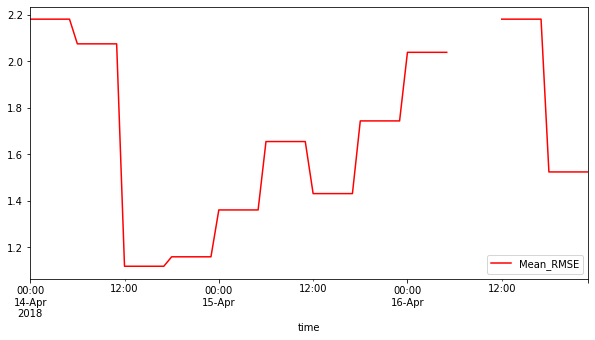

In [595]:
pu["RMSE"].groupby(by=pu.index).mean().plot(figsize=(10,5),color='r',label='Mean_RMSE')
plt.legend()

# Em Uma Cordenada geografica

In [578]:
p[(p['lat']==-22.85524) & (p['lon']==-46.6783)].to_csv('DT.csv')

In [579]:
pe=pd.read_csv("DT.csv", index_col="time")

In [580]:
pe.index=pd.DatetimeIndex(pe.index)

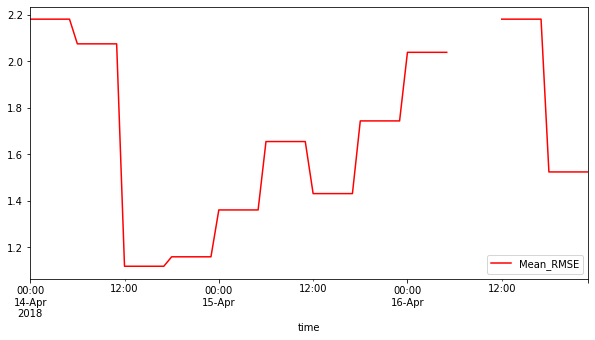

In [587]:
pe["RMSE"].groupby(by=pe.index).mean().plot(figsize=(10,5),color='r',label='Mean_RMSE')
plt.legend()

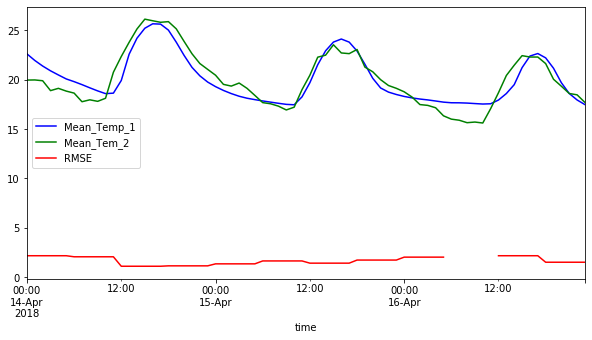

In [586]:
pe["Temp_1"].groupby(by=pe.index).mean().plot(figsize=(10,5),color='b',label='Mean_Temp_1')
pe["Temp_2"].groupby(by=pe.index).mean().plot(figsize=(10,5),color='g',label='Mean_Tem_2')
pe["RMSE"].groupby(by=pe.index).mean().plot(figsize=(10,5),color='r',label='RMSE')
plt.legend()